In [72]:
import numpy as np
print(np.__version__)

1.23.5


In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [74]:
import pandas as pd
df_4_files_combined_no_outliers_for_AR = pd.read_pickle('df_4_files_combined_no_outliers_for_AR.pkl')
df_4_files_combined_no_outliers_for_AR.index = pd.to_datetime(df_4_files_combined_no_outliers_for_AR.index)
df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.asfreq('D')  # or 'W', 'M' depending on your data's granularity


# ARIMA (1,1,1)

In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(df_4_files_combined_no_outliers_for_AR['Room Revenue'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Room Revenue   No. Observations:                  942
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12459.677
Date:                Sun, 15 Jun 2025   AIC                          24925.354
Time:                        08:45:26   BIC                          24939.895
Sample:                    09-02-2021   HQIC                         24930.897
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5917      0.033     17.949      0.000       0.527       0.656
ma.L1         -0.8670      0.027    -32.499      0.000      -0.919      -0.815
sigma2      2.018e+10   4.81e-13   4.19e+22      0.0

In [76]:
forecast = model_fit.forecast(steps=7)
print(forecast)


2024-04-01    1.172417e+06
2024-04-02    1.222988e+06
2024-04-03    1.252910e+06
2024-04-04    1.270614e+06
2024-04-05    1.281089e+06
2024-04-06    1.287287e+06
2024-04-07    1.290954e+06
Freq: D, Name: predicted_mean, dtype: float64


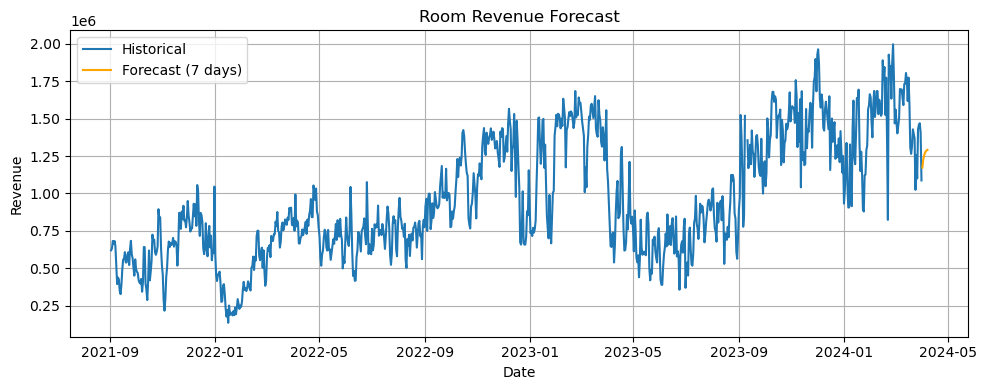

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df_4_files_combined_no_outliers_for_AR['Room Revenue'], label='Historical')
plt.plot(forecast.index, forecast, color='orange', label='Forecast (7 days)')
plt.title('Room Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('room_revenue_forecast.png', dpi=300)
plt.show()


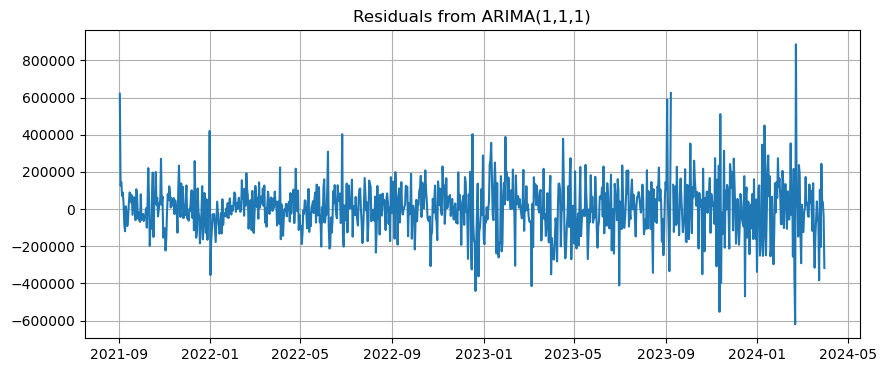

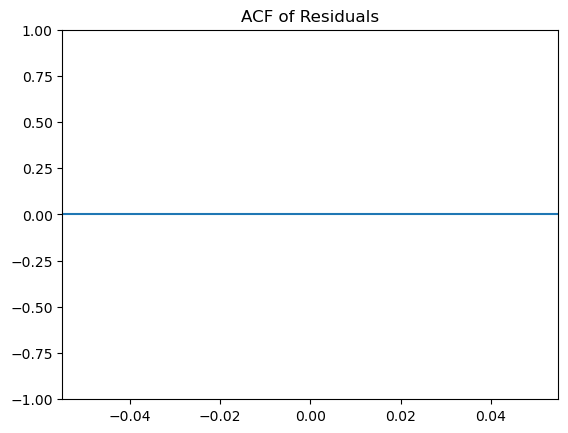

In [78]:
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals from ARIMA(1,1,1)')
plt.grid(True)
plt.savefig('residuals_ARIMA.png', dpi=300)
plt.show()

# ACF of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.savefig('acf_residuals_ARIMA.png', dpi=300)
plt.show()


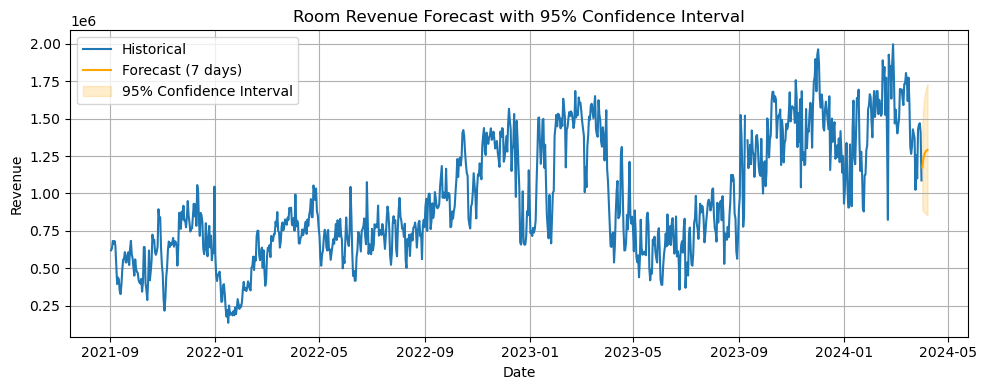

In [79]:
# Get forecast and confidence intervals
forecast_result = model_fit.get_forecast(steps=7)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot with confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_4_files_combined_no_outliers_for_AR['Room Revenue'], label='Historical')
plt.plot(forecast_values.index, forecast_values, label='Forecast (7 days)', color='orange')
plt.fill_between(forecast_values.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Room Revenue Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('room_revenue_forecast_with_ci.png', dpi=300)
plt.show()


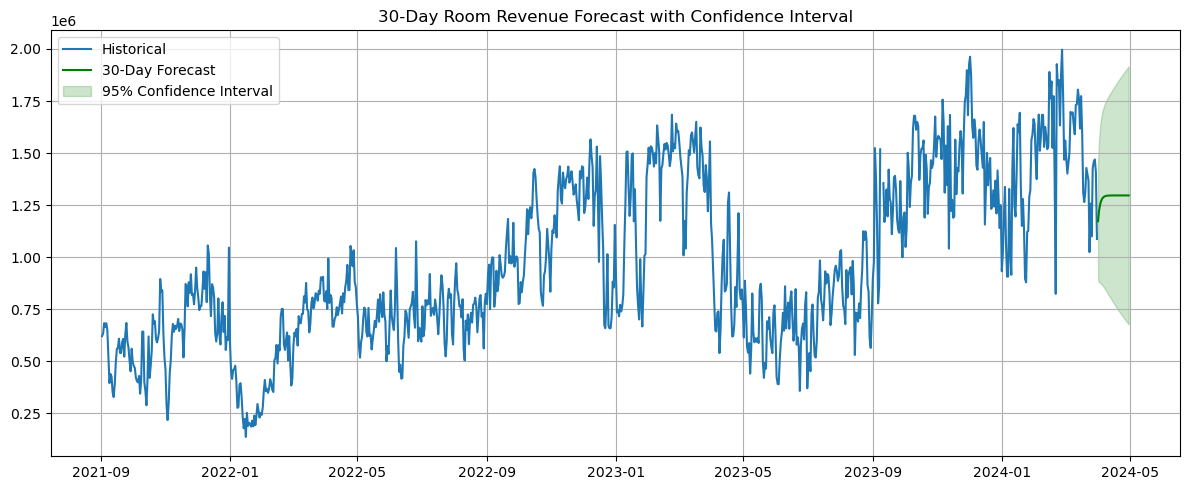

In [80]:
long_forecast = model_fit.get_forecast(steps=30)
forecast_mean = long_forecast.predicted_mean
conf_int = long_forecast.conf_int()

plt.figure(figsize=(12, 5))
plt.plot(df_4_files_combined_no_outliers_for_AR['Room Revenue'], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, label='30-Day Forecast', color='green')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.title('30-Day Room Revenue Forecast with Confidence Interval')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('30_day_room_revenue_forecast_with_ci.png', dpi=300)
plt.show()


# SARIMA

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming weekly seasonality (7-day cycle)
model_sarima = SARIMAX(df_4_files_combined_no_outliers_for_AR['Room Revenue'],
                order=(1,0,1),
                seasonal_order=(1,0,1,7))
model_fit_sarima = model_sarima.fit()

print(model_fit_sarima.summary())


                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  942
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -12485.817
Date:                           Sun, 15 Jun 2025   AIC                          24981.633
Time:                                   08:45:29   BIC                          25005.873
Sample:                               09-02-2021   HQIC                         24990.873
                                    - 03-31-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9630      0.013     76.208      0.000       0.938       0.988
ma.L1         -0.2642      0.026    -10.272

In [82]:
forecast_result_sarima = model_fit.get_forecast(steps=30)
forecast_mean_sarima = forecast_result_sarima.predicted_mean
conf_int_sarima = forecast_result_sarima.conf_int()

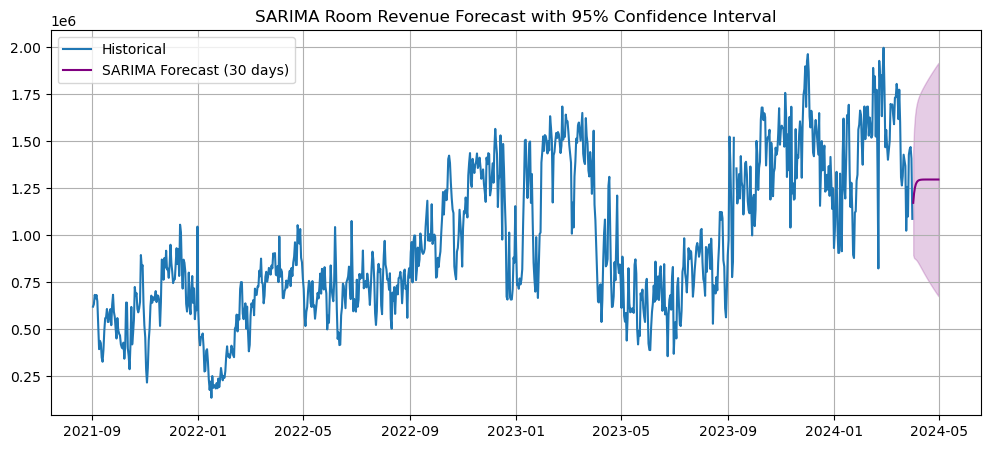

In [83]:
plt.figure(figsize=(12, 5))
plt.plot(df_4_files_combined_no_outliers_for_AR['Room Revenue'], label='Historical')
plt.plot(forecast_mean_sarima.index, forecast_mean_sarima, label='SARIMA Forecast (30 days)', color='purple')
plt.fill_between(forecast_mean_sarima.index,
                 conf_int_sarima.iloc[:, 0],
                 conf_int_sarima.iloc[:, 1],
                 color='purple', alpha=0.2)
plt.legend()
plt.title('SARIMA Room Revenue Forecast with 95% Confidence Interval')
plt.grid(True)
plt.savefig('sarima_room_revenue_forecast_with_ci.png', dpi=300)
plt.show()


# Auto-Arima

In [84]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")

# Clean the input series
cleaned_series = df_4_files_combined_no_outliers_for_AR['Room Revenue'].dropna()

# Run auto_arima
stepwise_model = auto_arima(cleaned_series,
                            seasonal=True, m=7,
                            start_p=0, start_q=0, max_p=2, max_q=2,
                            start_P=0, start_Q=0, max_P=2, max_Q=2,
                            d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Print summary
print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=25417.298, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=25177.762, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=25403.156, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=25108.508, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=25071.210, Time=0.20 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=25168.272, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=25094.968, Time=0.27 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=25131.610, Time=0.32 sec

Best model:  ARIMA(0,1,0)(2,1,0)[7]          
Total fi

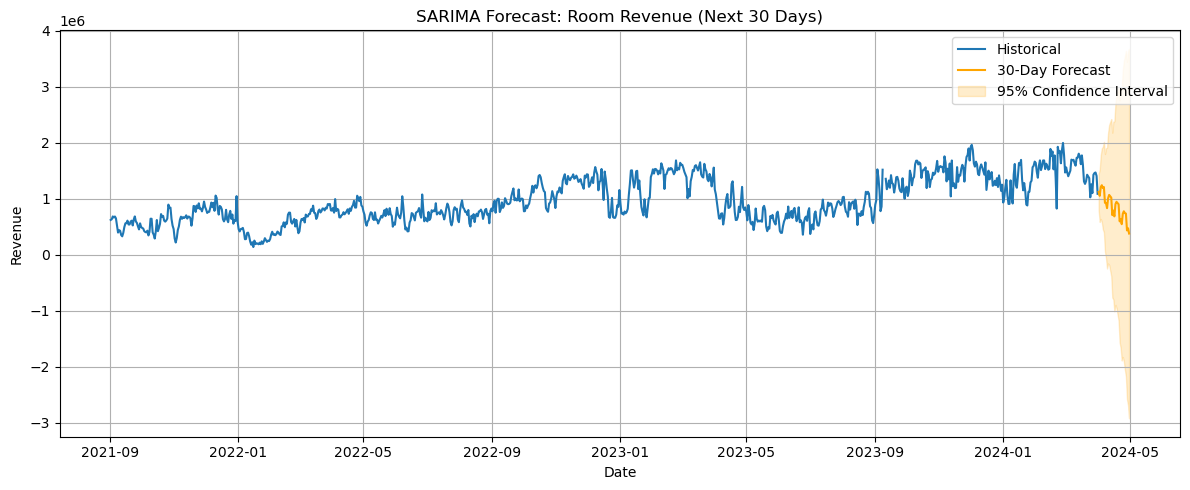

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Forecast for 30 days
n_periods = 30
forecast_auto_arima_010_210_7, conf_int_auto_arima_010_210_7 = stepwise_model.predict(n_periods=n_periods, return_conf_int=True)

# Step 2: Create date index for future periods
# Get last date from original data
last_date = df_4_files_combined_no_outliers_for_AR.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Step 3: Plot historical + forecast
plt.figure(figsize=(12, 5))

# Historical
plt.plot(df_4_files_combined_no_outliers_for_AR.index, 
         df_4_files_combined_no_outliers_for_AR['Room Revenue'], 
         label='Historical')

# Forecast line
plt.plot(future_dates, forecast_auto_arima_010_210_7, label='30-Day Forecast', color='orange')

# Confidence interval shading
plt.fill_between(future_dates, 
                 conf_int_auto_arima_010_210_7[:, 0], 
                 conf_int_auto_arima_010_210_7[:, 1], 
                 color='orange', alpha=0.2, label='95% Confidence Interval')

# Labels and styling
plt.title('SARIMA Forecast: Room Revenue (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sarima_forecast_30_days.png', dpi=300)
plt.show()



# SARIMA

In [86]:
# # Grid search for optimal SARIMA parameters
# import itertools
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import warnings

# # Define parameter ranges
# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(range(0, 2), range(0, 2), range(0, 2)))]

# best_aic = float('inf')
# best_params = None
# best_seasonal_params = None

# for param in pdq:
#     for seasonal_param in seasonal_pdq:
#         try:
#             model = sm.tsa.statespace.SARIMAX(endog_full,
#                                              exog=X_full,
#                                              order=param,
#                                              seasonal_order=seasonal_param,
#                                              enforce_stationarity=False,
#                                              enforce_invertibility=False)
#             results = model.fit(disp=False)
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_params = param
#                 best_seasonal_params = seasonal_param
#         except:
#             continue

# print(f'Best SARIMA params: {best_params}')
# print(f'Best seasonal params: {best_seasonal_params}')
# print(f'Best AIC: {best_aic}')

# # Update your model with best parameters
# order = best_params
# seasonal_order = best_seasonal_params

                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -11343.083
Date:                           Sun, 15 Jun 2025   AIC                          22718.165
Time:                                   08:45:42   BIC                          22795.631
Sample:                               09-01-2021   HQIC                         22747.702
                                    - 04-01-2024                                         
Covariance Type:                             opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Room Inventory -2105.3389    698.254     -3.015      0.003   -3473.893    -736.785
Rooms Sold   

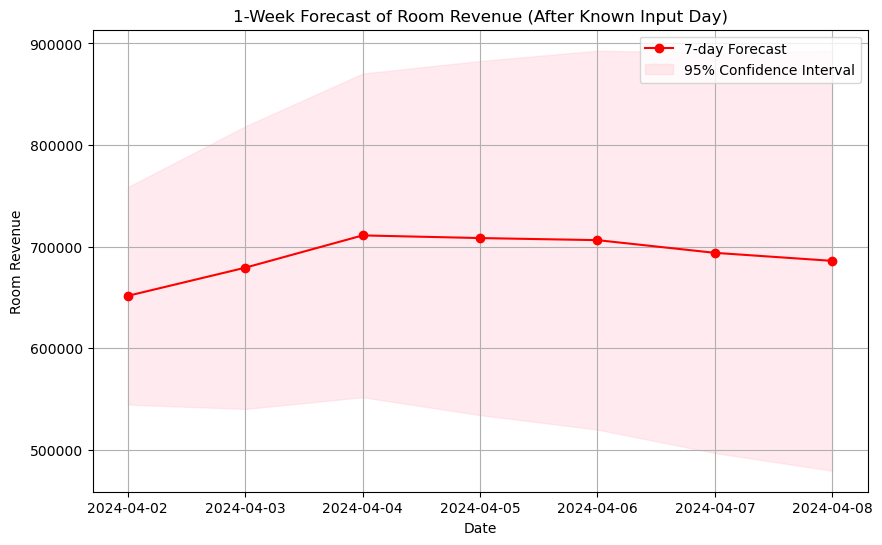


Forecasted Revenue for the next 1 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822  544700.605594   7.585632e+05
2024-04-03    679325.364523  540308.990486   8.183417e+05
2024-04-04    711102.112742  551890.012063   8.703142e+05
2024-04-05    708493.024141  534311.234977   8.826748e+05
2024-04-06    706435.707952  520052.622903   8.928188e+05
2024-04-07    693952.410006  497000.829709   8.909040e+05
2024-04-08    686044.696462  479568.275776   8.925211e+05
2024-04-09    689786.223317  470107.109117   9.094653e+05
2024-04-10    691644.428547  460469.616466   9.228192e+05
2024-04-11    711820.642791  470245.100373   9.533962e+05
2024-04-12    701878.206696  450652.660709   9.531038e+05
2024-04-13    695693.968555  435365.239239   9.560227e+05
2024-04-14    684111.255642  415099.940445   9.531226e+05
2024-04-15    687654.664351  410299.907089   9.650094e+05
2024-04-16    687713.602237  400686.700411   9.747405e+05
2024-04-17    686705.870659  3

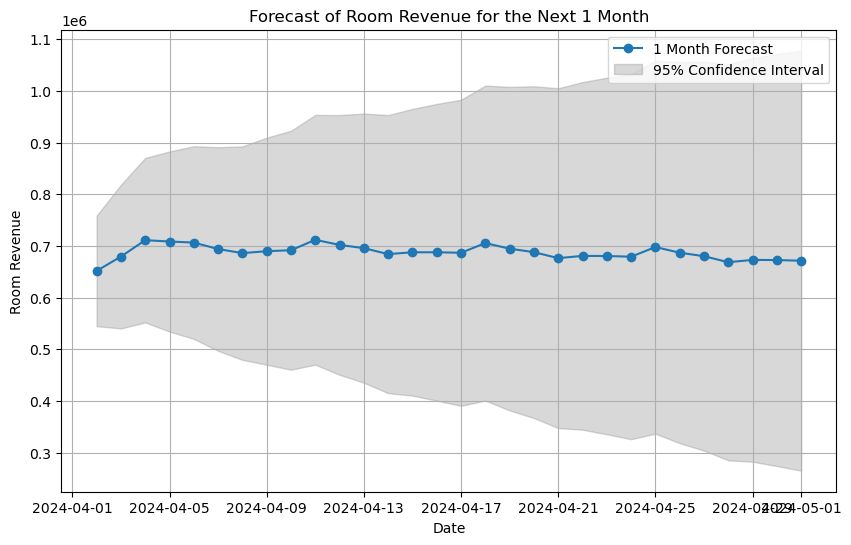


Forecasted Revenue for the next 3 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822  544700.605594   7.585632e+05
2024-04-03    679325.364523  540308.990486   8.183417e+05
2024-04-04    711102.112742  551890.012063   8.703142e+05
2024-04-05    708493.024141  534311.234977   8.826748e+05
2024-04-06    706435.707952  520052.622903   8.928188e+05
...                     ...            ...            ...
2024-06-26    608646.532673 -183611.010187   1.400904e+06
2024-06-27    627258.887605 -171840.395465   1.426358e+06
2024-06-28    616334.330359 -189497.351414   1.422166e+06
2024-06-29    609578.044441 -202898.818886   1.422055e+06
2024-06-30    597945.051855 -221103.778827   1.416994e+06

[90 rows x 3 columns]


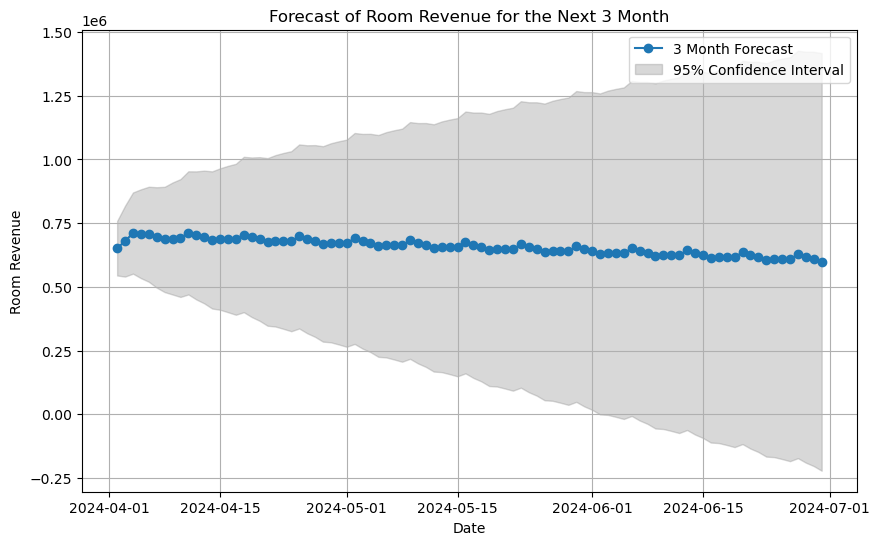


Forecasted Revenue for the next 1 year:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822   5.447006e+05   7.585632e+05
2024-04-03    679325.364523   5.403090e+05   8.183417e+05
2024-04-04    711102.112742   5.518900e+05   8.703142e+05
2024-04-05    708493.024141   5.343112e+05   8.826748e+05
2024-04-06    706435.707952   5.200526e+05   8.928188e+05
...                     ...            ...            ...
2025-03-28    310711.449054  -2.643447e+06   3.264870e+06
2025-03-29    303955.163136  -2.659202e+06   3.267113e+06
2025-03-30    292322.170550  -2.679795e+06   3.264439e+06
2025-03-31    296793.000509  -2.684249e+06   3.277835e+06
2025-04-01    296478.021637  -2.693917e+06   3.286873e+06

[365 rows x 3 columns]


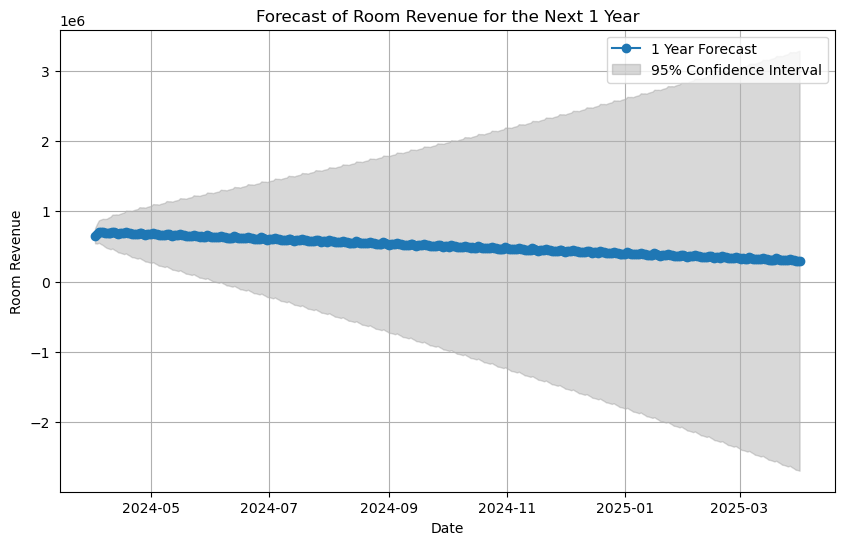

In [87]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

# 1. Load historical data from the pickle file
df = pd.read_pickle('df_4_files_combined_no_outliers.pkl')

# Ensure 'Date' is datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# 2. Define exogenous columns (all numeric columns except revenue and date-related ones)
exog_columns = [
    'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 
    'House Use', 'Individual Confirm', 'Occupancy %', 'ARR', 
    'Departure Rooms', 'OOO Rooms', 'Pax'
]

# 3. Specify SARIMAX parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # weekly seasonality

# 4. Define the new (input) observation details
input_row = {
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}
known_revenue = 617835  # revenue for the input date

# Input date for the new observation (which is far beyond the last date)
user_input_date = '2024-04-01'
input_date = pd.to_datetime(user_input_date)

# 5. Create a continuous daily date range from the first historical date to the input date.
full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')

# Reindex the DataFrame to include all dates
df_full = df.reindex(full_date_range)

# 6. Impute missing exogenous variables. Here we use forward-fill.
df_full[exog_columns] = df_full[exog_columns].ffill()

# 7. For the target ('Room Revenue'), fill the gap by interpolation.
df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()

# 8. Override the values on the input date with your known observation.
df_full.loc[input_date, 'Room Revenue'] = known_revenue
for col, val in input_row.items():
    df_full.loc[input_date, col] = val

# (Optional) Check the data near the input date
#print(df_full.loc[input_date - pd.Timedelta(days=3):input_date + pd.Timedelta(days=3)])

# 9. Re-fit the SARIMAX model on the extended dataset.
endog_full = df_full['Room Revenue']
X_full = df_full[exog_columns]

model_extended = sm.tsa.statespace.SARIMAX(endog_full, exog=X_full, order=order, seasonal_order=seasonal_order)
results_extended = model_extended.fit(disp=False)
print(results_extended.summary())

# 10. Forecast the next 7 days (as in your original forecast)
forecast_start = input_date + pd.Timedelta(days=1)
forecast_dates = pd.date_range(start=forecast_start, periods=7, freq='D')

# For forecasting, assume the exogenous variables remain constant as in the input row.
X_forecast = pd.DataFrame([input_row] * 7, index=forecast_dates)

forecast_obj = results_extended.get_forecast(steps=7, exog=X_forecast)
forecast_df = forecast_obj.summary_frame(alpha=0.05)

print("Forecasted Revenue for the next 7 days:")
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color='red', label='7-day Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('1-Week Forecast of Room Revenue (After Known Input Day)')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_7_days.png', dpi=300)
plt.show()

# 11. Extend forecasts for 1 month (30 days), 3 months (90 days), and 1 year (365 days)
forecast_horizons = {
    "1_month": 30,
    "3_month": 90,
    "1_year": 365
}

forecast_results = {}

for horizon, steps in forecast_horizons.items():
    forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=steps, freq='D')
    # Use the same exogenous input for every forecast day
    X_forecast_horizon = pd.DataFrame([input_row] * steps, index=forecast_dates)
    
    forecast_obj_horizon = results_extended.get_forecast(steps=steps, exog=X_forecast_horizon)
    forecast_results[horizon] = forecast_obj_horizon.summary_frame(alpha=0.05)
    
    print(f"\nForecasted Revenue for the next {horizon.replace('_', ' ')}:")
    print(forecast_results[horizon][['mean', 'mean_ci_lower', 'mean_ci_upper']])  # printing only the first few rows

    # Plotting each forecast
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_results[horizon].index, forecast_results[horizon]['mean'], marker='o', label=f'{horizon.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_results[horizon].index, 
                     forecast_results[horizon]['mean_ci_lower'], 
                     forecast_results[horizon]['mean_ci_upper'], 
                     color='gray', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of Room Revenue for the Next {horizon.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{horizon}.png', dpi=300)
    plt.show()


In [88]:
df

Total Room Inventory  Rooms Sold  Arrival Rooms  Compliment Rooms  \
Date                                                                            
2021-09-01                 117.0       117.0           49.0               1.0   
2021-09-02                 116.0       113.0           34.0               1.0   
2021-09-03                 118.0       116.0           39.0               0.0   
2021-09-04                 118.0       116.0           36.0               0.0   
2021-09-05                 119.0       114.0           36.0               0.0   
...                          ...         ...            ...               ...   
2024-03-27                 103.0        91.0           45.0               1.0   
2024-03-28                 103.0        97.0           46.0               2.0   
2024-03-29                 103.0        98.0           41.0               1.0   
2024-03-30                 103.0        97.0           46.0               2.0   
2024-03-31                 102.0        77.0           34.0               1.0   

            House Use  Individual Confirm  Occupancy %  Room Revenue  \
Date                                                                   
2021-09-01        6.0               117.0      94.0171        617835   
2021-09-02        5.0               113.0      92.2414        620455   
2021-09-03        4.0               116.0      94.9153        633071   
2021-09-04        4.0               116.0      94.9153        682949   
2021-09-05        1.0               114.0      94.9580        664046   
...               ...                 ...          ...           ...   
2024-03-27        3.0                95.0      88.3500       1427730   
2024-03-28        3.0                88.0      94.1700       1457687   
2024-03-29        2.0                77.0      95.1500       1468948   
2024-03-30        3.0                71.0      94.1700       1407306   
2024-03-31        2.0                68.0      75.4900       1086947   

                   ARR  Departure Rooms  OOO Rooms    Pax snapshot_date  \
Date                                                                      
2021-09-01   5280.6428             45.0       15.0  172.0    2021-09-01   
2021-09-02   5490.7527             32.0       16.0  170.0    2021-09-02   
2021-09-03   5457.5165             35.0       14.0  169.0    2021-09-03   
2021-09-04   5887.4918             36.0       14.0  182.0    2021-09-04   
2021-09-05   5824.9731             38.0       13.0  182.0    2021-09-05   
...                ...              ...        ...    ...           ...   
2024-03-27  15689.3400             31.0       29.0  166.0    2024-03-27   
2024-03-28  15027.7000             40.0       27.0  186.0    2024-03-28   
2024-03-29  14989.2700             42.0       27.0  193.0    2024-03-29   
2024-03-30  14508.3100             47.0       27.0  185.0    2024-03-30   
2024-03-31  14116.2000             56.0       28.0  144.0    2024-03-31   

           arrival_date actual_or_forecast        Day  
Date                                                   
2021-09-01   2021-09-01             actual  Wednesday  
2021-09-02   2021-09-02             actual   Thursday  
2021-09-03   2021-09-03             actual     Friday  
2021-09-04   2021-09-04             actual   Saturday  
2021-09-05   2021-09-05             actual     Sunday  
...                 ...                ...        ...  
2024-03-27   2024-03-27             actual  Wednesday  
2024-03-28   2024-03-28             actual   Thursday  
2024-03-29   2024-03-29             actual     Friday  
2024-03-30   2024-03-30             actual   Saturday  
2024-03-31   2024-03-31             actual     Sunday  

[941 rows x 16 columns]

Best SARIMA params: (1, 1, 1)
Best seasonal params: (1, 0, 1, 7)
Best AIC: 22359.994981861015
                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood              -11283.409
Date:                           Sun, 15 Jun 2025   AIC                          22598.819
Time:                                   08:48:05   BIC                          22676.404
Sample:                               09-01-2021   HQIC                         22628.390
                                    - 04-01-2024                                         
Covariance Type:                             opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Ro

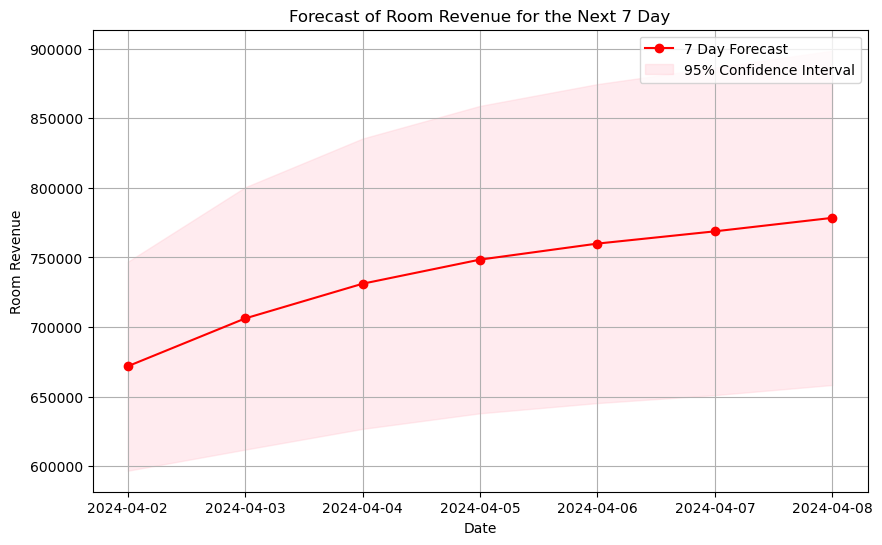


Forecasted Revenue for the next 1 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    671816.080242  596782.767013  746849.393472
2024-04-03    706169.530345  611961.914089  800377.146601
2024-04-04    731096.452366  626838.986659  835353.918072
2024-04-05    748417.157350  638027.692986  858806.621715
2024-04-06    759918.500694  645373.851160  874463.150228
2024-04-07    768719.666163  651107.827284  886331.505042
2024-04-08    778399.483575  658356.465501  898442.501650
2024-04-09    780463.806719  658692.408693  902235.204744
2024-04-10    782854.014727  659507.876275  906200.153179
2024-04-11    783857.258912  659040.460611  908674.057212
2024-04-12    784400.131151  658185.200303  910615.061999
2024-04-13    784890.347229  657329.324952  912451.369505
2024-04-14    784829.027045  655960.446470  913697.607621
2024-04-15    783282.631799  653136.004610  913429.258988
2024-04-16    784078.038200  652574.038123  915582.038278
2024-04-17    784217.941074  6

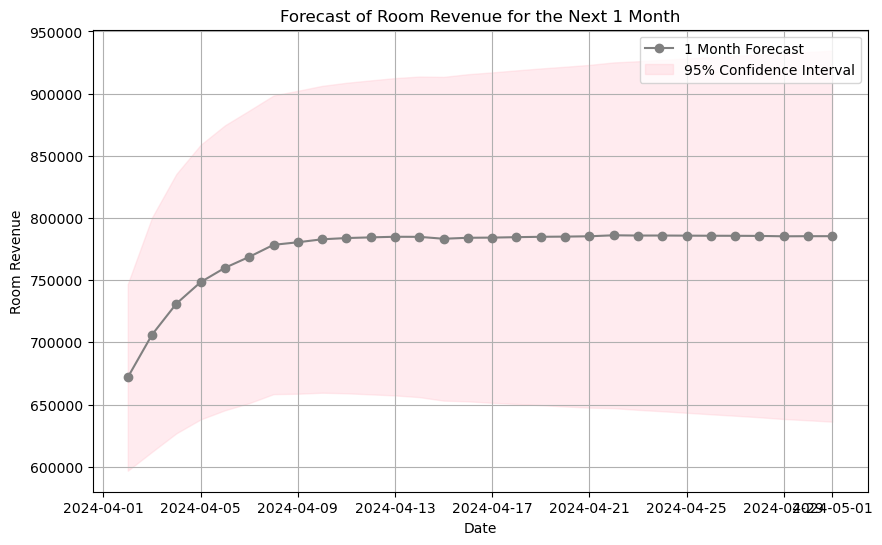


Forecasted Revenue for the next 3 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    671816.080242  596782.767013  746849.393472
2024-04-03    706169.530345  611961.914089  800377.146601
2024-04-04    731096.452366  626838.986659  835353.918072
2024-04-05    748417.157350  638027.692986  858806.621715
2024-04-06    759918.500694  645373.851160  874463.150228
...                     ...            ...            ...
2024-06-26    785514.203850  584199.311035  986829.096664
2024-06-27    785514.234942  583389.797639  987638.672244
2024-06-28    785514.263486  582583.511959  988445.015013
2024-06-29    785514.276603  581780.402506  989248.150700
2024-06-30    785514.306278  580980.463497  990048.149059

[90 rows x 3 columns]


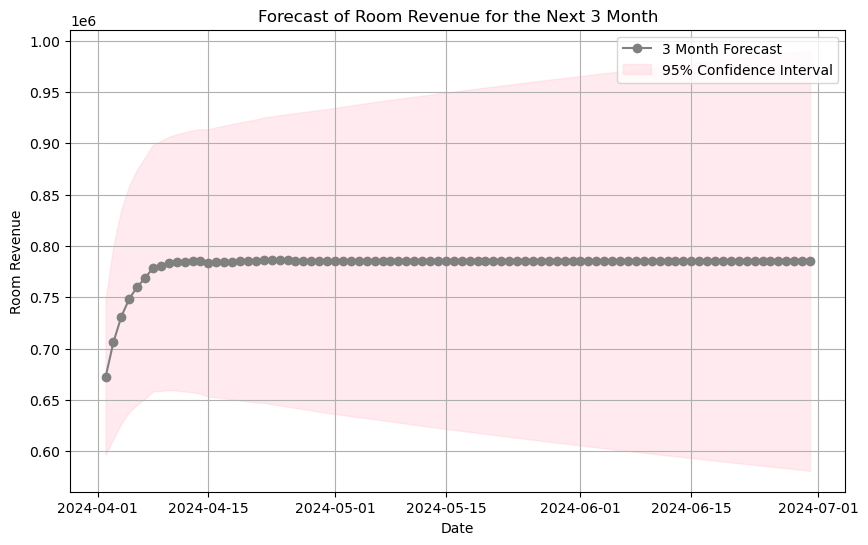


Forecasted Revenue for the next 1 year:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    671816.080242  596782.767013   7.468494e+05
2024-04-03    706169.530345  611961.914089   8.003771e+05
2024-04-04    731096.452366  626838.986659   8.353539e+05
2024-04-05    748417.157350  638027.692986   8.588066e+05
2024-04-06    759918.500694  645373.851160   8.744632e+05
...                     ...            ...            ...
2025-03-28    785514.326805  424483.975549   1.146545e+06
2025-03-29    785514.326805  424031.940854   1.146997e+06
2025-03-30    785514.326805  423580.470724   1.147448e+06
2025-03-31    785514.326805  423129.563048   1.147899e+06
2025-04-01    785514.326805  422679.215731   1.148349e+06

[365 rows x 3 columns]


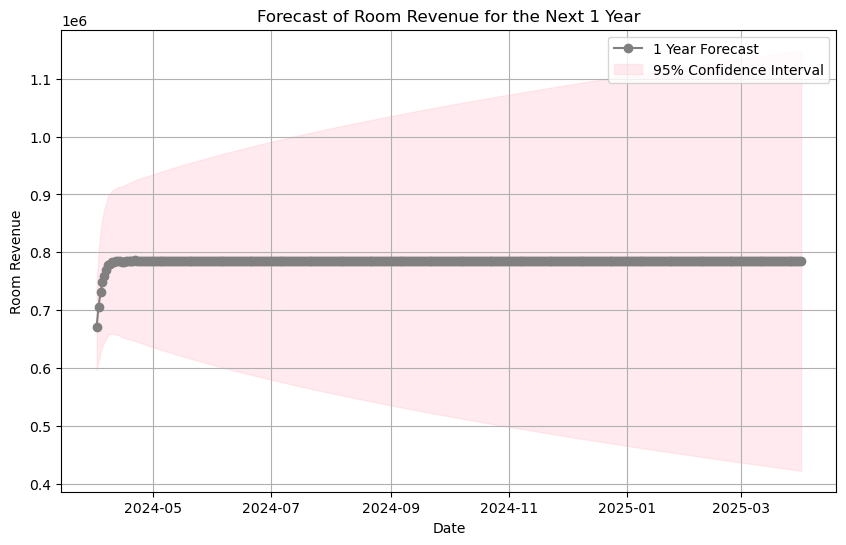

In [89]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings


def grid_search_sarima(endog, exog):
    """
    Performs a grid search over SARIMA parameters and prints the best found configuration.
    """
    # Define parameter ranges
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in itertools.product(range(0, 2), range(0, 2), range(0, 2))]

    best_aic = float('inf')
    best_params = None
    best_seasonal_params = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(endog,
                                                  exog=exog,
                                                  order=param,
                                                  seasonal_order=seasonal_param,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
                results = model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = seasonal_param
            except Exception:
                continue

    print(f'Best SARIMA params: {best_params}')
    print(f'Best seasonal params: {best_seasonal_params}')
    print(f'Best AIC: {best_aic}')
    return best_params, best_seasonal_params


def load_and_prepare_data(filename, exog_columns, input_date, input_row, known_revenue):
    """
    Loads the historical data from a pickle file, reindexes the DataFrame to a daily date range,
    imputes missing values and overrides the input date with known values.
    """
    # Load historical data
    df = pd.read_pickle(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    # Create a continuous daily date range and reindex the DataFrame
    full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')
    df_full = df.reindex(full_date_range)

    # Impute missing exogenous values with forward-fill and interpolate the target
    df_full[exog_columns] = df_full[exog_columns].ffill()
    df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()

    # Override the input date with the known observation
    df_full.loc[input_date, 'Room Revenue'] = known_revenue
    for col, val in input_row.items():
        df_full.loc[input_date, col] = val

    return df_full


def fit_sarimax_model(endog, exog, order, seasonal_order):
    """
    Fits a SARIMAX model with the provided parameters and prints the model summary.
    """
    model = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    print(results.summary())
    return results


def forecast_and_plot(results, forecast_steps, input_date, input_row, title_suffix, plot_color):
    """
    Forecasts the target variable for a specified number of days and plots the forecast along with
    the 95% confidence interval.
    """
    forecast_start = input_date + pd.Timedelta(days=1)
    forecast_dates = pd.date_range(start=forecast_start, periods=forecast_steps, freq='D')
    X_forecast = pd.DataFrame([input_row] * forecast_steps, index=forecast_dates)

    forecast_obj = results.get_forecast(steps=forecast_steps, exog=X_forecast)
    forecast_df = forecast_obj.summary_frame(alpha=0.05)

    print(f"\nForecasted Revenue for the next {title_suffix.replace('_', ' ')}:")
    print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

    plt.figure(figsize=(10, 6))
    plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color=plot_color,
             label=f'{title_suffix.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_df.index,
                     forecast_df['mean_ci_lower'],
                     forecast_df['mean_ci_upper'],
                     color='pink', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of Room Revenue for the Next {title_suffix.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{title_suffix}.png', dpi=300)
    plt.show()

    return forecast_df


warnings.filterwarnings("ignore")

# Define exogenous columns
exog_columns = [
    'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
    'House Use', 'Individual Confirm', 'Occupancy %', 'ARR',
    'Departure Rooms', 'OOO Rooms', 'Pax'
]

# Define input observation details
input_row = {
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}
known_revenue = 617835
user_input_date = '2024-04-01'
input_date = pd.to_datetime(user_input_date)

# Load and prepare the dataset
filename = 'df_4_files_combined_no_outliers.pkl'
df_full = load_and_prepare_data(filename, exog_columns, input_date, input_row, known_revenue)

# Extract endogenous and exogenous variables
endog_full = df_full['Room Revenue']
X_full = df_full[exog_columns]

# (Optional) Perform grid search for optimal SARIMA parameters
# grid_search_sarima(endog_full, X_full)
best_params, best_seasonal_params = grid_search_sarima(endog_full, X_full)

# Specify SARIMAX parameters (using fixed ones for the updated model)
# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 7)

order = best_params
seasonal_order = best_seasonal_params

# Fit the SARIMAX model on the extended dataset
results_extended = fit_sarimax_model(endog_full, X_full, order, seasonal_order)

# Forecast the next 7 days
forecast_and_plot(results_extended, forecast_steps=7, input_date=input_date,
                    input_row=input_row, title_suffix="7_day", plot_color='red')

# Extend forecasts for 1 month, 3 months, and 1 year
forecast_horizons = {
    "1_month": 30,
    "3_month": 90,
    "1_year": 365
}

for horizon, steps in forecast_horizons.items():
    forecast_and_plot(results_extended, forecast_steps=steps, input_date=input_date,
                        input_row=input_row, title_suffix=horizon, plot_color='gray')





Best SARIMA params: (1, 1, 1)
Best seasonal params: (1, 0, 1, 7)
Best AIC: 22367.833979266972
                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood              -11282.843
Date:                           Sun, 15 Jun 2025   AIC                          22607.686
Time:                                   08:50:45   BIC                          22709.516
Sample:                               09-01-2021   HQIC                         22646.499
                                    - 04-01-2024                                         
Covariance Type:                             opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Ro

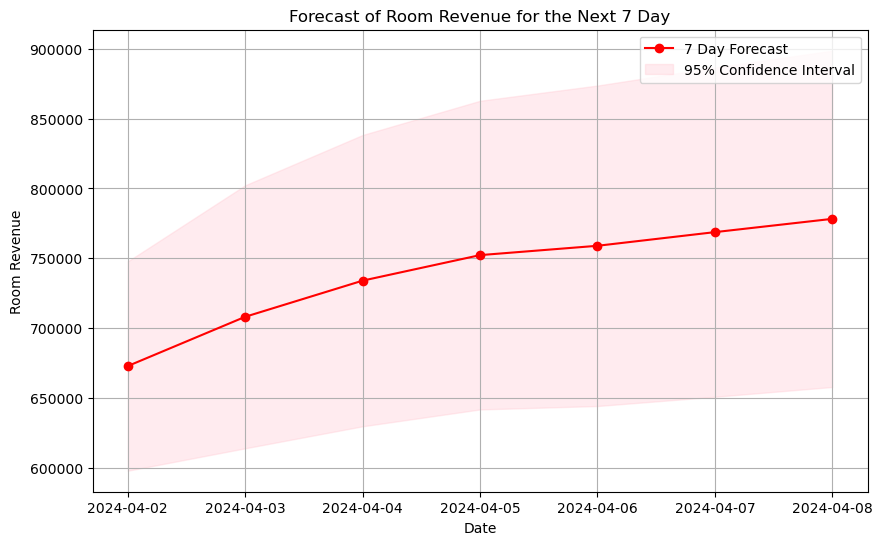


Forecasted Revenue for the next 1 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    672835.002103  597905.737786  747764.266419
2024-04-03    708098.344048  613953.275190  802243.412907
2024-04-04    733972.630764  629708.950911  838236.310617
2024-04-05    752248.271059  641775.244988  862721.297130
2024-04-06    758931.462765  644224.429050  873638.496481
2024-04-07    768706.762461  650854.924206  886558.600716
2024-04-08    778213.336788  657854.721753  898571.951823
2024-04-09    781178.731084  659032.126452  903325.335716
2024-04-10    784538.395150  660755.873199  908320.917101
2024-04-11    786484.157961  661169.224652  911799.091269
2024-04-12    787974.900509  661200.086845  914749.714174
2024-04-13    783851.165454  655668.866050  912033.464858
2024-04-14    784746.792616  655196.110565  914297.474667
2024-04-15    782719.675888  651830.827252  913608.524524
2024-04-16    784541.235593  652228.250631  916854.220555
2024-04-17    785671.256930  6

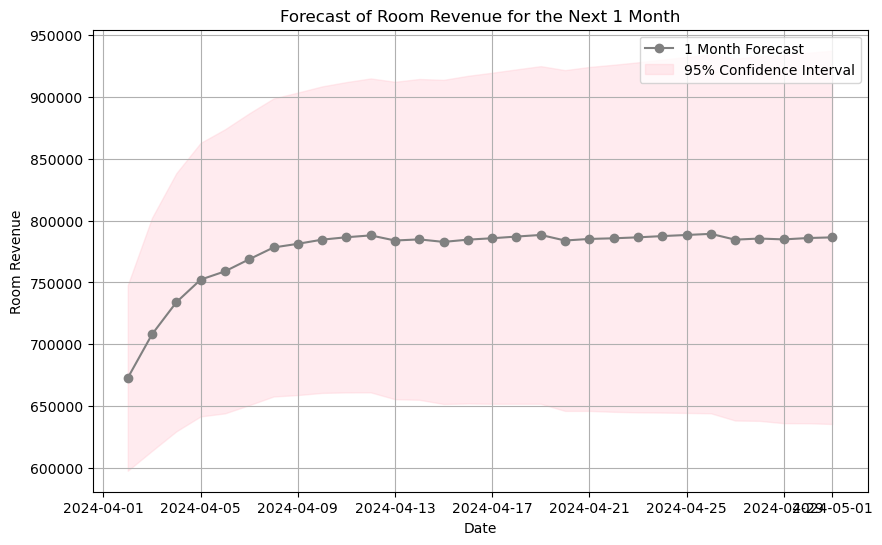


Forecasted Revenue for the next 3 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    672835.002103  597905.737786  747764.266419
2024-04-03    708098.344048  613953.275190  802243.412907
2024-04-04    733972.630764  629708.950911  838236.310617
2024-04-05    752248.271059  641775.244988  862721.297130
2024-04-06    758931.462765  644224.429050  873638.496481
...                     ...            ...            ...
2024-06-26    786121.736529  581097.892431  991145.580628
2024-06-27    787117.781006  581254.780328  992980.781685
2024-06-28    788113.822279  581415.072854  994812.571704
2024-06-29    783475.016452  575943.884608  991006.148296
2024-06-30    784471.059078  576110.870572  992831.247585

[90 rows x 3 columns]


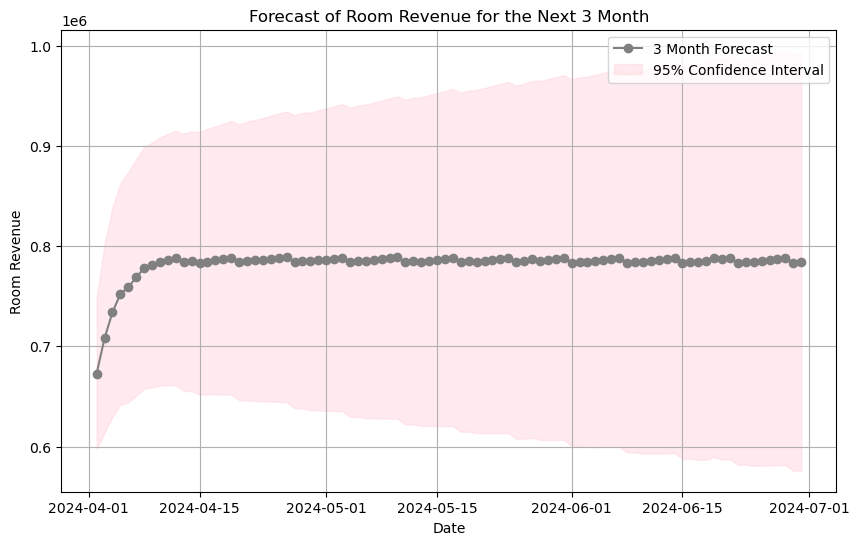


Forecasted Revenue for the next 1 year:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    672835.002103  597905.737786   7.477643e+05
2024-04-03    708098.344048  613953.275190   8.022434e+05
2024-04-04    733972.630764  629708.950911   8.382363e+05
2024-04-05    752248.271059  641775.244988   8.627213e+05
2024-04-06    758931.462765  644224.429050   8.736385e+05
...                     ...            ...            ...
2025-03-28    785346.761987  415409.101160   1.155284e+06
2025-03-29    780707.942045  410304.554367   1.151111e+06
2025-03-30    781703.945069  410835.415385   1.152572e+06
2025-03-31    781362.749892  410029.660852   1.152696e+06
2025-04-01    786021.322654  414224.254723   1.157818e+06

[365 rows x 3 columns]


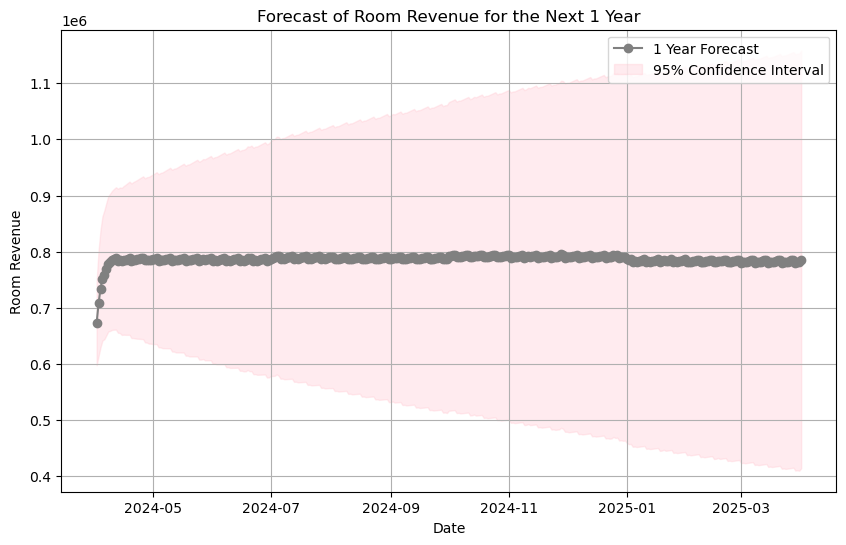

In [90]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import holidays


def grid_search_sarima(endog, exog):
    """
    Performs a grid search over SARIMA parameters and prints the best found configuration.
    """
    # Define parameter ranges
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in itertools.product(range(0, 2), range(0, 2), range(0, 2))]

    best_aic = float('inf')
    best_params = None
    best_seasonal_params = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(endog,
                                                  exog=exog,
                                                  order=param,
                                                  seasonal_order=seasonal_param,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
                results = model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = seasonal_param
            except Exception:
                continue

    print(f'Best SARIMA params: {best_params}')
    print(f'Best seasonal params: {best_seasonal_params}')
    print(f'Best AIC: {best_aic}')
    return best_params, best_seasonal_params


def load_and_prepare_data(filename, exog_columns, input_date, input_row, known_revenue):
    """
    Loads the historical data from a pickle file, reindexes the DataFrame to a daily date range,
    imputes missing values, adds temporal features, and overrides the input date with known values.
    """
    # Load historical data
    df = pd.read_pickle(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    # Create a continuous daily date range and reindex the DataFrame
    full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')
    df_full = df.reindex(full_date_range)

    # Impute missing exogenous values with forward-fill and interpolate the target
    df_full[exog_columns] = df_full[exog_columns].ffill()
    df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()

    # Override the input date with the known observation
    df_full.loc[input_date, 'Room Revenue'] = known_revenue
    for col, val in input_row.items():
        df_full.loc[input_date, col] = val

    # Add temporal features
    df_full['dayofweek'] = df_full.index.dayofweek
    df_full['month'] = df_full.index.month
    df_full['quarter'] = df_full.index.quarter
    df_full['is_weekend'] = df_full['dayofweek'].isin([5, 6]).astype(int)
    us_holidays = holidays.US()
    df_full['is_holiday'] = [1 if date in us_holidays else 0 for date in df_full.index]

    return df_full


def fit_sarimax_model(endog, exog, order, seasonal_order):
    """
    Fits a SARIMAX model with the provided parameters and prints the model summary.
    """
    model = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    print(results.summary())
    return results


def forecast_and_plot(results, forecast_steps, input_date, input_row, title_suffix, plot_color):
    """
    Forecasts the target variable for a specified number of days and plots the forecast along with
    the 95% confidence interval. Generates the required temporal features for the forecast exogenous data.
    """
    forecast_start = input_date + pd.Timedelta(days=1)
    forecast_dates = pd.date_range(start=forecast_start, periods=forecast_steps, freq='D')

    # Create the forecast exogenous DataFrame using input_row for the base features.
    X_forecast = pd.DataFrame([input_row] * forecast_steps, index=forecast_dates)

    # Add temporal features for the forecast dates
    X_forecast['dayofweek'] = X_forecast.index.dayofweek
    X_forecast['month'] = X_forecast.index.month
    X_forecast['quarter'] = X_forecast.index.quarter
    X_forecast['is_weekend'] = X_forecast['dayofweek'].isin([5, 6]).astype(int)
    us_holidays = holidays.US()
    X_forecast['is_holiday'] = [1 if date in us_holidays else 0 for date in X_forecast.index]

    forecast_obj = results.get_forecast(steps=forecast_steps, exog=X_forecast)
    forecast_df = forecast_obj.summary_frame(alpha=0.05)

    print(f"\nForecasted Revenue for the next {title_suffix.replace('_', ' ')}:")
    print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

    plt.figure(figsize=(10, 6))
    plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color=plot_color,
             label=f'{title_suffix.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_df.index,
                     forecast_df['mean_ci_lower'],
                     forecast_df['mean_ci_upper'],
                     color='pink', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of Room Revenue for the Next {title_suffix.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{title_suffix}.png', dpi=300)
    plt.show()

    return forecast_df


warnings.filterwarnings("ignore")

# Define exogenous columns (initially without temporal features)
exog_columns = [
    'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
    'House Use', 'Individual Confirm', 'Occupancy %', 'ARR',
    'Departure Rooms', 'OOO Rooms', 'Pax'
]

# Define input observation details
input_row = {
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}
known_revenue = 617835
user_input_date = '2024-04-01'
input_date = pd.to_datetime(user_input_date)

# Load and prepare the dataset
filename = 'df_4_files_combined_no_outliers.pkl'
df_full = load_and_prepare_data(filename, exog_columns, input_date, input_row, known_revenue)

# Extend exogenous variables with the new temporal features
exog_columns.extend(['dayofweek', 'month', 'quarter', 'is_weekend', 'is_holiday'])

# Extract endogenous and exogenous variables
endog_full = df_full['Room Revenue']
X_full = df_full[exog_columns]


# (Optional) Perform grid search for optimal SARIMA parameters
order,seasonal_order=grid_search_sarima(endog_full, X_full)

# Specify SARIMAX parameters (using fixed ones for the updated model)
# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 7)

# Fit the SARIMAX model on the extended dataset
results_extended = fit_sarimax_model(endog_full, X_full, order, seasonal_order)

# Forecast the next 7 days
forecast_and_plot(results_extended, forecast_steps=7, input_date=input_date,
                    input_row=input_row, title_suffix="7_day", plot_color='red')

# Extend forecasts for 1 month, 3 months, and 1 year
forecast_horizons = {
    "1_month": 30,
    "3_month": 90,
    "1_year": 365
}

for horizon, steps in forecast_horizons.items():
    forecast_and_plot(results_extended, forecast_steps=steps, input_date=input_date,
                        input_row=input_row, title_suffix=horizon, plot_color='gray')




Best SARIMA params: (1, 1, 1)
Best seasonal params: (1, 0, 1, 7)
Best AIC: 22367.833979266972
                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -11344.919
Date:                           Sun, 15 Jun 2025   AIC                          22731.838
Time:                                   08:53:51   BIC                          22833.512
Sample:                               09-01-2021   HQIC                         22770.605
                                    - 04-01-2024                                         
Covariance Type:                             opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Ro

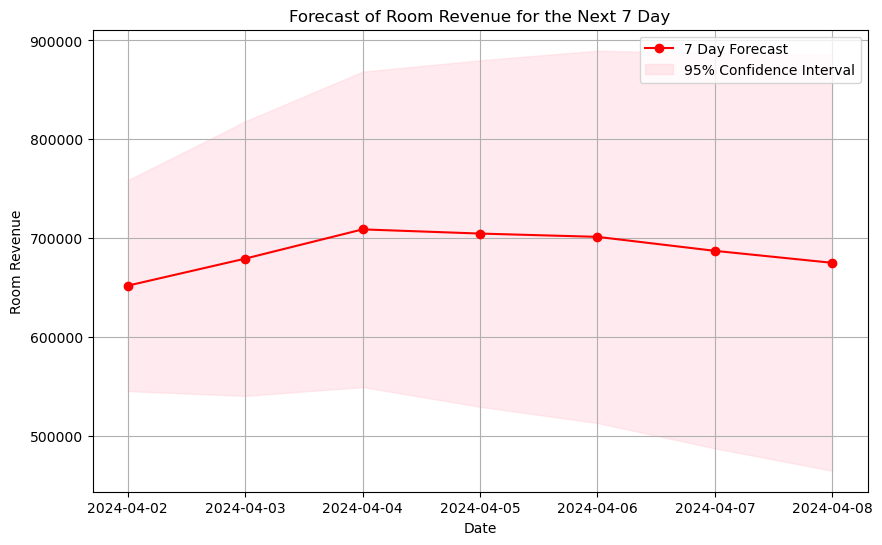


Forecasted Revenue for the next 1 month:
Room Revenue          mean  mean_ci_lower  mean_ci_upper
2024-04-02    8.418495e+05  735238.666843   9.484604e+05
2024-04-03    9.866105e+05  847812.515840   1.125408e+06
2024-04-04    1.088326e+06  928866.412081   1.247786e+06
2024-04-05    1.070990e+06  895850.139632   1.246129e+06
2024-04-06    1.057039e+06  868839.993625   1.245237e+06
2024-04-07    1.007177e+06  807472.783940   1.206881e+06
2024-04-08    1.033383e+06  823184.076835   1.243583e+06
2024-04-09    1.025114e+06  800140.923063   1.250087e+06
2024-04-10    1.052330e+06  814473.414830   1.290187e+06
2024-04-11    1.103569e+06  854020.634567   1.353117e+06
2024-04-12    1.063705e+06  803280.486222   1.324129e+06
2024-04-13    1.040810e+06  770108.878348   1.311512e+06
2024-04-14    9.909639e+05  710452.505028   1.271475e+06
2024-04-15    1.044252e+06  754313.582516   1.334190e+06
2024-04-16    1.029443e+06  728677.308586   1.330209e+06
2024-04-17    1.052555e+06  741643.392351   1.

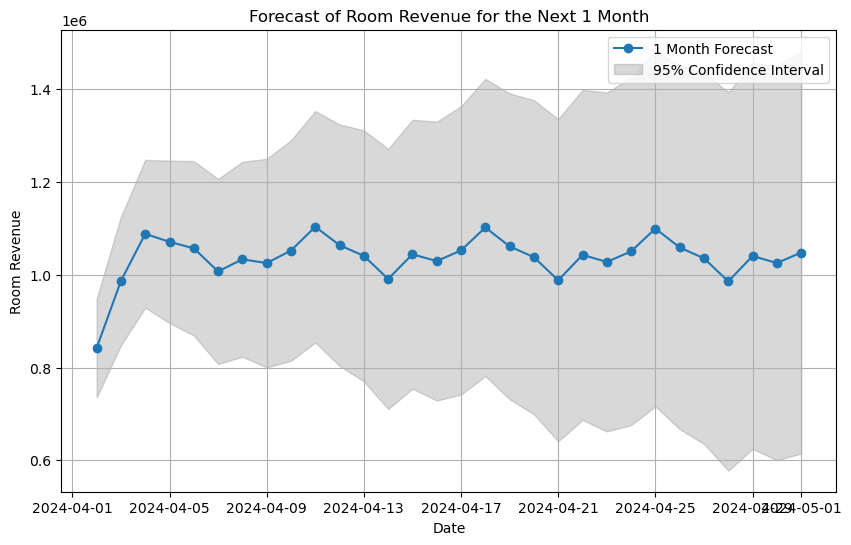


Forecasted Revenue for the next 3 month:
Room Revenue          mean  mean_ci_lower  mean_ci_upper
2024-04-02    8.418495e+05  735238.666843   9.484604e+05
2024-04-03    9.866105e+05  847812.515840   1.125408e+06
2024-04-04    1.088326e+06  928866.412081   1.247786e+06
2024-04-05    1.070990e+06  895850.139632   1.246129e+06
2024-04-06    1.057039e+06  868839.993625   1.245237e+06
...                    ...            ...            ...
2024-06-26    1.027950e+06  171471.337511   1.884428e+06
2024-06-27    1.077236e+06  213309.234923   1.941162e+06
2024-06-28    1.036309e+06  165042.844688   1.907575e+06
2024-06-29    1.012870e+06  134351.248557   1.891389e+06
2024-06-30    9.631231e+05   77425.533547   1.848821e+06

[90 rows x 3 columns]


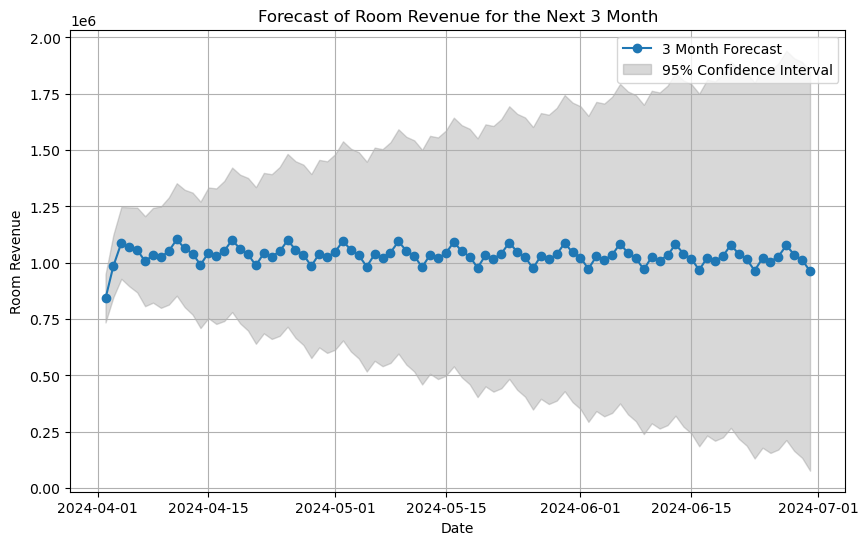


Forecasted Revenue for the next 1 year:
Room Revenue          mean  mean_ci_lower  mean_ci_upper
2024-04-02    8.418495e+05   7.352387e+05   9.484604e+05
2024-04-03    9.866105e+05   8.478125e+05   1.125408e+06
2024-04-04    1.088326e+06   9.288664e+05   1.247786e+06
2024-04-05    1.070990e+06   8.958501e+05   1.246129e+06
2024-04-06    1.057039e+06   8.688400e+05   1.245237e+06
...                    ...            ...            ...
2025-03-28    9.384794e+05  -2.262104e+06   4.139063e+06
2025-03-29    9.150407e+05  -2.295293e+06   4.125375e+06
2025-03-30    8.652935e+05  -2.354752e+06   4.085339e+06
2025-03-31    9.201787e+05  -2.309544e+06   4.149901e+06
2025-04-01    9.048789e+05  -2.334947e+06   4.144705e+06

[365 rows x 3 columns]


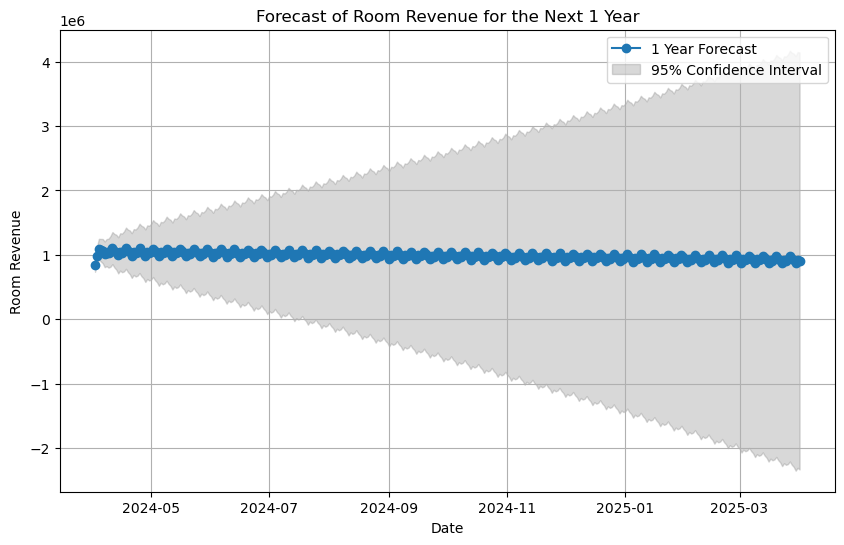

Cross-validation results:
   fold            mae           rmse  mape
0     1   41156.291791   48195.702391   NaN
1     2   55188.203399   78009.652316   NaN
2     3   66420.671855   87192.488228   NaN
3     4  197397.525437  214971.437175   NaN
4     5  169014.624547  211338.319612   NaN
Average MAE: 105835.46340554339
Average RMSE: 127941.51994431911
Average MAPE: nan%


In [91]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import holidays
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error


def grid_search_sarima(endog, exog):
    """
    Performs a grid search over SARIMA parameters and prints the best found configuration.
    """
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in itertools.product(range(0, 2), range(0, 2), range(0, 2))]

    best_aic = float('inf')
    best_params = None
    best_seasonal_params = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(endog,
                                                  exog=exog,
                                                  order=param,
                                                  seasonal_order=seasonal_param,
                                                  enforce_stationarity=False,
                                                  enforce_invertibility=False)
                results = model.fit(disp=False)
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = param
                    best_seasonal_params = seasonal_param
            except Exception:
                continue

    print(f'Best SARIMA params: {best_params}')
    print(f'Best seasonal params: {best_seasonal_params}')
    print(f'Best AIC: {best_aic}')


def load_and_prepare_data(filename, exog_columns, input_date, input_row, known_revenue):
    """
    Loads the historical data from a pickle file, reindexes the DataFrame to a daily date range,
    imputes missing values using KNN for exogenous variables, applies multiple imputation methods
    for the target variable, adds temporal features, and overrides the input date with known values.
    """
    # Load historical data
    df = pd.read_pickle(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    # Create a continuous daily date range and reindex the DataFrame
    full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')
    df_full = df.reindex(full_date_range)

    # Impute missing exogenous values with forward-fill first (as a baseline)
    df_full[exog_columns] = df_full[exog_columns].ffill()
    
    # Add temporal features before imputation so they can also be imputed if missing
    df_full['dayofweek'] = df_full.index.dayofweek
    df_full['month'] = df_full.index.month
    df_full['quarter'] = df_full.index.quarter
    df_full['is_weekend'] = df_full['dayofweek'].isin([5, 6]).astype(int)
    us_holidays = holidays.US()
    df_full['is_holiday'] = [1 if date in us_holidays else 0 for date in df_full.index]

    # Update the exogenous columns to include the new temporal features
    exog_extended = exog_columns + ['dayofweek', 'month', 'quarter', 'is_weekend', 'is_holiday']

    # Use KNN imputation for any missing exogenous values in numeric columns
    num_cols = df_full[exog_extended].select_dtypes(include=['float64', 'int64']).columns
    if df_full[num_cols].isna().any().any():
        imputer = KNNImputer(n_neighbors=5)
        df_full[num_cols] = pd.DataFrame(
            imputer.fit_transform(df_full[num_cols]),
            index=df_full.index,
            columns=num_cols
        )

    # Impute the target variable using multiple methods
    df_full['Room Revenue_linear'] = df_full['Room Revenue'].interpolate(method='linear')
    df_full['Room Revenue_spline'] = df_full['Room Revenue'].interpolate(method='spline', order=3)
    df_full['Room Revenue_time'] = df_full['Room Revenue'].interpolate(method='time')
    # Choose one imputation method (here we select the time-based interpolation)
    df_full['Room Revenue'] = df_full['Room Revenue_time']
    df_full.drop(['Room Revenue_linear', 'Room Revenue_spline', 'Room Revenue_time'], axis=1, inplace=True)

    # Override the input date with the known observation
    df_full.loc[input_date, 'Room Revenue'] = known_revenue
    for col, val in input_row.items():
        df_full.loc[input_date, col] = val

    return df_full, exog_extended


def fit_sarimax_model(endog, exog, order, seasonal_order):
    """
    Fits a SARIMAX model with the provided parameters and prints the model summary.
    """
    model = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    print(results.summary())
    return results


def forecast_and_plot(results, forecast_steps, input_date, input_row, exog_columns, title_suffix, plot_color):
    """
    Forecasts the target variable for a specified number of days using static exogenous inputs and
    plots the forecast with the 95% confidence interval. Generates required temporal features.
    """
    forecast_start = input_date + pd.Timedelta(days=1)
    forecast_dates = pd.date_range(start=forecast_start, periods=forecast_steps, freq='D')

    # Create forecast exogenous DataFrame based on input_row and generate temporal features
    X_forecast = pd.DataFrame([input_row] * forecast_steps, index=forecast_dates)
    X_forecast['dayofweek'] = X_forecast.index.dayofweek
    X_forecast['month'] = X_forecast.index.month
    X_forecast['quarter'] = X_forecast.index.quarter
    X_forecast['is_weekend'] = X_forecast['dayofweek'].isin([5, 6]).astype(int)
    us_holidays = holidays.US()
    X_forecast['is_holiday'] = [1 if date in us_holidays else 0 for date in X_forecast.index]

    # Reorder columns to match training exogenous data
    X_forecast = X_forecast[exog_columns]

    forecast_obj = results.get_forecast(steps=forecast_steps, exog=X_forecast)
    forecast_df = forecast_obj.summary_frame(alpha=0.05)

    print(f"\nForecasted Revenue for the next {title_suffix.replace('_', ' ')}:")
    print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

    plt.figure(figsize=(10, 6))
    plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color=plot_color,
             label=f'{title_suffix.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_df.index,
                     forecast_df['mean_ci_lower'],
                     forecast_df['mean_ci_upper'],
                     color='pink', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of Room Revenue for the Next {title_suffix.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{title_suffix}.png', dpi=300)
    plt.show()

    return forecast_df


def forecast_exog_values(steps, start_date, exog_models, exog_columns, input_row):
    """
    Generates forecasted exogenous values using trained models. If a model for a column fails,
    the function uses the last known input_row value.
    """
    forecasted_exog = pd.DataFrame(index=pd.date_range(start=start_date, periods=steps, freq='D'))

    for col in exog_columns:
        if exog_models.get(col) is not None:
            try:
                forecasted_values = exog_models[col].forecast(steps=steps)
                forecasted_exog[col] = forecasted_values.values
            except Exception:
                forecasted_exog[col] = input_row[col]
        else:
            forecasted_exog[col] = input_row[col]

    return forecasted_exog


def time_series_cv(df, exog_columns, order, seasonal_order, n_splits=5, test_size=30):
    """
    Performs time series cross-validation, training a SARIMAX model on each fold and evaluating
    performance metrics.
    """
    results = []
    total_samples = len(df)
    for i in range(n_splits):
        test_end = total_samples - i * test_size
        test_start = test_end - test_size
        if test_start <= 0:
            break

        train = df.iloc[:test_start].copy()
        test = df.iloc[test_start:test_end].copy()

        y_train = train['Room Revenue']
        X_train = train[exog_columns]
        y_test = test['Room Revenue']
        X_test = test[exog_columns]

        model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
        fitted_model = model.fit(disp=False)
        predictions = fitted_model.forecast(steps=len(test), exog=X_test)

        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

        results.append({'fold': i + 1, 'mae': mae, 'rmse': rmse, 'mape': mape})

    return pd.DataFrame(results)


warnings.filterwarnings("ignore")

# Define base exogenous columns (without temporal features)
base_exog_columns = [
    'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
    'House Use', 'Individual Confirm', 'Occupancy %', 'ARR',
    'Departure Rooms', 'OOO Rooms', 'Pax'
]

# Define input observation details
input_row = {
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}
known_revenue = 617835
user_input_date = '2024-04-01'
input_date = pd.to_datetime(user_input_date)

# Load and prepare the dataset (returns the DataFrame and the extended exogenous columns)
df_full, exog_columns = load_and_prepare_data('df_4_files_combined_no_outliers.pkl',
                                                base_exog_columns,
                                                input_date,
                                                input_row,
                                                known_revenue)

# (Optional) Perform grid search for optimal SARIMA parameters
grid_search_sarima(df_full['Room Revenue'], df_full[exog_columns])

# Specify SARIMAX parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)

# Fit the SARIMAX model on the extended dataset
endog_full = df_full['Room Revenue']
X_full = df_full[exog_columns]
results_extended = fit_sarimax_model(endog_full, X_full, order, seasonal_order)

# Forecast the next 7 days with static exogenous input
forecast_and_plot(results_extended, forecast_steps=7, input_date=input_date,
                    input_row=input_row, exog_columns=exog_columns,
                    title_suffix="7_day", plot_color='red')

# Train separate SARIMAX models for each exogenous variable for dynamic forecasting
exog_models = {}
for col in exog_columns:
    try:
        exog_model = sm.tsa.statespace.SARIMAX(df_full[col].fillna(method='ffill'),
                                                order=(1, 1, 1),
                                                seasonal_order=(1, 1, 1, 7))
        exog_models[col] = exog_model.fit(disp=False)
    except Exception:
        exog_models[col] = None

# Define forecast horizons and use dynamic exogenous forecasts for longer horizons
forecast_horizons = {"1_month": 30, "3_month": 90, "1_year": 365}
forecast_results = {}

for horizon, steps in forecast_horizons.items():
    X_forecast_horizon = forecast_exog_values(steps,
                                                input_date + pd.Timedelta(days=1),
                                                exog_models,
                                                exog_columns,
                                                input_row)
    forecast_obj_horizon = results_extended.get_forecast(steps=steps, exog=X_forecast_horizon)
    forecast_results[horizon] = forecast_obj_horizon.summary_frame(alpha=0.05)

    print(f"\nForecasted Revenue for the next {horizon.replace('_', ' ')}:")
    print(forecast_results[horizon][['mean', 'mean_ci_lower', 'mean_ci_upper']])

    plt.figure(figsize=(10, 6))
    plt.plot(forecast_results[horizon].index, forecast_results[horizon]['mean'], marker='o', label=f'{horizon.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_results[horizon].index,
                        forecast_results[horizon]['mean_ci_lower'],
                        forecast_results[horizon]['mean_ci_upper'],
                        color='gray', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of Room Revenue for the Next {horizon.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{horizon}.png', dpi=300)
    plt.show()

# Time series cross-validation
cv_results = time_series_cv(df_full.dropna(), exog_columns, order, seasonal_order)
print("Cross-validation results:")
print(cv_results)
print(f"Average MAE: {cv_results['mae'].mean()}")
print(f"Average RMSE: {cv_results['rmse'].mean()}")
print(f"Average MAPE: {cv_results['mape'].mean()}%")




# ARIMA

                                     SARIMAX Results                                     
Dep. Variable:                      Room Revenue   No. Observations:                  944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -11343.083
Date:                           Sun, 15 Jun 2025   AIC                          22718.165
Time:                                   08:54:48   BIC                          22795.631
Sample:                               09-01-2021   HQIC                         22747.702
                                    - 04-01-2024                                         
Covariance Type:                             opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Room Inventory -2105.3389    698.254     -3.015      0.003   -3473.893    -736.785
Rooms Sold   

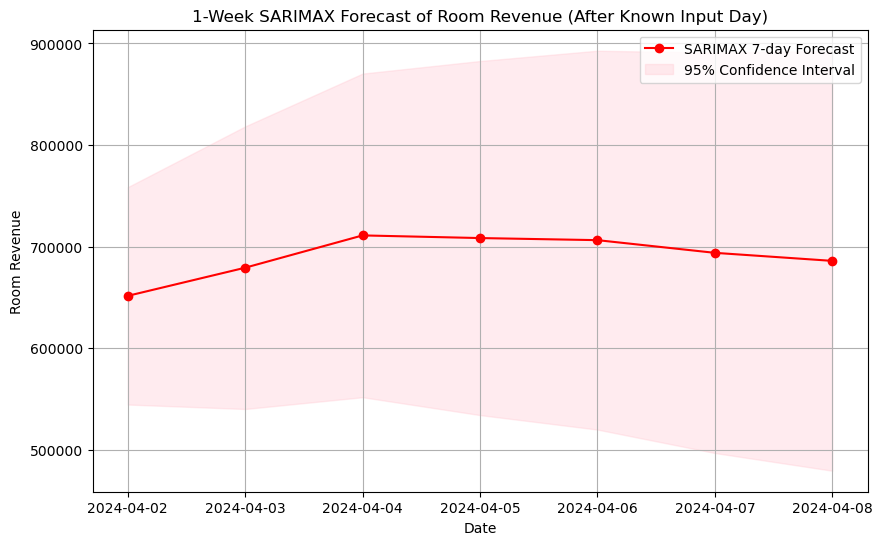

                               SARIMAX Results                                
Dep. Variable:           Room Revenue   No. Observations:                  944
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12518.384
Date:                Sun, 15 Jun 2025   AIC                          25042.768
Time:                        08:54:48   BIC                          25057.316
Sample:                    09-01-2021   HQIC                         25048.313
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.034     17.637      0.000       0.532       0.666
ma.L1         -0.8667      0.028    -31.329      0.000      -0.921      -0.812
sigma2      2.041e+10   5.38e-13   3.79e+22      0.0

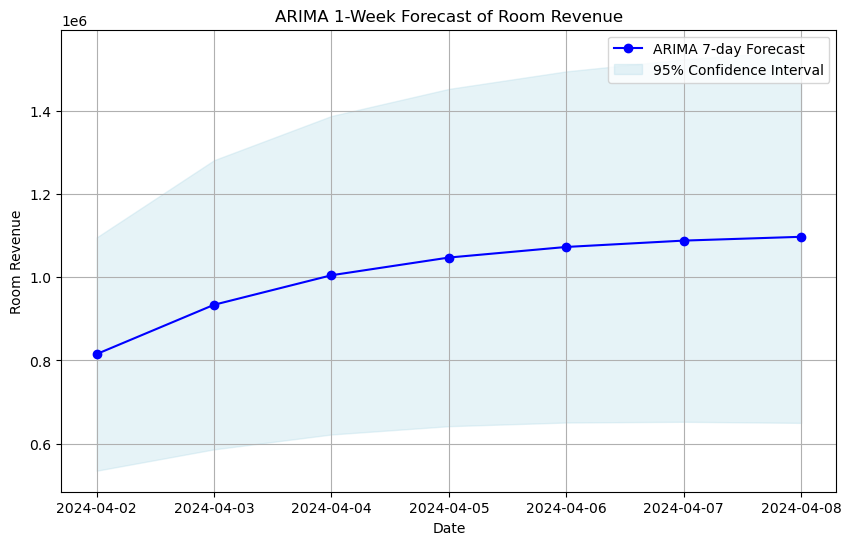


SARIMAX Forecasted Revenue for the next 1 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822  544700.605594  758563.228050
2024-04-03    679325.364523  540308.990486  818341.738561
2024-04-04    711102.112742  551890.012063  870314.213421
2024-04-05    708493.024141  534311.234977  882674.813306
2024-04-06    706435.707952  520052.622903  892818.793001


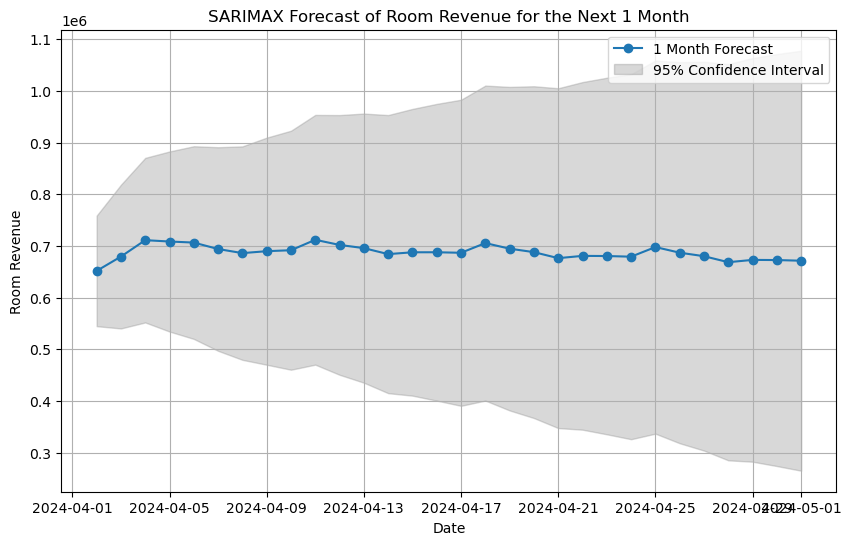


SARIMAX Forecasted Revenue for the next 3 month:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822  544700.605594  758563.228050
2024-04-03    679325.364523  540308.990486  818341.738561
2024-04-04    711102.112742  551890.012063  870314.213421
2024-04-05    708493.024141  534311.234977  882674.813306
2024-04-06    706435.707952  520052.622903  892818.793001


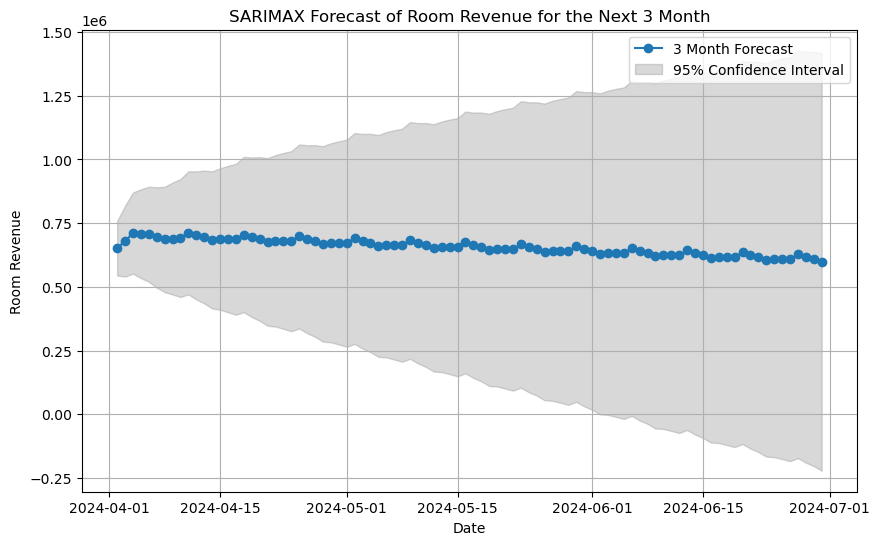


SARIMAX Forecasted Revenue for the next 1 year:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-04-02    651631.916822  544700.605594  758563.228050
2024-04-03    679325.364523  540308.990486  818341.738561
2024-04-04    711102.112742  551890.012063  870314.213421
2024-04-05    708493.024141  534311.234977  882674.813306
2024-04-06    706435.707952  520052.622903  892818.793001


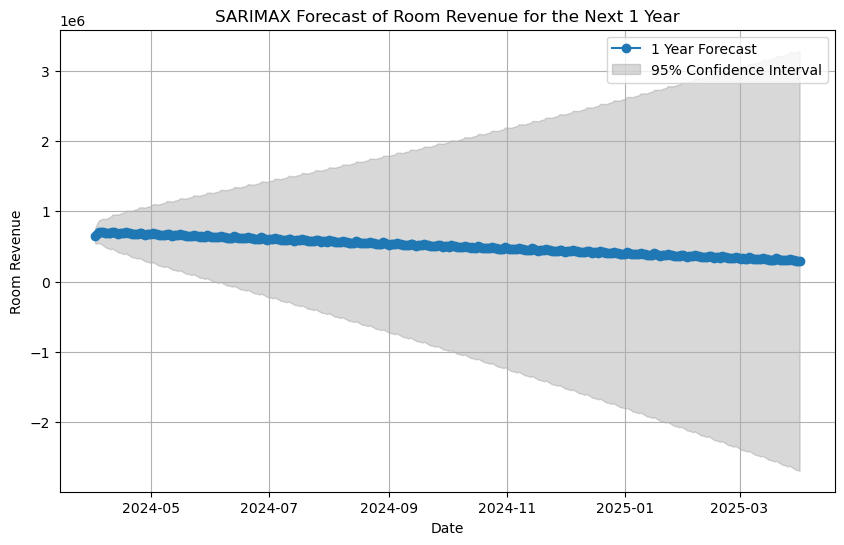

In [92]:
#The above code performs time series forecasting using SARIMAX and ARIMA models on hotel room revenue data. Here is a breakdown of the main steps:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# 1. Load historical data from the pickle file
df = pd.read_pickle('df_4_files_combined_no_outliers.pkl')

# Ensure 'Date' is datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# 2. Define exogenous columns (all numeric columns except revenue and date-related ones)
exog_columns = [
    'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 
    'House Use', 'Individual Confirm', 'Occupancy %', 'ARR', 
    'Departure Rooms', 'OOO Rooms', 'Pax'
]

# 3. Specify SARIMAX parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # weekly seasonality

# 4. Define the new (input) observation details
input_row = {
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}
known_revenue = 617835  # revenue for the input date

# Input date for the new observation (which is far beyond the last date)
user_input_date = '2024-04-01'
input_date = pd.to_datetime(user_input_date)

# 5. Create a continuous daily date range from the first historical date to the input date.
full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')

# Reindex the DataFrame to include all dates
df_full = df.reindex(full_date_range)

# 6. Impute missing exogenous variables. Here we use forward-fill.
df_full[exog_columns] = df_full[exog_columns].ffill()

# 7. For the target ('Room Revenue'), fill the gap by interpolation.
df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()

# 8. Override the values on the input date with your known observation.
df_full.loc[input_date, 'Room Revenue'] = known_revenue
for col, val in input_row.items():
    df_full.loc[input_date, col] = val

# (Optional) Check the data near the input date
#print(df_full.loc[input_date - pd.Timedelta(days=3):input_date + pd.Timedelta(days=3)])

# 9. Re-fit the SARIMAX model on the extended dataset.
endog_full = df_full['Room Revenue']
X_full = df_full[exog_columns]

model_extended = sm.tsa.statespace.SARIMAX(endog_full, exog=X_full, order=order, seasonal_order=seasonal_order)
results_extended = model_extended.fit(disp=False)
print(results_extended.summary())

# 10. Forecast the next 7 days (as in your original forecast) using SARIMAX
forecast_start = input_date + pd.Timedelta(days=1)
forecast_dates = pd.date_range(start=forecast_start, periods=7, freq='D')

# For forecasting, assume the exogenous variables remain constant as in the input row.
X_forecast = pd.DataFrame([input_row] * 7, index=forecast_dates)

forecast_obj = results_extended.get_forecast(steps=7, exog=X_forecast)
forecast_df = forecast_obj.summary_frame(alpha=0.05)

print("SARIMAX Forecasted Revenue for the next 7 days:")
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color='red', label='SARIMAX 7-day Forecast')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('1-Week SARIMAX Forecast of Room Revenue (After Known Input Day)')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_sarimax_7_days.png', dpi=300)
plt.show()

# 11. Now, apply a plain ARIMA model (without exogenous variables)
# We will use the same (p, d, q) order as in SARIMAX: (1, 1, 1)
from statsmodels.tsa.arima.model import ARIMA

arima_order = (1, 1, 1)
arima_model = ARIMA(endog_full, order=arima_order)
arima_results = arima_model.fit()
print(arima_results.summary())

# Forecast the next 7 days using ARIMA
arima_forecast_obj = arima_results.get_forecast(steps=7)
arima_forecast_df = arima_forecast_obj.summary_frame(alpha=0.05)

print("ARIMA Forecast for the next 7 days:")
print(arima_forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

plt.figure(figsize=(10, 6))
plt.plot(arima_forecast_df.index, arima_forecast_df['mean'], marker='o', color='blue', label='ARIMA 7-day Forecast')
plt.fill_between(arima_forecast_df.index, arima_forecast_df['mean_ci_lower'], arima_forecast_df['mean_ci_upper'], 
                 color='lightblue', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA 1-Week Forecast of Room Revenue')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_arima_7_days.png', dpi=300)
plt.show()

# 12. Extend forecasts for SARIMAX for 1 month (30 days), 3 months (90 days), and 1 year (365 days)
forecast_horizons = {
    "1_month": 30,
    "3_month": 90,
    "1_year": 365
}

forecast_results = {}

for horizon, steps in forecast_horizons.items():
    forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=steps, freq='D')
    # Use the same exogenous input for every forecast day
    X_forecast_horizon = pd.DataFrame([input_row] * steps, index=forecast_dates)
    
    forecast_obj_horizon = results_extended.get_forecast(steps=steps, exog=X_forecast_horizon)
    forecast_results[horizon] = forecast_obj_horizon.summary_frame(alpha=0.05)
    
    print(f"\nSARIMAX Forecasted Revenue for the next {horizon.replace('_', ' ')}:")
    print(forecast_results[horizon][['mean', 'mean_ci_lower', 'mean_ci_upper']].head())  # printing only the first few rows

    # Plotting each forecast
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_results[horizon].index, forecast_results[horizon]['mean'], marker='o', label=f'{horizon.replace("_", " ").title()} Forecast')
    plt.fill_between(forecast_results[horizon].index, 
                     forecast_results[horizon]['mean_ci_lower'], 
                     forecast_results[horizon]['mean_ci_upper'], 
                     color='gray', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'SARIMAX Forecast of Room Revenue for the Next {horizon.replace("_", " ").title()}')
    plt.xlabel('Date')
    plt.ylabel('Room Revenue')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_sarimax_{horizon}.png', dpi=300)
    plt.show()


### Ridge Regression

In [93]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings

# warnings.filterwarnings("ignore")

# from sklearn.linear_model import Ridge  # or Lasso, ElasticNet, etc.


Load and Prepare Data

In [94]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import Ridge

# # 1. Load historical data
# df = pd.read_pickle('df_4_files_combined_no_outliers.pkl')

# # 2. Ensure Date is datetime and set it as index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True)

# # 3. Define exogenous columns (excluding 'Room Revenue')
# exog_columns = [
#     'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 
#     'Compliment Rooms', 'House Use', 'Individual Confirm', 
#     'Occupancy %', 'ARR', 'Departure Rooms', 'OOO Rooms', 'Pax'
# ]

# # 4. Identify your "cutoff" or "known" future date
# user_input_date = '2024-04-01'
# input_date = pd.to_datetime(user_input_date)

# # 5. Reindex DataFrame up to (and including) the known date, 
# #    filling gaps and overriding known values if needed
# full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')
# df_full = df.reindex(full_date_range)

# # Forward-fill exogenous columns
# df_full[exog_columns] = df_full[exog_columns].ffill()

# # Interpolate Room Revenue
# df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()

# # Suppose you have 1 known future point of data on 'input_date'
# known_revenue = 617835
# input_row = {
#     'Total Room Inventory': 117.0,
#     'Rooms Sold': 117.0,
#     'Arrival Rooms': 49.0,
#     'Compliment Rooms': 1.0,
#     'House Use': 6.0,
#     'Individual Confirm': 117.0,
#     'Occupancy %': 94.0171,
#     'ARR': 5280.6428,
#     'Departure Rooms': 45.0,
#     'OOO Rooms': 15.0,
#     'Pax': 172.0
# }

# # Override known future row
# df_full.loc[input_date, 'Room Revenue'] = known_revenue
# for col, val in input_row.items():
#     df_full.loc[input_date, col] = val

# # 6. Create training set chronologically up to that date
# train_df = df_full.loc[:input_date]
# X_train = train_df[exog_columns]
# y_train = train_df['Room Revenue']

# # 7. Train the Ridge model
# ridge_model = Ridge(alpha=1.0)
# ridge_model.fit(X_train, y_train)


Forecast Next 7 days

In [95]:
# import matplotlib.pyplot as plt

# # 1. Define the 7-day forecast window
# forecast_days = 7
# forecast_start = input_date + pd.Timedelta(days=1)
# forecast_dates = pd.date_range(start=forecast_start, periods=forecast_days, freq='D')

# # 2. Construct day-by-day exogenous data
# future_exog_data = [
#     {
#         'Total Room Inventory': 117.0,
#         'Rooms Sold': 110.0,
#         'Arrival Rooms': 50.0,
#         'Compliment Rooms': 1.0,
#         'House Use': 6.0,
#         'Individual Confirm': 110.0,
#         'Occupancy %': 90.0,
#         'ARR': 5250.0,
#         'Departure Rooms': 48.0,
#         'OOO Rooms': 15.0,
#         'Pax': 165.0
#     },
#     {
#         'Total Room Inventory': 117.0,
#         'Rooms Sold': 115.0,
#         'Arrival Rooms': 55.0,
#         'Compliment Rooms': 1.0,
#         'House Use': 6.0,
#         'Individual Confirm': 115.0,
#         'Occupancy %': 92.0,
#         'ARR': 5280.0,
#         'Departure Rooms': 49.0,
#         'OOO Rooms': 15.0,
#         'Pax': 170.0
#     },
#     {
#         'Total Room Inventory': 117.0,
#         'Rooms Sold': 120.0,
#         'Arrival Rooms': 58.0,
#         'Compliment Rooms': 1.0,
#         'House Use': 6.0,
#         'Individual Confirm': 117.0,
#         'Occupancy %': 94.0,
#         'ARR': 5300.0,
#         'Departure Rooms': 52.0,
#         'OOO Rooms': 15.0,
#         'Pax': 175.0
#     },
    
# ]

# X_forecast_7 = pd.DataFrame(future_exog_data, index=forecast_dates)

# # 3. Predict using the trained Ridge model
# y_pred_7 = ridge_model.predict(X_forecast_7)

# # 4. Put forecasts in a DataFrame
# ridge_forecast_7 = pd.DataFrame({
#     'Predicted Room Revenue': y_pred_7
# }, index=forecast_dates)

# print("\nRidge 7-Day Forecast (Varying Exogenous Inputs):")
# print(ridge_forecast_7)

# # 5. Plot
# plt.figure(figsize=(10, 6))
# plt.plot(
#     ridge_forecast_7.index, 
#     ridge_forecast_7['Predicted Room Revenue'],
#     marker='o', 
#     label='Ridge 7-day Forecast'
# )
# plt.title('Ridge Model 7-Day Forecast of Room Revenue')
# plt.xlabel('Date')
# plt.ylabel('Room Revenue')
# plt.grid(True)
# plt.legend()
# plt.show()


Longer-Horizon Forecasts (1 Month, 3 Months, 1 Year)

In [96]:
# forecast_horizons = {
#     "1_month": 30,
#     "3_month": 90,
#     "1_year": 365
# }

# ridge_forecasts = {}

# for label, steps in forecast_horizons.items():
#     future_dates = pd.date_range(
#         start=input_date + pd.Timedelta(days=1), 
#         periods=steps, 
#         freq='D'
#     )
    
#     # Example: each day’s exogenous data changes slightly
#     exog_list = []
#     for i in range(steps):
#         current_date = input_date + pd.Timedelta(days=(i+1))
#         day_of_week = current_date.weekday()  # Monday=0, Sunday=6
        
#         # Just an example pattern: Higher occupancy on Fri(4)/Sat(5)
#         occupancy = 95.0 if day_of_week in [4,5] else 85.0
#         total_inventory = 117.0
#         rooms_sold = (occupancy / 100.0) * total_inventory
#         arr_value = 5200.0 + 10 * i   # naive daily upward drift
#         pax_value = rooms_sold * 1.5
        
#         row = {
#             'Total Room Inventory': total_inventory,
#             'Rooms Sold': rooms_sold,
#             'Arrival Rooms': 40.0 + (i % 5),
#             'Compliment Rooms': 1.0,
#             'House Use': 6.0,
#             'Individual Confirm': rooms_sold,
#             'Occupancy %': occupancy,
#             'ARR': arr_value,
#             'Departure Rooms': 38.0 + (i % 3),
#             'OOO Rooms': 15.0,
#             'Pax': pax_value
#         }
        
#         exog_list.append(row)
        
#     X_forecast = pd.DataFrame(exog_list, index=future_dates)
    
#     y_pred = ridge_model.predict(X_forecast)
#     ridge_forecasts[label] = pd.DataFrame(
#         {'Predicted Room Revenue': y_pred}, 
#         index=future_dates
#     )
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(
#         ridge_forecasts[label].index,
#         ridge_forecasts[label]['Predicted Room Revenue'],
#         marker='o',
#         label=f'{label.title()} Forecast'
#     )
#     plt.title(f'Ridge Model Forecast of Room Revenue for the Next {label.replace("_", " ").title()}')
#     plt.xlabel('Date')
#     plt.ylabel('Room Revenue')
#     plt.grid(True)
#     plt.legend()
#     plt.savefig(f'forecast_ridge_{label}.png', dpi=300)
#     plt.show()

# # Inspect forecasts
# #print(ridge_forecasts['1_month'].head())
# #print(ridge_forecasts['3_month'].head())
# #print(ridge_forecasts['1_year'].head())


Prophet Model (Facebook/Meta)

08:54:50 - cmdstanpy - INFO - Chain [1] start processing
08:54:50 - cmdstanpy - INFO - Chain [1] done processing


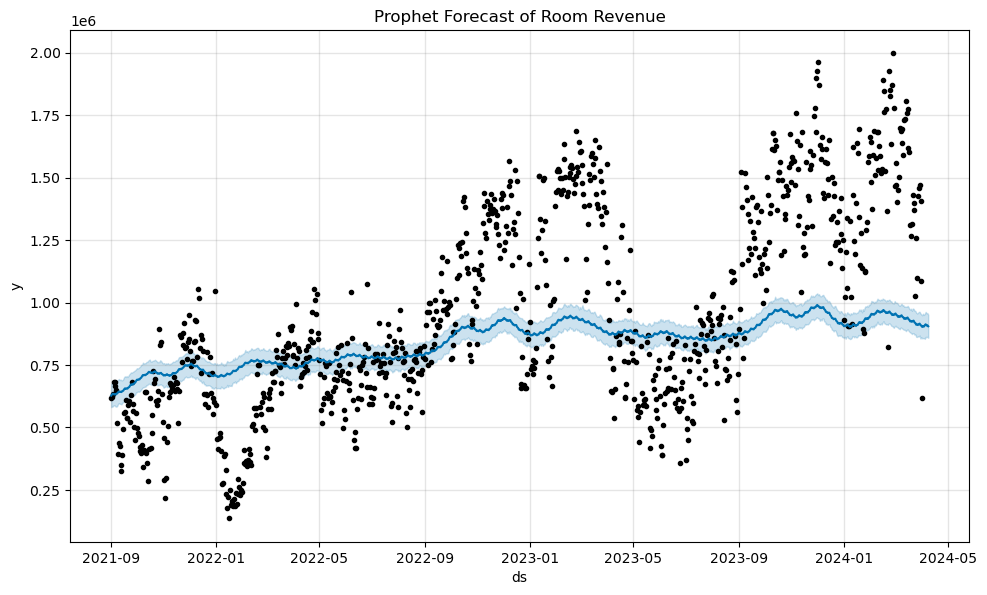

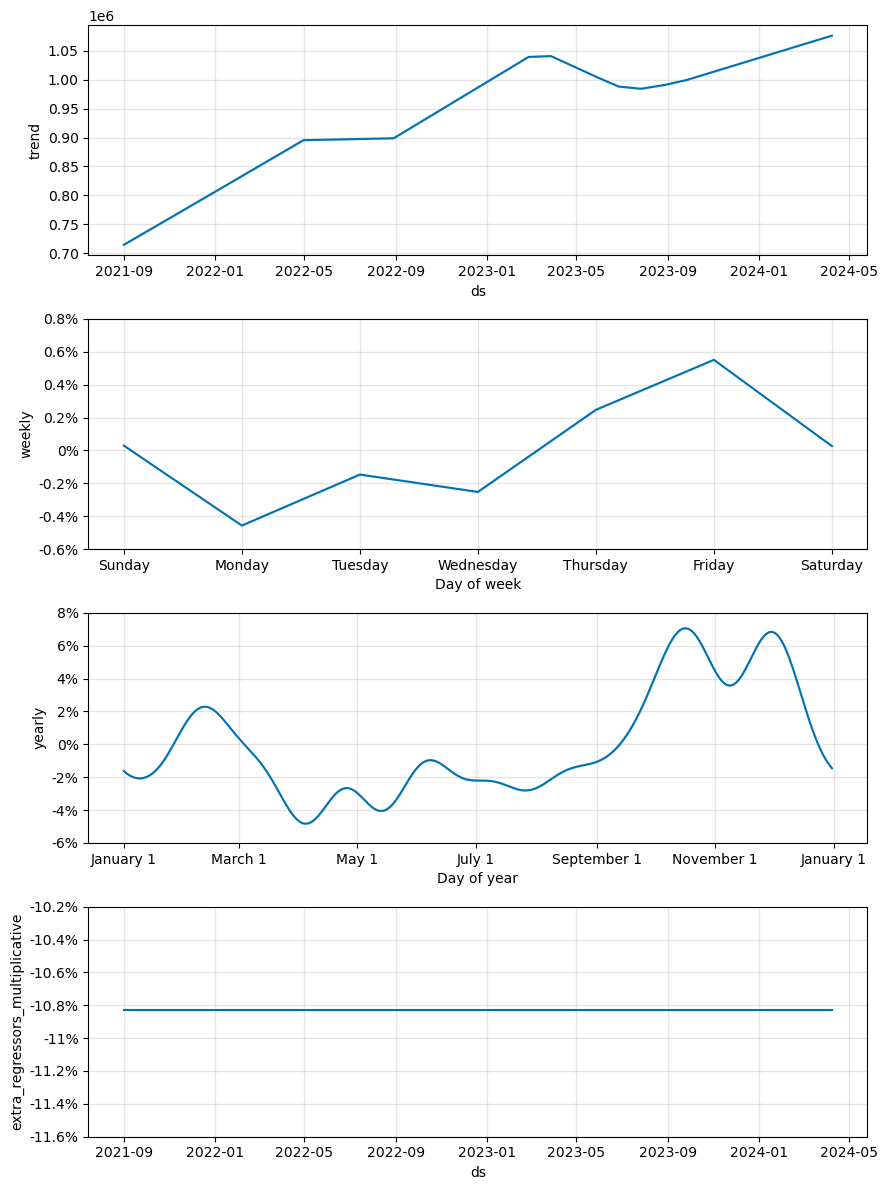

In [97]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data in Prophet format (ds for dates, y for target)
prophet_df = pd.DataFrame({
    'ds': df_full.index,
    'y': df_full['Room Revenue']
})

# Add exogenous variables as regressors
for col in exog_columns:
    prophet_df[col] = df_full[col]

# Create and fit model
model = Prophet(
    changepoint_prior_scale=0.05,  # Flexibility of the trend
    seasonality_prior_scale=10,     # Strength of seasonality
    seasonality_mode='multiplicative',
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)

# Add exogenous variables
for col in exog_columns:
    model.add_regressor(col)

model.fit(prophet_df)

# Create future dataframe for forecasting (7 days)
future = model.make_future_dataframe(periods=7)

# Add exogenous variables to future dataframe
for col in exog_columns:
    future[col] = pd.DataFrame([input_row] * len(future))[col].values

# Make forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast of Room Revenue')
plt.savefig('forecast_prophet.png', dpi=300)
plt.show()

# Plot components
fig = model.plot_components(forecast)
plt.savefig('forecast_prophet_components.png', dpi=300)
plt.show()

XGBoost with Time Features

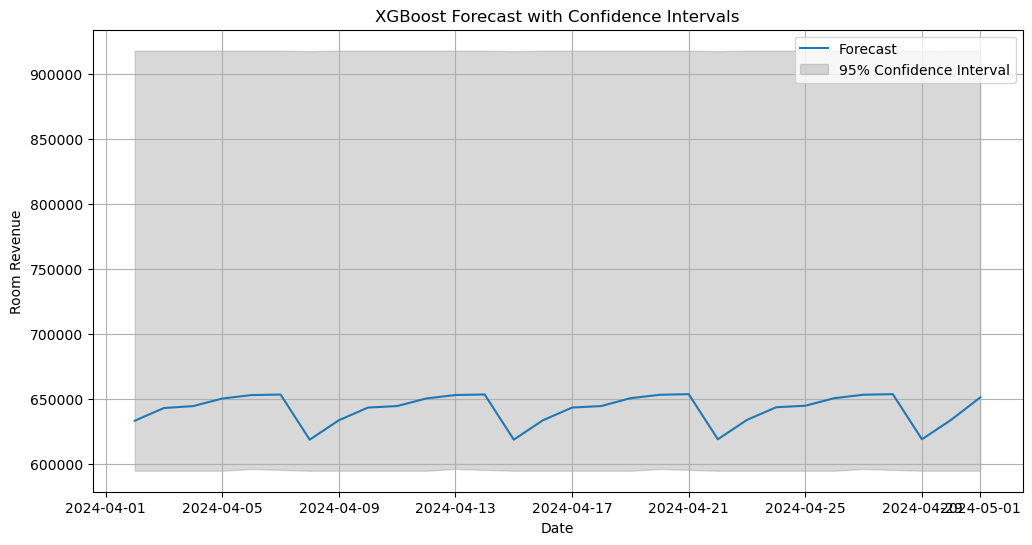

In [98]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# Create time features
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['is_weekend'] = df.index.dayofweek.isin([5, 6]).astype(int)
    return df

# Prepare data
data = create_features(df_full)
features = exog_columns + ['dayofweek', 'month', 'quarter', 'year', 'dayofyear', 'is_weekend']

# Train-test split (use all available data up to input_date for training)
train = data.loc[:input_date]
X_train = train[features]
y_train = train['Room Revenue']

# Define and train model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Create forecast dataframe
forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame(index=forecast_dates)
forecast_df = create_features(forecast_df)

# Add static exogenous features
for col in exog_columns:
    forecast_df[col] = input_row[col]

# Make prediction
forecast_df['predicted'] = model.predict(forecast_df[features])

# For confidence intervals, we can use quantile regression
# First, train models for lower and upper bounds
model_lower = xgb.XGBRegressor(objective='reg:quantileerror', quantile_alpha=0.025)
model_upper = xgb.XGBRegressor(objective='reg:quantileerror', quantile_alpha=0.975)

model_lower.fit(X_train, y_train)
model_upper.fit(X_train, y_train)

# Predict bounds
forecast_df['lower_bound'] = model_lower.predict(forecast_df[features])
forecast_df['upper_bound'] = model_upper.predict(forecast_df[features])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['predicted'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['lower_bound'], forecast_df['upper_bound'],
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('XGBoost Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_xgboost.png', dpi=300)
plt.show()

LSTM Neural Network for Time Series


In [99]:
import numpy as np
print(np.__version__)

1.23.5


Epoch 1/50
23/23 [==============================] - 3s 36ms/step - loss: 0.0416 - val_loss: 0.0490
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0136 - val_loss: 0.0225
Epoch 3/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0115 - val_loss: 0.0156
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0107 - val_loss: 0.0152
Epoch 5/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0101 - val_loss: 0.0149
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0146
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0170
Epoch 8/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0109 - val_loss: 0.0151
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0144
Epoch 10/50
23/23 [==============================] - 0s 10ms/step - loss: 0.0102 - val_loss: 0.0137
Epoch 11/

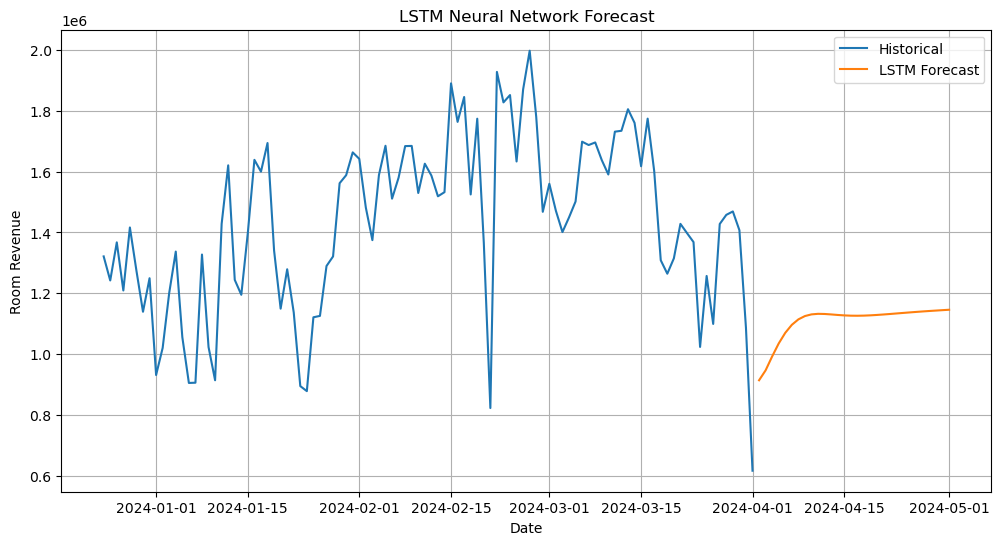

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_revenue = scaler.fit_transform(df_full['Room Revenue'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 30
X, y = create_sequences(scaled_revenue, seq_length)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Prepare input for forecasting
last_sequence = scaled_revenue[-seq_length:].reshape(1, seq_length, 1)

# Forecast
forecast_steps = 30
forecast_sequence = last_sequence.copy()
forecasts = []

for _ in range(forecast_steps):
    # Predict next step
    next_step = model.predict(forecast_sequence)[0][0]
    forecasts.append(next_step)
    
    # Shift sequence and add new value at the end
    forecast_sequence = forecast_sequence.copy()
    forecast_sequence[:, :-1, :] = forecast_sequence[:, 1:, :]
    forecast_sequence[:, -1, :] = next_step

# Invert the scaling
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1)).flatten()

# Create forecast dataframe
forecast_dates = pd.date_range(
    start=df_full.index[-1] + pd.Timedelta(days=1), 
    periods=forecast_steps, 
    freq='D'
)
forecast_df = pd.DataFrame({
    'predicted': forecasts
}, index=forecast_dates)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_full.index[-100:], df_full['Room Revenue'][-100:], label='Historical')
plt.plot(forecast_df.index, forecast_df['predicted'], label='LSTM Forecast')
plt.title('LSTM Neural Network Forecast')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_lstm.png', dpi=300)
plt.show()

Ensemble Model (Reducing Confidence Intervals)

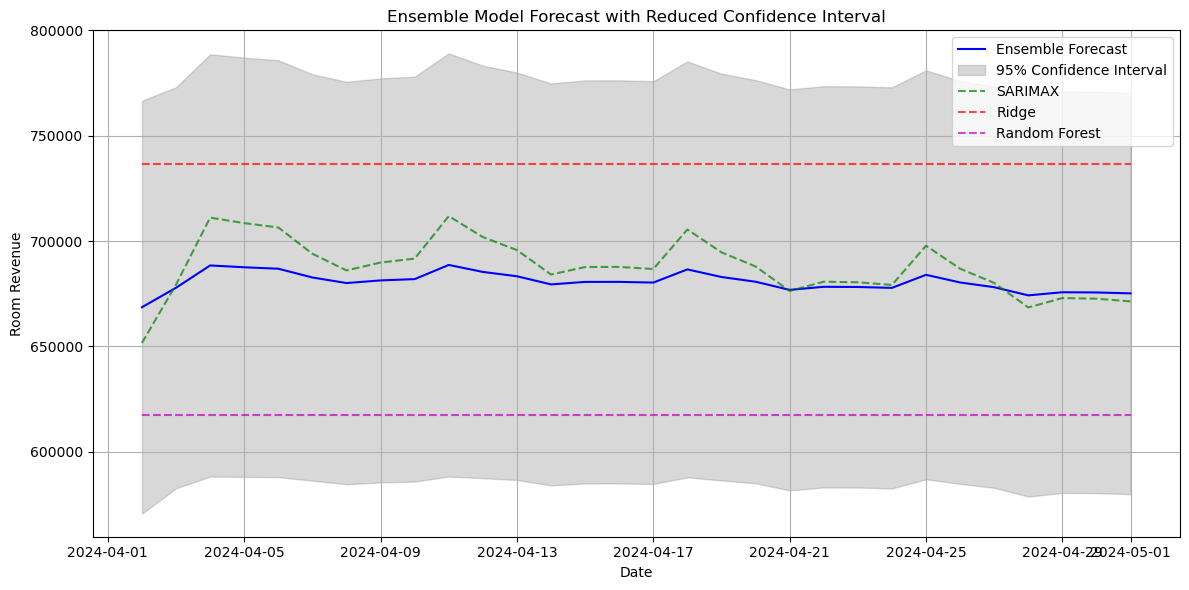

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor

# Training data
train_df = df_full.loc[:input_date]
X_train = train_df[exog_columns]
y_train = train_df['Room Revenue']

# Create forecast dates
forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=30, freq='D')
X_forecast = pd.DataFrame([input_row] * 30, index=forecast_dates)

# 1. SARIMAX Model
sarimax = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarimax_model = sarimax.fit(disp=False)
sarimax_forecast = sarimax_model.get_forecast(steps=30, exog=X_forecast)
sarimax_mean = sarimax_forecast.predicted_mean
sarimax_ci = sarimax_forecast.conf_int()

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_forecast)

# 3. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_forecast)

# Create ensemble forecast (simple average)
ensemble_forecast = pd.DataFrame({
    'sarimax': sarimax_mean,
    'ridge': ridge_pred,
    'random_forest': rf_pred
}, index=forecast_dates)

ensemble_forecast['ensemble_mean'] = ensemble_forecast.mean(axis=1)

# For confidence intervals, use the empirical distribution of errors
errors = []
for model_name in ['sarimax', 'ridge', 'random_forest']:
    errors.append(ensemble_forecast[model_name] - ensemble_forecast['ensemble_mean'])

# Calculate standard deviation of errors
error_std = np.std(np.vstack(errors), axis=0)

# Create confidence intervals (empirical)
z_value = 1.96  # 95% confidence
ensemble_forecast['lower_bound'] = ensemble_forecast['ensemble_mean'] - z_value * error_std
ensemble_forecast['upper_bound'] = ensemble_forecast['ensemble_mean'] + z_value * error_std

# Plot the ensemble forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(ensemble_forecast.index, ensemble_forecast['ensemble_mean'], 'b-', label='Ensemble Forecast')
plt.fill_between(
    ensemble_forecast.index,
    ensemble_forecast['lower_bound'],
    ensemble_forecast['upper_bound'],
    color='gray', alpha=0.3,
    label='95% Confidence Interval'
)

# Also plot individual model forecasts
plt.plot(ensemble_forecast.index, ensemble_forecast['sarimax'], 'g--', alpha=0.7, label='SARIMAX')
plt.plot(ensemble_forecast.index, ensemble_forecast['ridge'], 'r--', alpha=0.7, label='Ridge')
plt.plot(ensemble_forecast.index, ensemble_forecast['random_forest'], 'm--', alpha=0.7, label='Random Forest')

plt.title('Ensemble Model Forecast with Reduced Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ensemble_forecast.png', dpi=300)
plt.show()

TBATS Model for Multiple Seasonality

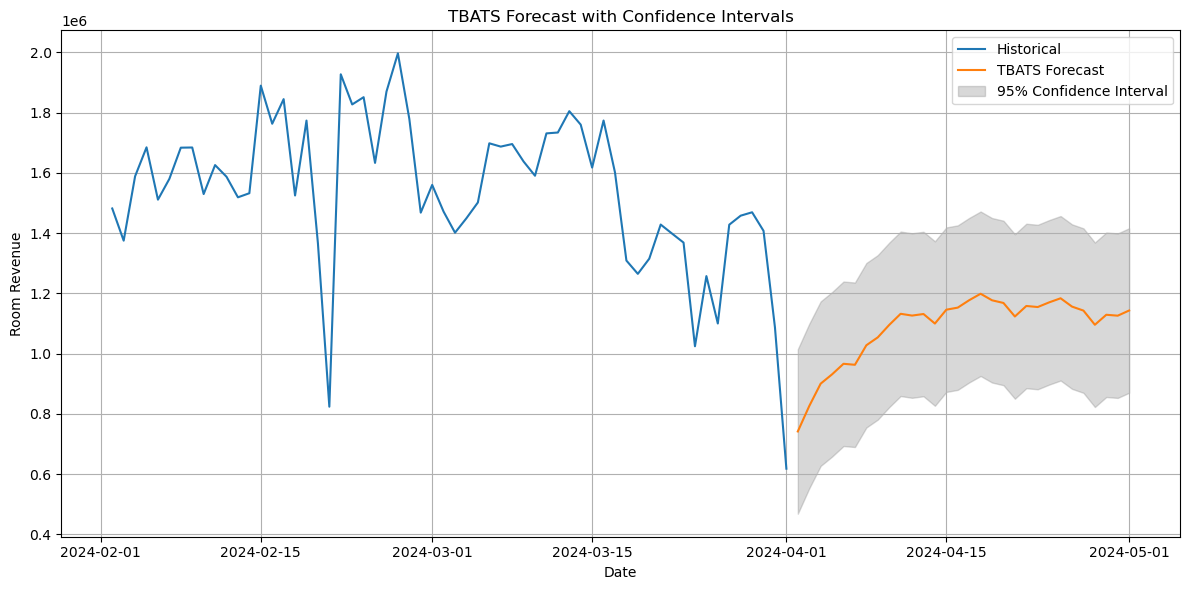

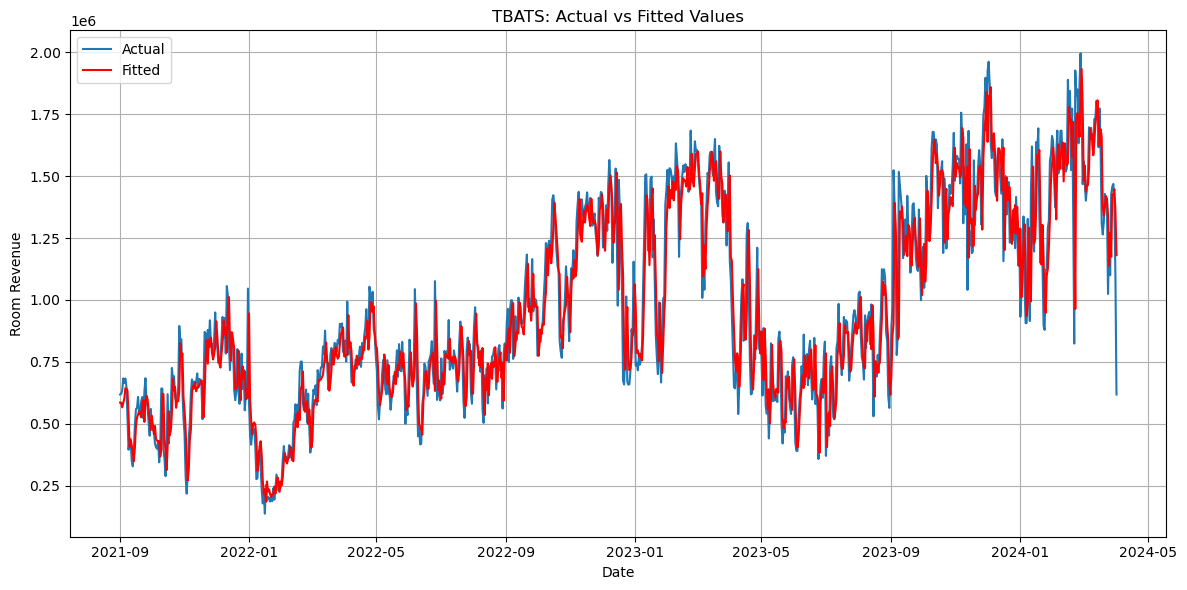

<Figure size 1200x1000 with 0 Axes>

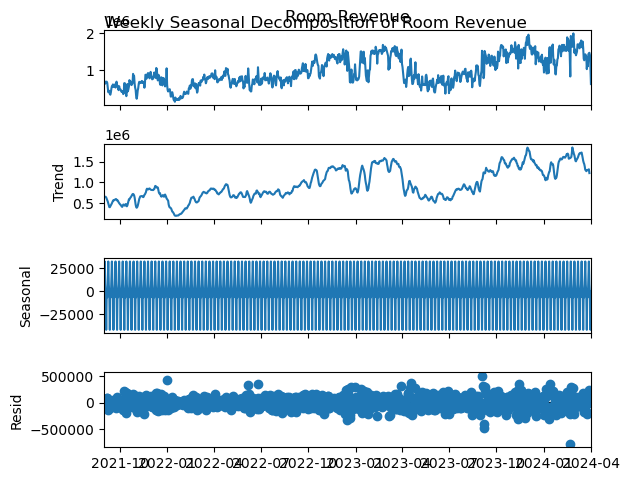

<Figure size 1200x1000 with 0 Axes>

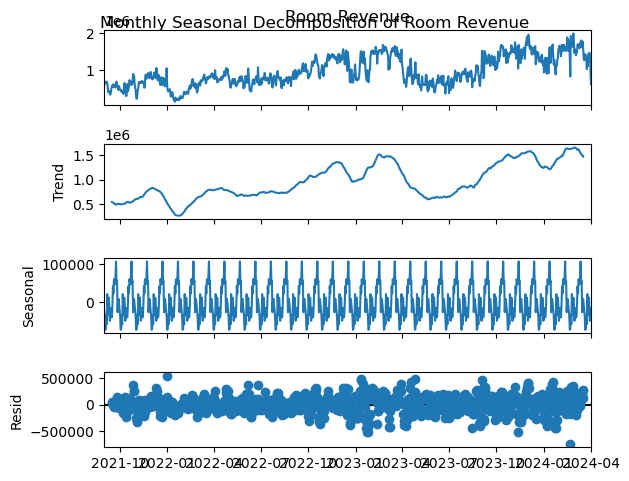

In [102]:
from tbats import TBATS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Prepare time series data
ts_data = df_full['Room Revenue'].asfreq('D')

# Fit TBATS model
estimator = TBATS(
    seasonal_periods=[7, 30.5],  # Weekly and monthly seasonality
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=True
)
model = estimator.fit(ts_data)

# Forecast 30 days
forecast_steps = 30
forecast = model.forecast(steps=forecast_steps)

# Handle forecast based on type
if isinstance(forecast, dict):
    print("Forecast is a dictionary with keys:", forecast.keys())
    predictions = np.array(list(forecast.values()))
else:
    predictions = forecast

# Calculate confidence intervals manually
residuals = model.resid
std_resid = np.std(residuals)
z_value = 1.96  # 95% confidence
lower_bounds = np.array(predictions) - z_value * std_resid
upper_bounds = np.array(predictions) + z_value * std_resid

# Create forecast dataframe
forecast_dates = pd.date_range(
    start=ts_data.index[-1] + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)
forecast_df = pd.DataFrame({
    'mean': predictions,
    'lower_bound': lower_bounds,
    'upper_bound': upper_bounds
}, index=forecast_dates)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index[-60:], ts_data[-60:], label='Historical')
plt.plot(forecast_df.index, forecast_df['mean'], label='TBATS Forecast')
plt.fill_between(
    forecast_df.index,
    forecast_df['lower_bound'],
    forecast_df['upper_bound'],
    color='gray', alpha=0.3,
    label='95% Confidence Interval'
)
plt.title('TBATS Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('forecast_tbats.png', dpi=300)
plt.show()

# Plot fitted values vs actual
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Actual')

# Access fitted values using y_hat
if hasattr(model, 'y_hat'):
    plt.plot(ts_data.index, model.y_hat, label='Fitted', color='red')
elif hasattr(model, 'fitted_values'):
    plt.plot(ts_data.index, model.fitted_values, label='Fitted', color='red')
else:
    print("No fitted values attribute found. Available attributes:", dir(model))

plt.title('TBATS: Actual vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fitted_tbats.png', dpi=300)
plt.show()

# Use statsmodels for seasonal decomposition as an alternative
# Decompose the time series to see the components
decomposition_weekly = sm.tsa.seasonal_decompose(ts_data, model='additive', period=7)
fig = plt.figure(figsize=(12, 10))
fig = decomposition_weekly.plot()
plt.suptitle('Weekly Seasonal Decomposition of Room Revenue')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig ('decomposition_weekly.png', dpi=300)
plt.show()

# Monthly decomposition
decomposition_monthly = sm.tsa.seasonal_decompose(ts_data, model='additive', period=30)
fig = plt.figure(figsize=(12, 10))
fig = decomposition_monthly.plot()
plt.suptitle('Monthly Seasonal Decomposition of Room Revenue')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig ('decomposition_monthly.png', dpi=300)
plt.show()

Vector Autoregression (VAR) for Short-Term Dependencies


In [103]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.tsa.api import VAR
# from statsmodels.tsa.stattools import adfuller
# import warnings
# warnings.filterwarnings("ignore")

# # Load your data
# df = pd.read_pickle('df_4_files_combined_no_outliers.pkl')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True)

# # Select key variables for VAR (include Room Revenue and its most correlated variables)
# var_columns = ['Room Revenue', 'Rooms Sold', 'Occupancy %', 'ARR', 'Pax']
# var_data = df[var_columns].dropna()

# # First difference to ensure stationarity
# var_data_diff = var_data.diff().dropna()

# # Fit VAR model - specifically good for 1-day relations
# var_model = VAR(var_data_diff)
# results = var_model.fit(maxlags=7, ic='aic')  # AIC will help find optimal lag structure
# print("Optimal lag order according to AIC:", results.k_ar)
# print(results.summary())

# # Create 1-day ahead forecast
# lag_order = results.k_ar
# forecast_input = var_data_diff.values[-lag_order:]
# forecast = results.forecast(y=forecast_input, steps=1)
# print("\n1-day ahead forecast (differenced):", forecast)

# # Convert back to original scale (inverse of differencing)
# forecast_original_scale = forecast + var_data.iloc[-1].values
# print("\n1-day ahead forecast (original scale):")
# for i, col in enumerate(var_columns):
#     print(f"{col}: {forecast_original_scale[0][i]:.2f}")

# # Analyze impulse responses - how Room Revenue responds to 1-unit shock in other variables
# irf = results.irf(10)  # 10-day impulse response
# irf.plot(orth=False, impulse='Rooms Sold', response='Room Revenue')
# plt.title('Response of Room Revenue to Shock in Rooms Sold')
# plt.savefig('irf_rooms_sold.png', dpi=300)
# plt.show()

# irf.plot(orth=False, impulse='ARR', response='Room Revenue')
# plt.title('Response of Room Revenue to Shock in ARR')
# plt.savefig('irf_arr.png', dpi=300)
# plt.show()

Improved LSTM with 1-Day Attention Mechanism


Epoch 1/50
23/23 [==============================] - 4s 41ms/step - loss: 0.0449 - val_loss: 0.0418
Epoch 2/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0104 - val_loss: 0.0136
Epoch 3/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0073 - val_loss: 0.0120
Epoch 4/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0063 - val_loss: 0.0119
Epoch 5/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0062 - val_loss: 0.0109
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0108
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0109
Epoch 8/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0054 - val_loss: 0.0113
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0109
Epoch 10/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0053 - val_loss: 0.0109
Epoch 11/

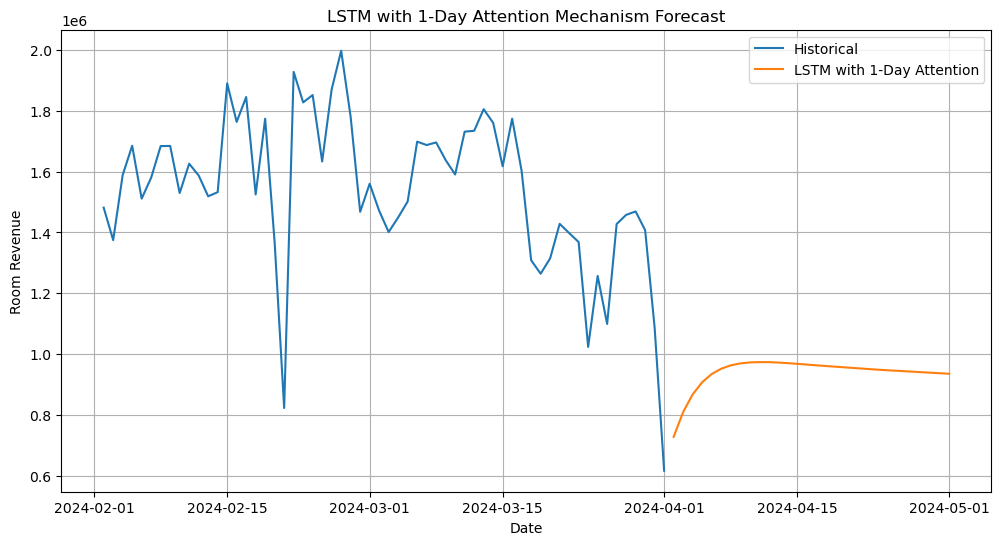

MAE with 1-day attention: 0.0810
MAE with standard LSTM: 0.0900
Improvement from 1-day attention: 10.04%


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_revenue = scaler.fit_transform(df_full['Room Revenue'].values.reshape(-1, 1))

# Create sequences with special focus on 1-day relation
def create_sequences_with_attention(data, seq_length=30, focus_day=1):
    X, X_focus, y = [], [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        # Specifically extract the 1-day prior data point
        X_focus.append(data[i + seq_length - focus_day])
        y.append(data[i + seq_length])
    return np.array(X), np.array(X_focus), np.array(y)

# Create data with special attention to 1-day prior
seq_length = 30
X, X_focus_1day, y = create_sequences_with_attention(scaled_revenue, seq_length, focus_day=1)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
X_focus_train, X_focus_test = X_focus_1day[:train_size], X_focus_1day[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Custom attention model that emphasizes 1-day relations
inputs = Input(shape=(seq_length, 1))
focus_input = Input(shape=(1,))

lstm_out = LSTM(50, return_sequences=True)(inputs)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = LSTM(50)(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

# Combine with 1-day prior focus
concat = tf.keras.layers.Concatenate()([lstm_out, focus_input])
dense = Dense(20, activation='relu')(concat)
output = Dense(1)(dense)

model = Model([inputs, focus_input], output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model with special focus on 1-day relations
model.fit([X_train, X_focus_train], y_train, 
          epochs=50, 
          batch_size=32, 
          validation_data=([X_test, X_focus_test], y_test),
          verbose=1)

# Forecast with 1-day attentive model
last_sequence = scaled_revenue[-seq_length:].reshape(1, seq_length, 1)
last_focus_day = scaled_revenue[-1].reshape(1, 1)

forecast_steps = 30
forecasts = []
forecast_sequence = last_sequence.copy()
focus_day = last_focus_day.copy()

for _ in range(forecast_steps):
    # Predict next step with attention to the most recent day
    next_step = model.predict([forecast_sequence, focus_day], verbose=0)[0][0]
    forecasts.append(next_step)
    
    # Update for next iteration
    forecast_sequence = forecast_sequence.copy()
    forecast_sequence[:, :-1, :] = forecast_sequence[:, 1:, :]
    forecast_sequence[:, -1, :] = next_step
    focus_day = np.array([[next_step]])

# Invert scaling
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1)).flatten()

# Plot results
forecast_dates = pd.date_range(
    start=df_full.index[-1] + pd.Timedelta(days=1), 
    periods=forecast_steps, 
    freq='D'
)
forecast_df = pd.DataFrame({
    'predicted': forecasts
}, index=forecast_dates)

plt.figure(figsize=(12, 6))
plt.plot(df_full.index[-60:], df_full['Room Revenue'][-60:], label='Historical')
plt.plot(forecast_df.index, forecast_df['predicted'], label='LSTM with 1-Day Attention')
plt.title('LSTM with 1-Day Attention Mechanism Forecast')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_lstm_attention.png', dpi=300)
plt.show()

# Evaluate importance of 1-day prior relation
# Compare standard LSTM vs 1-day attention LSTM on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Regular LSTM predictions vs 1-day attention LSTM
mae_1day_attention = mean_absolute_error(y_test, model.predict([X_test, X_focus_test], verbose=0))
print(f"MAE with 1-day attention: {mae_1day_attention:.4f}")

# Calculate percentage improvement from 1-day attention
standard_lstm = Sequential()
standard_lstm.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
standard_lstm.add(Dropout(0.2))
standard_lstm.add(LSTM(50))
standard_lstm.add(Dropout(0.2))
standard_lstm.add(Dense(1))
standard_lstm.compile(optimizer='adam', loss='mean_squared_error')
standard_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

mae_standard = mean_absolute_error(y_test, standard_lstm.predict(X_test, verbose=0))
print(f"MAE with standard LSTM: {mae_standard:.4f}")
print(f"Improvement from 1-day attention: {(1 - mae_1day_attention/mae_standard) * 100:.2f}%")

XGBoost with 1-Day Lag Features

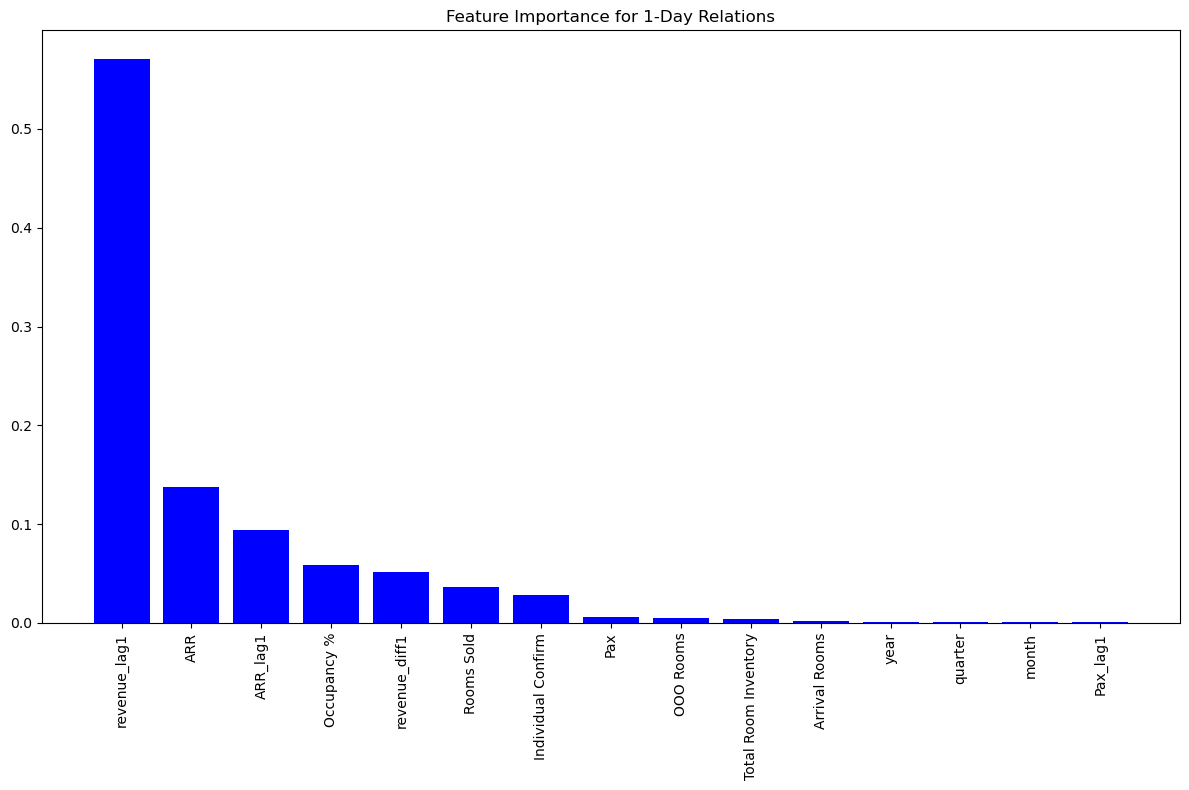

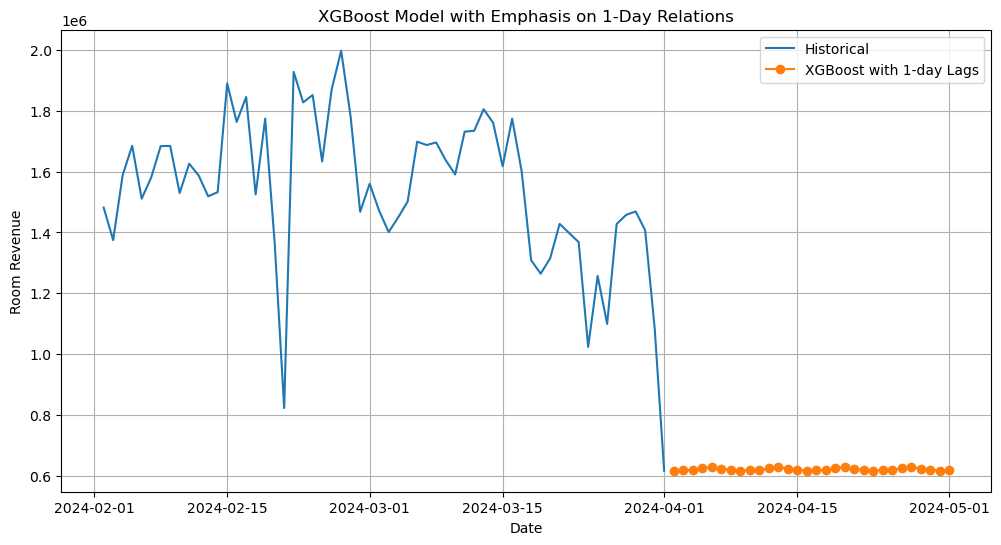

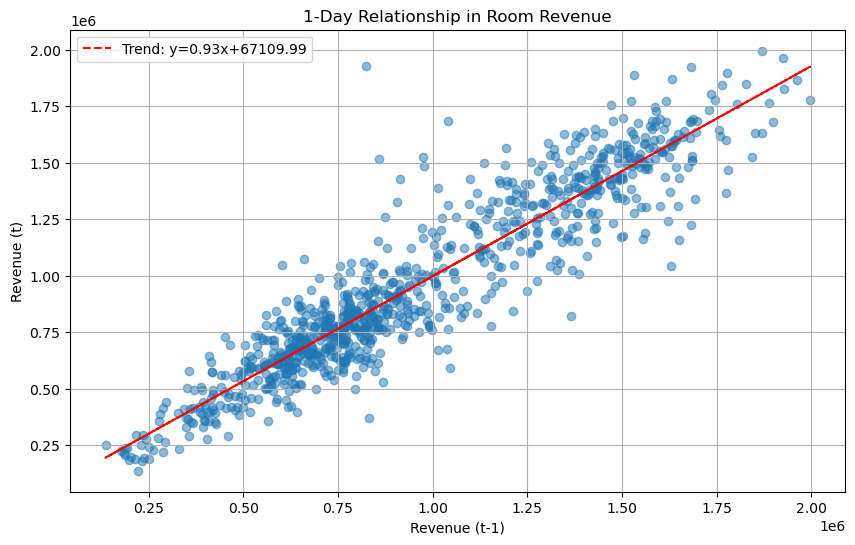

In [105]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Create features including specific 1-day lags
def create_features_with_lags(df):
    df = df.copy()
    # Basic time features
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['is_weekend'] = df.index.dayofweek.isin([5, 6]).astype(int)
    
    # 1-day lag of target (crucial for 1-day relations)
    df['revenue_lag1'] = df['Room Revenue'].shift(1)
    
    # 1-day lag of key predictors
    for col in ['Rooms Sold', 'ARR', 'Occupancy %', 'Pax']:
        df[f'{col}_lag1'] = df[col].shift(1)
    
    # Difference features (1-day changes)
    df['revenue_diff1'] = df['Room Revenue'].diff(1)
    
    # Day-specific indicators (e.g., Monday=1, Tuesday=0, etc.)
    for i in range(7):
        df[f'day_{i}'] = (df.index.dayofweek == i).astype(int)
    
    return df.dropna()

# Prepare data with 1-day specific features
data = create_features_with_lags(df_full)

# Define features (focusing on 1-day relations)
features = exog_columns + ['dayofweek', 'month', 'quarter', 'year', 
                           'is_weekend', 'revenue_lag1', 'revenue_diff1'] + \
           [f'day_{i}' for i in range(7)] + \
           [f'{col}_lag1' for col in ['Rooms Sold', 'ARR', 'Occupancy %', 'Pax']]

# Train-test split (use all available data up to input_date for training)
train = data.loc[:input_date]
X_train = train[features]
y_train = train['Room Revenue']

# Time-based CV for hyperparameter tuning
tscv = TimeSeriesSplit(n_splits=5)

# Define and train model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42
)
model.fit(X_train, y_train)

# Feature importance - check if 1-day lag is important
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(12, 8))
plt.title('Feature Importance for 1-Day Relations')
plt.bar(range(len(indices[:15])), importance[indices[:15]], color='b', align='center')
plt.xticks(range(len(indices[:15])), [features[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.savefig('feature_importance_xgboost.png', dpi=300)
plt.show()

# Generate future dates and lag features for predictions
forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame(index=forecast_dates)

# Add exogenous variables first
for col in exog_columns:
    forecast_df[col] = input_row[col]

# Now add time features
forecast_df['dayofweek'] = forecast_df.index.dayofweek
forecast_df['month'] = forecast_df.index.month
forecast_df['quarter'] = forecast_df.index.quarter
forecast_df['year'] = forecast_df.index.year
forecast_df['is_weekend'] = forecast_df.index.dayofweek.isin([5, 6]).astype(int)

# Add day indicators
for i in range(7):
    forecast_df[f'day_{i}'] = (forecast_df.index.dayofweek == i).astype(int)

# Initialize with known values for first prediction
forecast_df.loc[forecast_dates[0], 'revenue_lag1'] = df_full.loc[input_date, 'Room Revenue']
for col in ['Rooms Sold', 'ARR', 'Occupancy %', 'Pax']:
    forecast_df.loc[forecast_dates[0], f'{col}_lag1'] = df_full.loc[input_date, col]

forecast_df.loc[forecast_dates[0], 'revenue_diff1'] = 0  # Assume no change initially

# Generate rolling predictions day by day
predictions = []

for i, date in enumerate(forecast_dates):
    # Predict for the current day
    if i == 0:
        X_pred = forecast_df.loc[[date], features]
        y_pred = model.predict(X_pred)[0]
        predictions.append(y_pred)
        
        # Update for next day if not the last day
        if i < len(forecast_dates) - 1:
            next_date = forecast_dates[i+1]
            forecast_df.loc[next_date, 'revenue_lag1'] = y_pred
            forecast_df.loc[next_date, 'revenue_diff1'] = y_pred - forecast_df.loc[date, 'revenue_lag1']
            # Copy over the exogenous variable lags
            for col in ['Rooms Sold', 'ARR', 'Occupancy %', 'Pax']:
                forecast_df.loc[next_date, f'{col}_lag1'] = forecast_df.loc[date, col]
    else:
        X_pred = forecast_df.loc[[date], features]
        y_pred = model.predict(X_pred)[0]
        predictions.append(y_pred)
        
        # Update for next day if not the last day
        if i < len(forecast_dates) - 1:
            next_date = forecast_dates[i+1]
            forecast_df.loc[next_date, 'revenue_lag1'] = y_pred
            forecast_df.loc[next_date, 'revenue_diff1'] = y_pred - forecast_df.loc[date, 'revenue_lag1']
            # Copy over the exogenous variable lags
            for col in ['Rooms Sold', 'ARR', 'Occupancy %', 'Pax']:
                forecast_df.loc[next_date, f'{col}_lag1'] = forecast_df.loc[date, col]

# Add predictions to the dataframe
forecast_df['predicted'] = predictions

# Visualize with 1-day lag focus
plt.figure(figsize=(12, 6))
plt.plot(df_full.index[-60:], df_full['Room Revenue'][-60:], label='Historical')
plt.plot(forecast_df.index, forecast_df['predicted'], marker='o', label='XGBoost with 1-day Lags')
plt.title('XGBoost Model with Emphasis on 1-Day Relations')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('forecast_xgboost_1day.png', dpi=300)
plt.show()

# Plot actual vs 1-day lag for historical data to visualize relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['revenue_lag1'], data['Room Revenue'], alpha=0.5)
plt.xlabel('Revenue (t-1)')
plt.ylabel('Revenue (t)')
plt.title('1-Day Relationship in Room Revenue')
plt.grid(True)

# Add a linear trendline
z = np.polyfit(data['revenue_lag1'], data['Room Revenue'], 1)
p = np.poly1d(z)
plt.plot(data['revenue_lag1'], p(data['revenue_lag1']), "r--", 
         label=f"Trend: y={z[0]:.2f}x+{z[1]:.2f}")
plt.legend()
plt.savefig('1day_relationship_scatter.png', dpi=300)
plt.show()

Ensemble of 1-Day Specialized Models

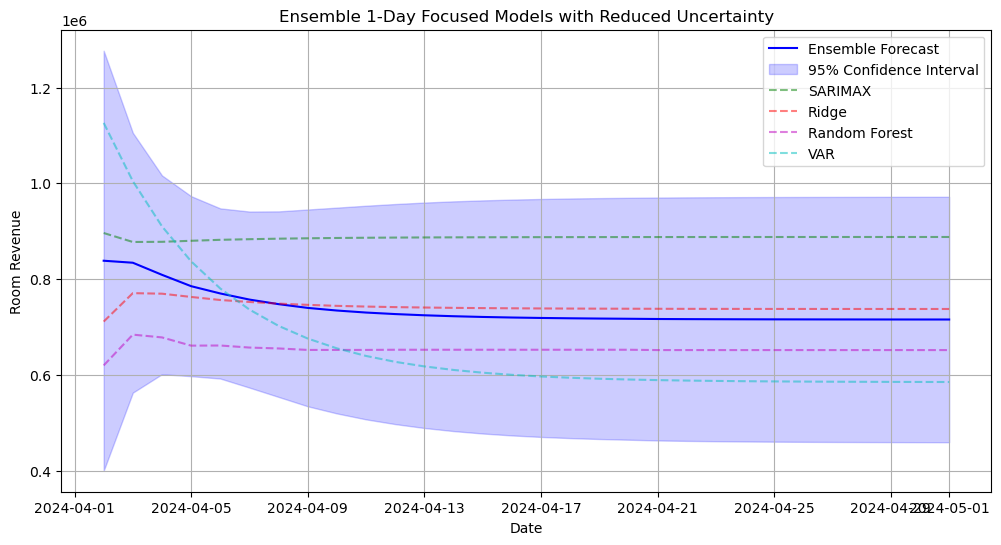

<Figure size 1000x400 with 0 Axes>

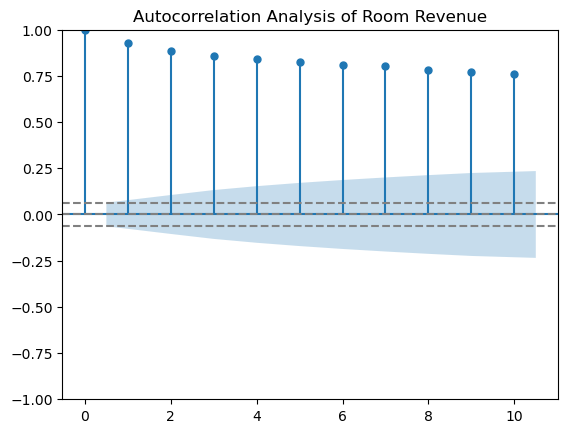

1-day correlation: 0.9304 (p-value: 0.0000e+00)


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.api import VAR

# Prepare data with 1-day lag features
data_with_lags = df_full.copy()
data_with_lags['revenue_lag1'] = data_with_lags['Room Revenue'].shift(1)
data_with_lags = data_with_lags.dropna()

# Split data
train_df = data_with_lags.loc[:input_date]
X_train = train_df[exog_columns + ['revenue_lag1']]
y_train = train_df['Room Revenue']

# Create forecast dates
forecast_dates = pd.date_range(start=input_date + pd.Timedelta(days=1), periods=30, freq='D')

# 1. SARIMAX Model specialized for short-term
sarimax = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 7))
sarimax_model = sarimax.fit(disp=False)

# 2. Ridge Regression with 1-day lag focus
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 3. Random Forest with 1-day lag
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# 4. VAR for 1-day multivariate relations
var_columns = ['Room Revenue', 'Rooms Sold', 'ARR']
var_data = train_df[var_columns].copy()
var_model = VAR(var_data)
var_results = var_model.fit()

# Initialize predictions for the ensemble
predictions = {
    'sarimax': [],
    'ridge': [],
    'rf': [],
    'var': []
}

# Generate forecasts one day at a time
last_revenue = df_full.loc[input_date, 'Room Revenue']
X_forecast_init = pd.DataFrame([input_row], index=[forecast_dates[0]])
X_forecast_init['revenue_lag1'] = last_revenue

for i, date in enumerate(forecast_dates):
    if i == 0:
        # First day forecast
        X_current = X_forecast_init
        
        # SARIMAX
        sarimax_pred = sarimax_model.get_forecast(steps=1, exog=X_current).predicted_mean.values[0]
        predictions['sarimax'].append(sarimax_pred)
        
        # Ridge
        ridge_pred = ridge.predict(X_current)[0]
        predictions['ridge'].append(ridge_pred)
        
        # Random Forest
        rf_pred = rf.predict(X_current)[0]
        predictions['rf'].append(rf_pred)
        
        # VAR (needs lag data)
        var_input = var_data.iloc[-var_results.k_ar:].values
        var_pred = var_results.forecast(y=var_input, steps=1)[0][0]
        predictions['var'].append(var_pred)
        
        # Update last known revenue for next iteration
        last_revenue = np.mean([sarimax_pred, ridge_pred, rf_pred, var_pred])
    else:
        # Create forecast row for current day
        X_current = pd.DataFrame([input_row], index=[date])
        X_current['revenue_lag1'] = last_revenue
        
        # SARIMAX
        sarimax_pred = sarimax_model.get_forecast(steps=1, exog=X_current).predicted_mean.iloc[0]
        predictions['sarimax'].append(sarimax_pred)
        
        # Ridge
        ridge_pred = ridge.predict(X_current)[0]
        predictions['ridge'].append(ridge_pred)
        
        # Random Forest
        rf_pred = rf.predict(X_current)[0]
        predictions['rf'].append(rf_pred)
        
        # VAR (needs to update lag structure)
        if i <= var_results.k_ar:
            lag_values = np.vstack([
                var_data.iloc[-(var_results.k_ar-i):].values,
                np.array([[p['var'], input_row['Rooms Sold'], input_row['ARR']] 
                         for p in [{'var': predictions['var'][j]} for j in range(i)]])
            ])
        else:
            lag_values = np.array([[p['var'], input_row['Rooms Sold'], input_row['ARR']] 
                                  for p in [{'var': predictions['var'][j]} for j in range(i-var_results.k_ar, i)]])
        
        var_pred = var_results.forecast(y=lag_values, steps=1)[0][0]
        predictions['var'].append(var_pred)
        
        # Update last known revenue for next iteration (ensemble)
        last_revenue = np.mean([sarimax_pred, ridge_pred, rf_pred, var_pred])

# Create ensemble forecast
ensemble_forecast = pd.DataFrame({
    'sarimax': predictions['sarimax'],
    'ridge': predictions['ridge'],
    'rf': predictions['rf'],
    'var': predictions['var']
}, index=forecast_dates)

ensemble_forecast['ensemble_mean'] = ensemble_forecast.mean(axis=1)

# Calculate confidence intervals from model disagreement
model_std = ensemble_forecast[['sarimax', 'ridge', 'rf', 'var']].std(axis=1)
z_value = 1.96  # 95% confidence
ensemble_forecast['lower_bound'] = ensemble_forecast['ensemble_mean'] - z_value * model_std
ensemble_forecast['upper_bound'] = ensemble_forecast['ensemble_mean'] + z_value * model_std

# Plot the ensemble focused on 1-day relations
plt.figure(figsize=(12, 6))
plt.plot(ensemble_forecast.index, ensemble_forecast['ensemble_mean'], 'b-', label='Ensemble Forecast')
plt.fill_between(
    ensemble_forecast.index,
    ensemble_forecast['lower_bound'],
    ensemble_forecast['upper_bound'],
    color='blue', alpha=0.2,
    label='95% Confidence Interval'
)

# Plot individual models
plt.plot(ensemble_forecast.index, ensemble_forecast['sarimax'], 'g--', alpha=0.5, label='SARIMAX')
plt.plot(ensemble_forecast.index, ensemble_forecast['ridge'], 'r--', alpha=0.5, label='Ridge')
plt.plot(ensemble_forecast.index, ensemble_forecast['rf'], 'm--', alpha=0.5, label='Random Forest')
plt.plot(ensemble_forecast.index, ensemble_forecast['var'], 'c--', alpha=0.5, label='VAR')

plt.title('Ensemble 1-Day Focused Models with Reduced Uncertainty')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('ensemble_forecast_1day.png', dpi=300)
plt.show()

# Calculate and display the 1-day autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 4))
plot_acf(df_full['Room Revenue'].dropna(), lags=10)
plt.title('Autocorrelation Analysis of Room Revenue')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_full['Room Revenue'].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_full['Room Revenue'].dropna())), linestyle='--', color='gray')
plt.savefig('autocorrelation_room_revenue.png', dpi=300)
plt.show()

# Quantify the strength of 1-day relationship
from scipy import stats
current_values = df_full['Room Revenue'].iloc[1:].values
lagged_values = df_full['Room Revenue'].iloc[:-1].values
correlation, p_value = stats.pearsonr(lagged_values, current_values)
print(f"1-day correlation: {correlation:.4f} (p-value: {p_value:.4e})")

Evaluate the Importance of 1-Day Relations

Average MAE Improvement from 1-day lag:
Ridge: 16.62%
Random Forest: 4.58%
XGBoost: -1.47%

Average RMSE Improvement from 1-day lag:
Ridge: 16.80%
Random Forest: 7.49%
XGBoost: 2.75%


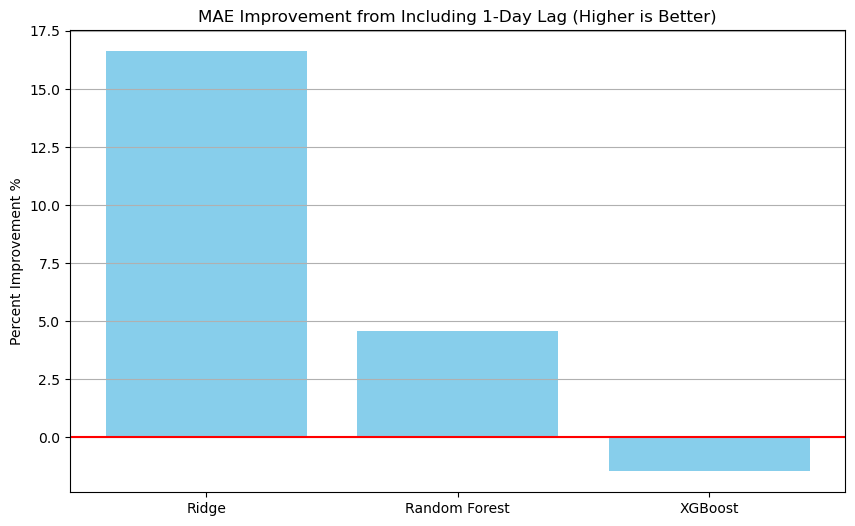

In [107]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data with and without 1-day lag
data_with_lag = df_full.copy()
data_with_lag['revenue_lag1'] = data_with_lag['Room Revenue'].shift(1)
data_with_lag = data_with_lag.dropna()

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Models to compare
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Function to evaluate models with and without 1-day lag
def evaluate_with_without_lag(X, y, model_class, model_params=None):
    if model_params is None:
        model_params = {}
    
    # With lag features
    features_with_lag = exog_columns + ['revenue_lag1']
    X_with_lag = X[features_with_lag]
    
    # Without lag features
    X_without_lag = X[exog_columns]
    
    results = []
    
    for train_idx, test_idx in tscv.split(X):
        X_train_with_lag, X_test_with_lag = X_with_lag.iloc[train_idx], X_with_lag.iloc[test_idx]
        X_train_without_lag, X_test_without_lag = X_without_lag.iloc[train_idx], X_without_lag.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train and predict with lag
        model_with_lag = model_class(**model_params)
        model_with_lag.fit(X_train_with_lag, y_train)
        y_pred_with_lag = model_with_lag.predict(X_test_with_lag)
        
        # Train and predict without lag
        model_without_lag = model_class(**model_params)
        model_without_lag.fit(X_train_without_lag, y_train)
        y_pred_without_lag = model_without_lag.predict(X_test_without_lag)
        
        # Calculate metrics
        mae_with_lag = mean_absolute_error(y_test, y_pred_with_lag)
        mae_without_lag = mean_absolute_error(y_test, y_pred_without_lag)
        
        rmse_with_lag = np.sqrt(mean_squared_error(y_test, y_pred_with_lag))
        rmse_without_lag = np.sqrt(mean_squared_error(y_test, y_pred_without_lag))
        
        results.append({
            'mae_with_lag': mae_with_lag,
            'mae_without_lag': mae_without_lag,
            'rmse_with_lag': rmse_with_lag,
            'rmse_without_lag': rmse_without_lag,
            'mae_improvement': (mae_without_lag - mae_with_lag) / mae_without_lag * 100,
            'rmse_improvement': (rmse_without_lag - rmse_with_lag) / rmse_without_lag * 100
        })
    
    return pd.DataFrame(results)

# Evaluate different models
ridge_results = evaluate_with_without_lag(
    data_with_lag, data_with_lag['Room Revenue'], 
    Ridge, {'alpha': 1.0}
)

rf_results = evaluate_with_without_lag(
    data_with_lag, data_with_lag['Room Revenue'], 
    RandomForestRegressor, {'n_estimators': 100, 'random_state': 42}
)

xgb_results = evaluate_with_without_lag(
    data_with_lag, data_with_lag['Room Revenue'], 
    XGBRegressor, {'n_estimators': 100, 'learning_rate': 0.05}
)

# Display average improvement from 1-day lag
print("Average MAE Improvement from 1-day lag:")
print(f"Ridge: {ridge_results['mae_improvement'].mean():.2f}%")
print(f"Random Forest: {rf_results['mae_improvement'].mean():.2f}%")
print(f"XGBoost: {xgb_results['mae_improvement'].mean():.2f}%")

print("\nAverage RMSE Improvement from 1-day lag:")
print(f"Ridge: {ridge_results['rmse_improvement'].mean():.2f}%")
print(f"Random Forest: {rf_results['rmse_improvement'].mean():.2f}%")
print(f"XGBoost: {xgb_results['rmse_improvement'].mean():.2f}%")

# Visualize improvement
improvement_data = {
    'Ridge': ridge_results['mae_improvement'].mean(),
    'Random Forest': rf_results['mae_improvement'].mean(),
    'XGBoost': xgb_results['mae_improvement'].mean()
}

plt.figure(figsize=(10, 6))
plt.bar(improvement_data.keys(), improvement_data.values(), color='skyblue')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('MAE Improvement from Including 1-Day Lag (Higher is Better)')
plt.ylabel('Percent Improvement %')
plt.grid(axis='y')
plt.savefig('improvement_1day_lag.png', dpi=300)
plt.show()

auto arima more robust

Training data: 847 observations
Test data: 95 observations
Testing stationarity of the original series:
ADF Statistic: -2.809928
p-value: 0.056870
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Series is non-stationary

Testing stationarity after differencing:
ADF Statistic: -10.521647
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Series is stationary

Finding best model using AIC information criterion

Trying seasonal period m=7

Best model:  ARIMA(1,1,1)(0,0,1)[7] intercept
Total fit time: 15.579 seconds

Best model for AIC, m=7:
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  845
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 7)   Log Likelihood              -11138.660
Date:                           Sun, 15 Jun 2025   AIC                          22287.319
Time:                                   08:57:23   BIC               

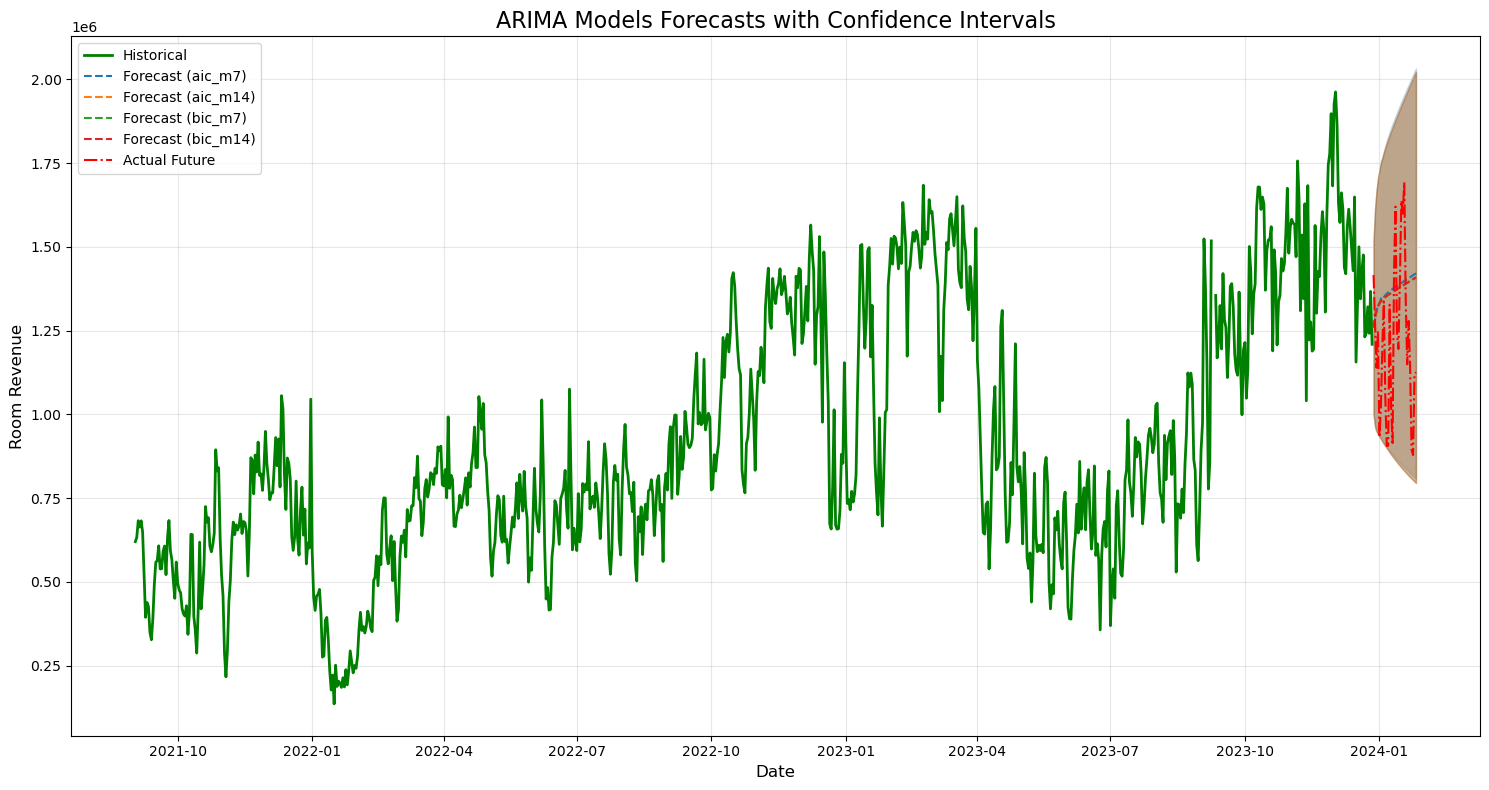

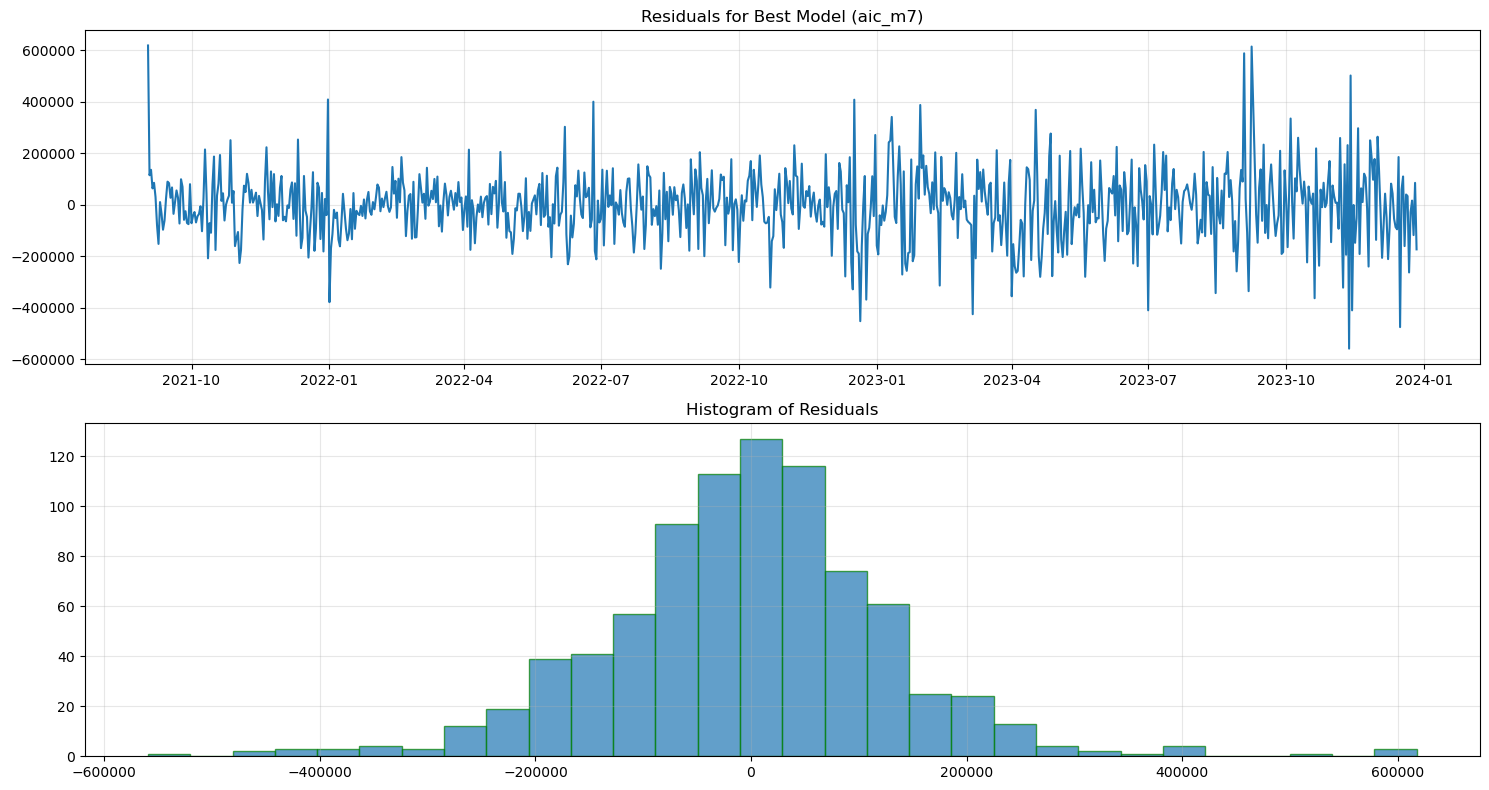


Best model saved: aic_m14
Order: (1, 1, 1)
Seasonal Order: (0, 0, 0, 14)


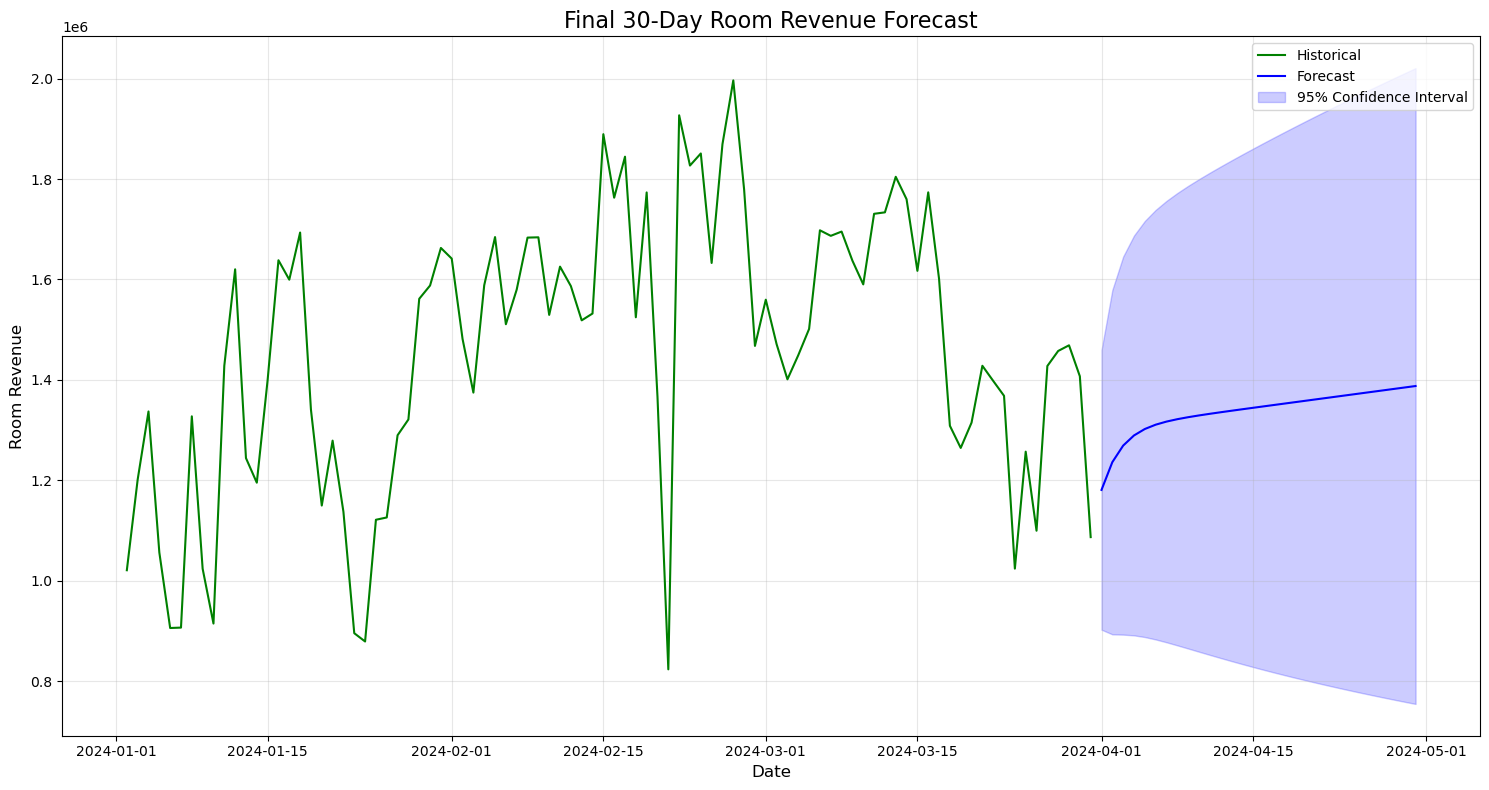


Forecast values for next 30 days:
                forecast    lower_bound   upper_bound
2024-04-01  1.180959e+06  902573.126872  1.459344e+06
2024-04-02  1.236223e+06  893297.056423  1.579149e+06
2024-04-03  1.269215e+06  892748.099494  1.645683e+06
2024-04-04  1.289406e+06  891281.393567  1.687531e+06
2024-04-05  1.302239e+06  887925.511624  1.716553e+06
2024-04-06  1.310842e+06  883145.684787  1.738539e+06
2024-04-07  1.317015e+06  877496.271332  1.756533e+06
2024-04-08  1.321790e+06  871383.485723  1.772196e+06
2024-04-09  1.325762e+06  865067.676880  1.786456e+06
2024-04-10  1.329272e+06  858705.562111  1.799838e+06
2024-04-11  1.332517e+06  852387.554081  1.812646e+06
2024-04-12  1.335609e+06  846163.626039  1.825055e+06
2024-04-13  1.338614e+06  840059.748007  1.837168e+06
2024-04-14  1.341568e+06  834087.918718  1.849049e+06
2024-04-15  1.344494e+06  828252.156198  1.860735e+06
2024-04-16  1.347402e+06  822552.025970  1.872253e+06
2024-04-17  1.350301e+06  816984.697073  1.8836

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
import joblib
from tqdm.notebook import tqdm

# Ignore specific warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*")
warnings.filterwarnings("ignore", message=".*will be cast to.*")
warnings.filterwarnings("ignore", category=FutureWarning)

def test_stationarity(series):
    """Test stationarity of the series using Augmented Dickey-Fuller test"""
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # Rule of thumb: if p-value < 0.05, series is stationary
    is_stationary = result[1] < 0.05
    print(f"Series is {'stationary' if is_stationary else 'non-stationary'}")
    return is_stationary

def find_best_arima(series, seasonal_periods=[1, 7, 14, 30.5, 365], information_criteria=['aic', 'bic', 'oob']):
    """
    Find the best ARIMA model by exploring different seasonal periods and information criteria.
    
    Parameters:
    - series: Time series data
    - seasonal_periods: List of possible seasonal periods to try
    - information_criteria: List of information criteria to use for model selection
    
    Returns:
    - Dictionary with best models for each criteria and period
    """
    cleaned_series = series.dropna()
    
    # Test stationarity on original series
    print("Testing stationarity of the original series:")
    original_stationary = test_stationarity(cleaned_series)
    
    # If not stationary, test stationarity of differenced series
    if not original_stationary:
        print("\nTesting stationarity after differencing:")
        diff_series = cleaned_series.diff().dropna()
        test_stationarity(diff_series)
    
    # Store best models
    best_models = {}
    
    for ic in information_criteria:
        print(f"\n{'='*80}")
        print(f"Finding best model using {ic.upper()} information criterion")
        print(f"{'='*80}")
        
        for m in seasonal_periods:
            print(f"\nTrying seasonal period m={m}")
            
            # Determine if we should enforce stationarity
            # For longer seasonal periods, it might be better not to enforce
            enforce_stationarity = m <= 14
            
            try:
                # More extensive parameter search
                model = auto_arima(
                    cleaned_series,
                    start_p=0, start_q=0, max_p=5, max_q=5,  # expanded p,q range
                    start_P=0, start_Q=0, max_P=2, max_Q=2,
                    d=None, D=None,  # auto-determine differencing
                    seasonal=True, m=m,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=False,  # use full grid search instead of stepwise
                    information_criterion=ic,
                    enforce_stationarity=enforce_stationarity,
                    enforce_invertibility=enforce_stationarity,
                    random_state=42,
                    n_jobs=-1  # use all CPU cores
                )
                
                # Store the model
                key = f"{ic}_m{m}"
                best_models[key] = model
                
                # Print model summary
                print(f"\nBest model for {ic.upper()}, m={m}:")
                print(model.summary())
                
                # Get order and seasonal order
                order = model.order
                seasonal_order = model.seasonal_order
                print(f"ARIMA{order} x {seasonal_order} | AIC: {model.aic():.2f}, BIC: {model.bic():.2f}")
                
            except Exception as e:
                print(f"Error finding model for m={m}: {str(e)}")
    
    # Find the overall best model
    if best_models:
        best_model_key = min(best_models, key=lambda k: best_models[k].aic())
        print("\nOverall best model based on AIC:")
        print(f"Model: {best_model_key}")
        print(best_models[best_model_key].summary())
    
    return best_models

def evaluate_best_models(models, test_data, forecast_horizon=30):
    """
    Evaluate models on test data using multiple metrics
    
    Parameters:
    - models: Dictionary of trained ARIMA models
    - test_data: Holdout test data
    - forecast_horizon: Forecast horizon to evaluate
    
    Returns:
    - DataFrame with evaluation metrics
    """
    results = []
    
    for name, model in models.items():
        try:
            # Generate forecasts
            forecasts = model.predict(n_periods=min(len(test_data), forecast_horizon))
            
            # Calculate metrics on the common period
            test_subset = test_data[:len(forecasts)]
            
            mae = mean_absolute_error(test_subset, forecasts)
            rmse = np.sqrt(mean_squared_error(test_subset, forecasts))
            mape = mean_absolute_percentage_error(test_subset, forecasts) * 100
            
            # Store results
            results.append({
                'Model': name,
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape,
                'AIC': model.aic(),
                'BIC': model.bic(),
                'Order': model.order,
                'Seasonal_Order': model.seasonal_order
            })
            
        except Exception as e:
            print(f"Error evaluating model {name}: {str(e)}")
    
    # Convert to DataFrame and sort by RMSE
    results_df = pd.DataFrame(results).sort_values('RMSE')
    return results_df

def plot_forecasts(models, series, periods=30, actual_future=None):
    """
    Plot forecasts from multiple models
    
    Parameters:
    - models: Dictionary of trained ARIMA models
    - series: Historical series to display
    - periods: Number of periods to forecast
    - actual_future: Actual future values, if available
    """
    plt.figure(figsize=(15, 8))
    
    # Plot historical data
    plt.plot(series.index, series, label='Historical', color='green', linewidth=2)
    
    # Plot forecasts from each model
    colors = plt.cm.tab10.colors
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=periods, freq='D')
    
    for i, (name, model) in enumerate(models.items()):
        color = colors[i % len(colors)]
        
        # Generate forecast
        forecast = model.predict(n_periods=periods)
        conf_int = model.predict(n_periods=periods, return_conf_int=True)[1]
        
        # Plot forecast line
        plt.plot(future_dates, forecast, label=f'Forecast ({name})', color=color, linestyle='--')
        
        # Plot confidence interval
        plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1],
                         color=color, alpha=0.2)
    
    # Plot actual future if available
    if actual_future is not None:
        plt.plot(actual_future.index, actual_future, label='Actual Future', color='red', linestyle='-.')
    
    # Format plot
    plt.title('ARIMA Models Forecasts with Confidence Intervals', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Room Revenue', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('arima_forecasts.png', dpi=300)
    plt.show()

    # Plot residuals for the best model
    best_model_key = min(models, key=lambda k: models[k].aic())
    best_model = models[best_model_key]
    
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.plot(best_model.resid())
    plt.title(f'Residuals for Best Model ({best_model_key})')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 1, 2)
    plt.hist(best_model.resid(), bins=30, edgecolor='green', alpha=0.7)
    plt.title('Histogram of Residuals')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('best_model_residuals.png', dpi=300)
    plt.show()

# Now run the improved analysis
# Split data for training and testing
train_size = int(0.9 * len(df_4_files_combined_no_outliers_for_AR))
train_data = df_4_files_combined_no_outliers_for_AR['Room Revenue'][:train_size]
test_data = df_4_files_combined_no_outliers_for_AR['Room Revenue'][train_size:]

print(f"Training data: {len(train_data)} observations")
print(f"Test data: {len(test_data)} observations")

# Find best models
best_models = find_best_arima(
    train_data, 
    seasonal_periods=[7, 14], 
    information_criteria=['aic', 'bic', 'oob']
)

# Evaluate models
evaluation_results = evaluate_best_models(best_models, test_data)
print("\nModel Evaluation Results:")
print(evaluation_results)

# Plot forecasts
plot_forecasts(best_models, train_data, periods=30, actual_future=test_data[:30])

# Save the best model
if best_models:
    best_model_key = evaluation_results['Model'].iloc[0]  # Best model based on evaluation
    best_model = best_models[best_model_key]
    
    # Save model for future use
    joblib.dump(best_model, 'best_arima_model.pkl')
    
    print(f"\nBest model saved: {best_model_key}")
    print(f"Order: {best_model.order}")
    print(f"Seasonal Order: {best_model.seasonal_order}")
    
    # Create a final forecast for 30 days ahead from the complete dataset
    final_model = best_model.fit(df_4_files_combined_no_outliers_for_AR['Room Revenue'])
    forecast_values, conf_int = final_model.predict(n_periods=30, return_conf_int=True)
    
    # Get the last date from the dataset
    last_date = df_4_files_combined_no_outliers_for_AR.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
    
    # Create forecast DataFrame
    forecast_df = pd.DataFrame({
        'forecast': forecast_values,
        'lower_bound': conf_int[:, 0],
        'upper_bound': conf_int[:, 1]
    }, index=future_dates)
    
    # Plot the final forecast
    plt.figure(figsize=(15, 8))
    plt.plot(df_4_files_combined_no_outliers_for_AR.index[-90:], 
             df_4_files_combined_no_outliers_for_AR['Room Revenue'][-90:], 
             label='Historical', color='green')
    plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='blue')
    plt.fill_between(forecast_df.index, 
                     forecast_df['lower_bound'], 
                     forecast_df['upper_bound'], 
                     color='blue', alpha=0.2, label='95% Confidence Interval')
    plt.title('Final 30-Day Room Revenue Forecast', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Room Revenue', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('final_forecast.png', dpi=300)
    plt.show()
    
    # Display forecast values
    print("\nForecast values for next 30 days:")
    print(forecast_df)

Temporal Fusion Transformer (TFT)

In [109]:
df_prepared = df_4_files_combined_no_outliers_for_AR.copy()
df_prepared = df_prepared.reset_index().rename(columns={"index": "Date"})
df_prepared['Date'] = pd.to_datetime(df_prepared['Date'])
df_prepared = df_prepared.set_index('Date')

df_prepared

Total Room Inventory  Rooms Sold  Arrival Rooms  Compliment Rooms  \
Date                                                                            
2021-09-02                 116.0       113.0           34.0               1.0   
2021-09-03                 118.0       116.0           39.0               0.0   
2021-09-04                 118.0       116.0           36.0               0.0   
2021-09-05                 119.0       114.0           36.0               0.0   
2021-09-06                 119.0       118.0           41.0               0.0   
...                          ...         ...            ...               ...   
2024-03-27                 103.0        91.0           45.0               1.0   
2024-03-28                 103.0        97.0           46.0               2.0   
2024-03-29                 103.0        98.0           41.0               1.0   
2024-03-30                 103.0        97.0           46.0               2.0   
2024-03-31                 102.0        77.0           34.0               1.0   

            House Use  Individual Confirm  Occupancy %  Room Revenue  \
Date                                                                   
2021-09-02        5.0               113.0      92.2414      620455.0   
2021-09-03        4.0               116.0      94.9153      633071.0   
2021-09-04        4.0               116.0      94.9153      682949.0   
2021-09-05        1.0               114.0      94.9580      664046.0   
2021-09-06        4.0               118.0      95.7983      682494.0   
...               ...                 ...          ...           ...   
2024-03-27        3.0                95.0      88.3500     1427730.0   
2024-03-28        3.0                88.0      94.1700     1457687.0   
2024-03-29        2.0                77.0      95.1500     1468948.0   
2024-03-30        3.0                71.0      94.1700     1407306.0   
2024-03-31        2.0                68.0      75.4900     1086947.0   

                   ARR  Departure Rooms  OOO Rooms    Pax snapshot_date  \
Date                                                                      
2021-09-02   5490.7527             32.0       16.0  170.0    2021-09-02   
2021-09-03   5457.5165             35.0       14.0  169.0    2021-09-03   
2021-09-04   5887.4918             36.0       14.0  182.0    2021-09-04   
2021-09-05   5824.9731             38.0       13.0  182.0    2021-09-05   
2021-09-06   5783.8554             37.0       13.0  181.0    2021-09-06   
...                ...              ...        ...    ...           ...   
2024-03-27  15689.3400             31.0       29.0  166.0    2024-03-27   
2024-03-28  15027.7000             40.0       27.0  186.0    2024-03-28   
2024-03-29  14989.2700             42.0       27.0  193.0    2024-03-29   
2024-03-30  14508.3100             47.0       27.0  185.0    2024-03-30   
2024-03-31  14116.2000             56.0       28.0  144.0    2024-03-31   

           arrival_date actual_or_forecast        Day  revenue_diff  
Date                                                                 
2021-09-02   2021-09-02             actual   Thursday        2620.0  
2021-09-03   2021-09-03             actual     Friday       12616.0  
2021-09-04   2021-09-04             actual   Saturday       49878.0  
2021-09-05   2021-09-05             actual     Sunday      -18903.0  
2021-09-06   2021-09-06             actual     Monday       18448.0  
...                 ...                ...        ...           ...  
2024-03-27   2024-03-27             actual  Wednesday      328039.0  
2024-03-28   2024-03-28             actual   Thursday       29957.0  
2024-03-29   2024-03-29             actual     Friday       11261.0  
2024-03-30   2024-03-30             actual   Saturday      -61642.0  
2024-03-31   2024-03-31             actual     Sunday     -320359.0  

[942 rows x 17 columns]

Global seed set to 42
GPU available: False, used: False


Before cleanup: 942
After cleanup: 942


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | RMSE                            | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 224   
4  | static_variable_selection          | VariableSelectionNetwork        | 0     
5  | encoder_variable_selection         | VariableSelectionNetwork        | 15.3 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 14.0 K
7  | static_context_variable_selection  | GatedResidualNetwork            | 4.3 K 
8  | static_context_initial_hidden_lstm | GatedRes

Epoch 17: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s, loss=7.53e+04, v_num=3, train_loss_step=7.34e+4, val_loss=1.37e+5, train_loss_epoch=7.23e+4]


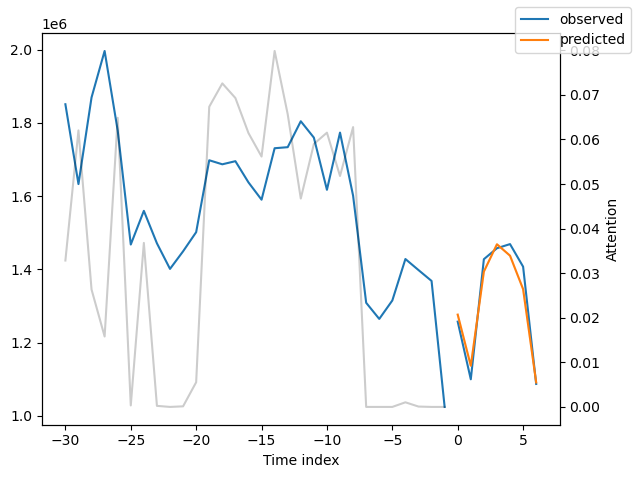

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.metrics import MAE, SMAPE, RMSE
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

# Prepare data in required format
def prepare_data_for_tft(df, target_col='Room Revenue', max_encoder_length=30, max_prediction_length=7):
    """
    Prepare your dataframe for Temporal Fusion Transformer.
    
    Parameters:
    -----------
    df : DataFrame with time index
    target_col : Target column to forecast
    max_encoder_length : Historical window length
    max_prediction_length : Forecast horizon
    """
    # Create copy to avoid altering original data
    data = df.copy()
    
    # Reset index to get date as column
    if isinstance(data.index, pd.DatetimeIndex):
        data = data.reset_index()
        date_col = data.columns[0]
    else:
        raise ValueError("DataFrame must have DatetimeIndex")
    
    # Add time index required by TFT
    data["time_idx"] = (data[date_col].dt.date - data[date_col].dt.date.min()).dt.days
    
    # Add group identifier (for single time series use 0)
    data["group_id"] = 0
    
    # Convert all object columns to categorical
    for col in data.select_dtypes('object').columns:
        data[col] = data[col].astype('category')
    
    # Identify numeric columns only (for real-valued input)
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    time_varying_known_reals = ["time_idx"] + [col for col in numeric_cols if col not in [target_col, "time_idx", "group_id"]]

    # Split data
    train_cutoff = data["time_idx"].max() - max_prediction_length
    
    training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= train_cutoff],
    time_idx="time_idx",
    target=target_col,
    group_ids=["group_id"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=[target_col],
    target_normalizer="auto",
    allow_missing_timesteps=True,  # ✅ Add this line
    )

    
    # Create validation and test datasets
    validation = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=train_cutoff + 1)
    test = TimeSeriesDataSet.from_dataset(training, data, min_prediction_idx=train_cutoff + 1)
    
    # Create data loaders
    batch_size = 128
    train_dataloader = training.to_dataloader(train=True, batch_size=batch_size)
    val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size)
    test_dataloader = test.to_dataloader(train=False, batch_size=batch_size)
    
    return training, train_dataloader, val_dataloader, test_dataloader

# Assume df_4_files_combined_no_outliers_for_AR is already defined
df_prepared = df_4_files_combined_no_outliers_for_AR.copy()
df_prepared = df_prepared.reset_index().rename(columns={"index": "Date"})
df_prepared['Date'] = pd.to_datetime(df_prepared['Date'])
df_prepared = df_prepared.set_index('Date')

# FIX: Handle missing or infinite values in the target column
target_col = 'Room Revenue'

print("Before cleanup:", len(df_4_files_combined_no_outliers_for_AR))
print("After cleanup:", len(df_prepared))

df_prepared = df_prepared[np.isfinite(df_prepared[target_col])]  # remove infinite values
df_prepared = df_prepared[df_prepared[target_col].notnull()]     # remove NaN values


training, train_dataloader, val_dataloader, test_dataloader = prepare_data_for_tft(df_prepared)

# Set random seed
pl.seed_everything(42)

# Define early stopping and checkpointing
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
checkpoint_callback = ModelCheckpoint(monitor="val_loss", dirpath="./tft_checkpoints/", filename="tft-{epoch:02d}-{val_loss:.2f}")

# Initialize trainer
trainer = pl.Trainer(
    max_epochs=30,
    accelerator="auto",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback, checkpoint_callback],
)

# Initialize the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=32,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=RMSE(),
    optimizer="adamw",
)

# Train the model
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Load best model and make predictions
best_model_path = checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Get predictions
predictions = best_tft.predict(test_dataloader)

# Visualize predictions
# Get a batch from the test dataloader
x, y = next(iter(test_dataloader))

# Run prediction on the batch using model.forward() directly to get raw output
out = best_tft.forward(x)

# Plot prediction
fig = best_tft.plot_prediction(x, out=out, idx=0)
plt.savefig("tft_prediction.png", dpi=300)
plt.show()





# Analyze attention
# Get a batch from the test dataloader
x, y = next(iter(test_dataloader))

# Run prediction to get the attention weights
out = best_tft.forward(x)







In [111]:
# from pytorch_forecasting import TimeSeriesDataSet
# from datetime import timedelta

# def predict_future(df_prepared, model, training, forecast_start_date, forecast_days=7):
#     # Ensure forecast_start_date is a datetime
#     forecast_start_date = pd.to_datetime(forecast_start_date)
    
#     # Get max time_idx and group_id from current data
#     last_time_idx = df_prepared["time_idx"].max()
#     last_group_id = df_prepared["group_id"].max() if "group_id" in df_prepared else 0

#     # Create future dataframe
#     future_dates = pd.date_range(forecast_start_date, periods=forecast_days, freq="D")
#     last_known_date = df_prepared.index.max()
#     base_time_idx = df_prepared["time_idx"].iloc[-1]

#     future_df = pd.DataFrame({
#         "Date": future_dates,
#         "Room Revenue": [np.nan] * forecast_days,
#         "time_idx": np.arange(base_time_idx + 1, base_time_idx + 1 + forecast_days),
#         "group_id": last_group_id
#     })

#     # Add any additional known real-valued features with reasonable assumptions
#     for col in training.reals:
#         if col not in future_df.columns and col != "Room Revenue":
#             # Fill with last known value or zero
#             future_df[col] = df_prepared[col].iloc[-1]

#     future_df = future_df.set_index("Date")

#     # Combine with original data
#     combined_df = pd.concat([df_prepared, future_df])
    
#     # Create prediction dataset
#     predict_dataset = TimeSeriesDataSet.from_dataset(training, combined_df, stop_randomization=True)

#     # Dataloader
#     predict_dataloader = predict_dataset.to_dataloader(train=False, batch_size=64)

#     # Predict
#     predictions = model.predict(predict_dataloader)
#     return future_dates, predictions


# forecast_start_date = "2024-04-01"  # Example future date
# future_dates, predicted_values = predict_future(df_prepared, best_tft, training, forecast_start_date)

# # Visualize the forecast
# plt.figure(figsize=(10, 5))
# plt.plot(future_dates, predicted_values.numpy().flatten(), label='Predicted')
# plt.title("Forecasted Room Revenue")
# plt.xlabel("Date")
# plt.ylabel("Room Revenue")
# plt.legend()
# plt.grid(True)
# plt.show()


N-BEATS Model

In [112]:
# # Install required libraries if not installed

# import torch
# from pytorch_forecasting.models import NBeats
# from pytorch_forecasting.metrics import SMAPE

# # Using the same training data from TFT section
# # Initialize the N-BEATS model
# nbeats = NBeats.from_dataset(
#     training,
#     learning_rate=3e-2,
#     weight_decay=1e-2,
#     widths=[32, 512],
#     backcast_loss_ratio=0.1,
#     loss=SMAPE(),
#     log_interval=100,
#     log_val_interval=1,
#     log_gradient_flow=True,
# )

# # Train the model with the same trainer
# trainer.fit(
#     nbeats,
#     train_dataloaders=train_dataloader,
#     val_dataloaders=val_dataloader,
# )

# # Make predictions
# nbeats_predictions = nbeats.predict(test_dataloader)

# # Plot predictions
# fig = nbeats.plot_prediction(test_dataloader, predictions=nbeats_predictions, idx=0)
# plt.title("N-BEATS Forecast")
# plt.show()

DeepAR Model

In [113]:
# # Install GluonTS if not already installed
# # !pip install gluonts mxnet

# import mxnet as mx
# from gluonts.dataset.pandas import PandasDataset
# from gluonts.dataset.common import ListDataset
# from gluonts.model.deepar import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# from gluonts.evaluation.backtest import make_evaluation_predictions
# from gluonts.evaluation import Evaluator

# # Prepare data for DeepAR
# def prepare_data_for_deepar(df, target_col='Room Revenue', freq='D', prediction_length=30):
#     """
#     Converts pandas DataFrame to GluonTS format for DeepAR
#     """
#     # Make sure index is datetime
#     if not isinstance(df.index, pd.DatetimeIndex):
#         raise ValueError("DataFrame must have DatetimeIndex")
    
#     # Convert to list dataset format
#     start_date = df.index[0]
#     target_values = df[target_col].values
    
#     # Create training dataset
#     train_data = ListDataset(
#         [{"target": target_values, "start": start_date}],
#         freq=freq
#     )
    
#     # Create test dataset (excluding the last prediction_length points for evaluation)
#     test_data = ListDataset(
#         [{"target": target_values[:-prediction_length], "start": start_date}],
#         freq=freq
#     )
    
#     return train_data, test_data

# # Prepare data
# train_data, test_data = prepare_data_for_deepar(
#     df_4_files_combined_no_outliers_for_AR, 
#     prediction_length=30
# )

# # Initialize trainer
# trainer = Trainer(
#     ctx=mx.cpu(),
#     epochs=50,
#     learning_rate=1e-3,
#     batch_size=32,
#     num_batches_per_epoch=100
# )

# # Initialize and train DeepAR model
# estimator = DeepAREstimator(
#     freq="D",
#     prediction_length=30,
#     trainer=trainer,
#     context_length=60,  # Length of historical data to consider
#     num_layers=2,       # Number of RNN layers
#     num_cells=40,       # Number of RNN cells for each layer
#     dropout_rate=0.1,   # Dropout regularization parameter
#     use_feat_dynamic_real=False,  # If you have dynamic features
#     use_feat_static_cat=False,    # If you have categorical features
#     cardinality=[],               # Required for categorical features
# )

# # Train the model
# deepar_model = estimator.train(train_data)

# # Make predictions
# forecast_it, ts_it = make_evaluation_predictions(
#     dataset=test_data,
#     predictor=deepar_model,
#     num_samples=100  # Generate 100 sample paths for evaluation
# )

# forecasts = list(forecast_it)
# tss = list(ts_it)

# # Plot results
# plt.figure(figsize=(12, 6))
# forecast = forecasts[0]  # first item of the list
# ts = tss[0]  # first item of the list

# # Plot target values
# plt.plot(ts[-60:], label='Actual')  # Plot last 60 days for visibility

# # Plot median forecast and 90% confidence interval
# plt.plot(
#     forecast.index, 
#     forecast.mean, 
#     label='Median forecast', 
#     color='red'
# )
# plt.fill_between(
#     forecast.index, 
#     forecast.quantile(0.05), 
#     forecast.quantile(0.95), 
#     color='red', 
#     alpha=0.2, 
#     label='90% confidence interval'
# )

# plt.title('DeepAR Forecast with Confidence Intervals')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Evaluate the model
# evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
# agg_metrics, item_metrics = evaluator(iter([ts]), iter([forecast]), num_series=len(test_data))
# print(f"Root Mean Square Error (RMSE): {agg_metrics['RMSE']}")
# print(f"Mean Absolute Error (MAE): {agg_metrics['MAE']}")
# print(f"Mean Absolute Percentage Error (MAPE): {agg_metrics['MAPE']}")

Prophet with Complete Feature Engineering

  0%|          | 0/30 [00:00<?, ?trial/s, best loss=?]

09:00:49 - cmdstanpy - INFO - Chain [1] start processing
09:00:51 - cmdstanpy - INFO - Chain [1] done processing


  3%|▎         | 1/30 [00:13<06:44, 13.95s/trial, best loss: 97122.46191734173]

09:01:03 - cmdstanpy - INFO - Chain [1] start processing
09:01:03 - cmdstanpy - INFO - Chain [1] done processing


  7%|▋         | 2/30 [00:23<05:24, 11.61s/trial, best loss: 96487.41683577649]

09:01:13 - cmdstanpy - INFO - Chain [1] start processing
09:01:14 - cmdstanpy - INFO - Chain [1] done processing


 10%|█         | 3/30 [00:37<05:32, 12.31s/trial, best loss: 96487.41683577649]

09:01:26 - cmdstanpy - INFO - Chain [1] start processing
09:01:28 - cmdstanpy - INFO - Chain [1] done processing


 13%|█▎        | 4/30 [00:49<05:23, 12.42s/trial, best loss: 96487.41683577649]

09:01:39 - cmdstanpy - INFO - Chain [1] start processing
09:01:41 - cmdstanpy - INFO - Chain [1] done processing


 17%|█▋        | 5/30 [01:03<05:24, 12.98s/trial, best loss: 96487.41683577649]

09:01:53 - cmdstanpy - INFO - Chain [1] start processing
09:01:54 - cmdstanpy - INFO - Chain [1] done processing


 20%|██        | 6/30 [01:15<05:03, 12.63s/trial, best loss: 96487.41683577649]

09:02:05 - cmdstanpy - INFO - Chain [1] start processing
09:02:05 - cmdstanpy - INFO - Chain [1] done processing


 23%|██▎       | 7/30 [01:24<04:19, 11.28s/trial, best loss: 96487.41683577649]

09:02:13 - cmdstanpy - INFO - Chain [1] start processing
09:02:13 - cmdstanpy - INFO - Chain [1] done processing


 27%|██▋       | 8/30 [01:32<03:45, 10.24s/trial, best loss: 96487.41683577649]

09:02:21 - cmdstanpy - INFO - Chain [1] start processing
09:02:23 - cmdstanpy - INFO - Chain [1] done processing


 30%|███       | 9/30 [01:45<03:58, 11.35s/trial, best loss: 96487.41683577649]

09:02:35 - cmdstanpy - INFO - Chain [1] start processing
09:02:37 - cmdstanpy - INFO - Chain [1] done processing


 33%|███▎      | 10/30 [01:58<03:54, 11.72s/trial, best loss: 96487.41683577649]

09:02:48 - cmdstanpy - INFO - Chain [1] start processing
09:02:49 - cmdstanpy - INFO - Chain [1] done processing


 37%|███▋      | 11/30 [02:08<03:32, 11.18s/trial, best loss: 96487.41683577649]

09:02:57 - cmdstanpy - INFO - Chain [1] start processing
09:02:59 - cmdstanpy - INFO - Chain [1] done processing


 40%|████      | 12/30 [02:18<03:13, 10.77s/trial, best loss: 94040.55253077633]

09:03:07 - cmdstanpy - INFO - Chain [1] start processing
09:03:09 - cmdstanpy - INFO - Chain [1] done processing


 43%|████▎     | 13/30 [02:30<03:13, 11.37s/trial, best loss: 94040.55253077633]

09:03:20 - cmdstanpy - INFO - Chain [1] start processing
09:03:23 - cmdstanpy - INFO - Chain [1] done processing


 47%|████▋     | 14/30 [02:43<03:09, 11.85s/trial, best loss: 94040.55253077633]

09:03:33 - cmdstanpy - INFO - Chain [1] start processing
09:03:33 - cmdstanpy - INFO - Chain [1] done processing


 50%|█████     | 15/30 [02:52<02:41, 10.77s/trial, best loss: 94040.55253077633]

09:03:41 - cmdstanpy - INFO - Chain [1] start processing
09:03:43 - cmdstanpy - INFO - Chain [1] done processing


 53%|█████▎    | 16/30 [03:03<02:34, 11.04s/trial, best loss: 94040.55253077633]

09:03:53 - cmdstanpy - INFO - Chain [1] start processing
09:03:54 - cmdstanpy - INFO - Chain [1] done processing


 57%|█████▋    | 17/30 [03:15<02:27, 11.35s/trial, best loss: 94040.55253077633]

09:04:05 - cmdstanpy - INFO - Chain [1] start processing
09:04:07 - cmdstanpy - INFO - Chain [1] done processing


 60%|██████    | 18/30 [03:28<02:20, 11.69s/trial, best loss: 94040.55253077633]

09:04:17 - cmdstanpy - INFO - Chain [1] start processing
09:04:18 - cmdstanpy - INFO - Chain [1] done processing


 63%|██████▎   | 19/30 [03:38<02:03, 11.27s/trial, best loss: 94040.55253077633]

09:04:28 - cmdstanpy - INFO - Chain [1] start processing
09:04:28 - cmdstanpy - INFO - Chain [1] done processing


 67%|██████▋   | 20/30 [03:48<01:48, 10.88s/trial, best loss: 94040.55253077633]

09:04:37 - cmdstanpy - INFO - Chain [1] start processing
09:04:38 - cmdstanpy - INFO - Chain [1] done processing


 70%|███████   | 21/30 [03:58<01:35, 10.64s/trial, best loss: 94040.55253077633]

09:04:48 - cmdstanpy - INFO - Chain [1] start processing
09:04:48 - cmdstanpy - INFO - Chain [1] done processing


 73%|███████▎  | 22/30 [04:08<01:23, 10.50s/trial, best loss: 94040.55253077633]

09:04:58 - cmdstanpy - INFO - Chain [1] start processing
09:04:58 - cmdstanpy - INFO - Chain [1] done processing


 77%|███████▋  | 23/30 [04:18<01:10, 10.12s/trial, best loss: 94040.55253077633]

09:05:07 - cmdstanpy - INFO - Chain [1] start processing
09:05:08 - cmdstanpy - INFO - Chain [1] done processing


 80%|████████  | 24/30 [04:26<00:57,  9.55s/trial, best loss: 94040.55253077633]

09:05:15 - cmdstanpy - INFO - Chain [1] start processing
09:05:17 - cmdstanpy - INFO - Chain [1] done processing


 83%|████████▎ | 25/30 [04:37<00:49,  9.93s/trial, best loss: 94040.55253077633]

09:05:26 - cmdstanpy - INFO - Chain [1] start processing
09:05:27 - cmdstanpy - INFO - Chain [1] done processing


 87%|████████▋ | 26/30 [04:46<00:38,  9.65s/trial, best loss: 94040.55253077633]

09:05:35 - cmdstanpy - INFO - Chain [1] start processing
09:05:37 - cmdstanpy - INFO - Chain [1] done processing


 90%|█████████ | 27/30 [04:58<00:30, 10.33s/trial, best loss: 94040.55253077633]

09:05:47 - cmdstanpy - INFO - Chain [1] start processing
09:05:48 - cmdstanpy - INFO - Chain [1] done processing


 93%|█████████▎| 28/30 [05:05<00:19,  9.59s/trial, best loss: 93890.76751010674]

09:05:55 - cmdstanpy - INFO - Chain [1] start processing
09:05:55 - cmdstanpy - INFO - Chain [1] done processing


 97%|█████████▋| 29/30 [05:12<00:08,  8.71s/trial, best loss: 93890.76751010674]

09:06:01 - cmdstanpy - INFO - Chain [1] start processing
09:06:02 - cmdstanpy - INFO - Chain [1] done processing


100%|██████████| 30/30 [05:18<00:00, 10.61s/trial, best loss: 93885.01014168428]

09:06:07 - cmdstanpy - INFO - Chain [1] start processing



Best parameters: {'changepoint_prior_scale': 1.0763260328305475, 'seasonality_prior_scale': 2.4379676146560505, 'holidays_prior_scale': 1.196037312845658, 'seasonality_mode': 'multiplicative'}


09:06:07 - cmdstanpy - INFO - Chain [1] done processing


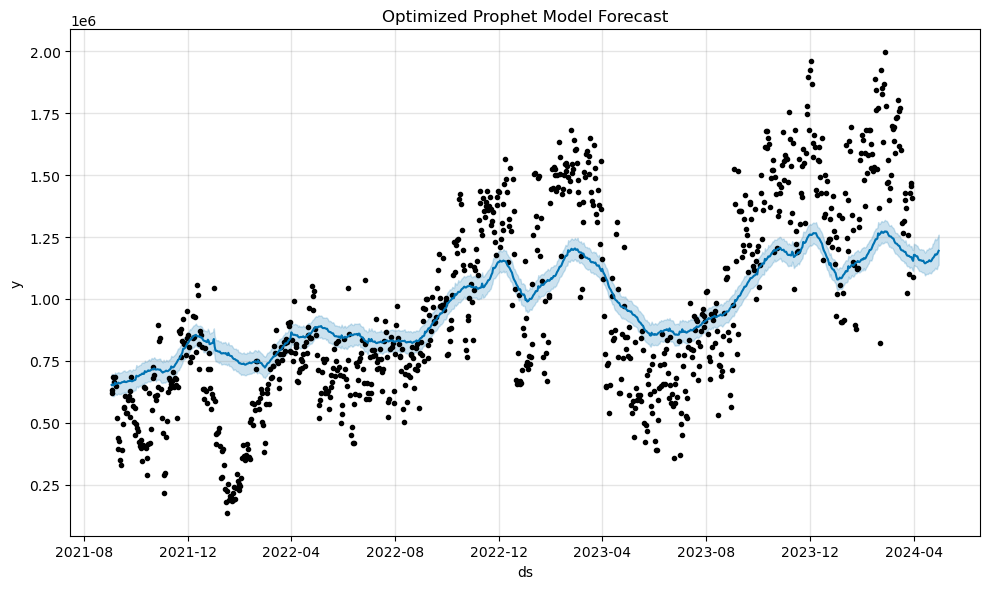

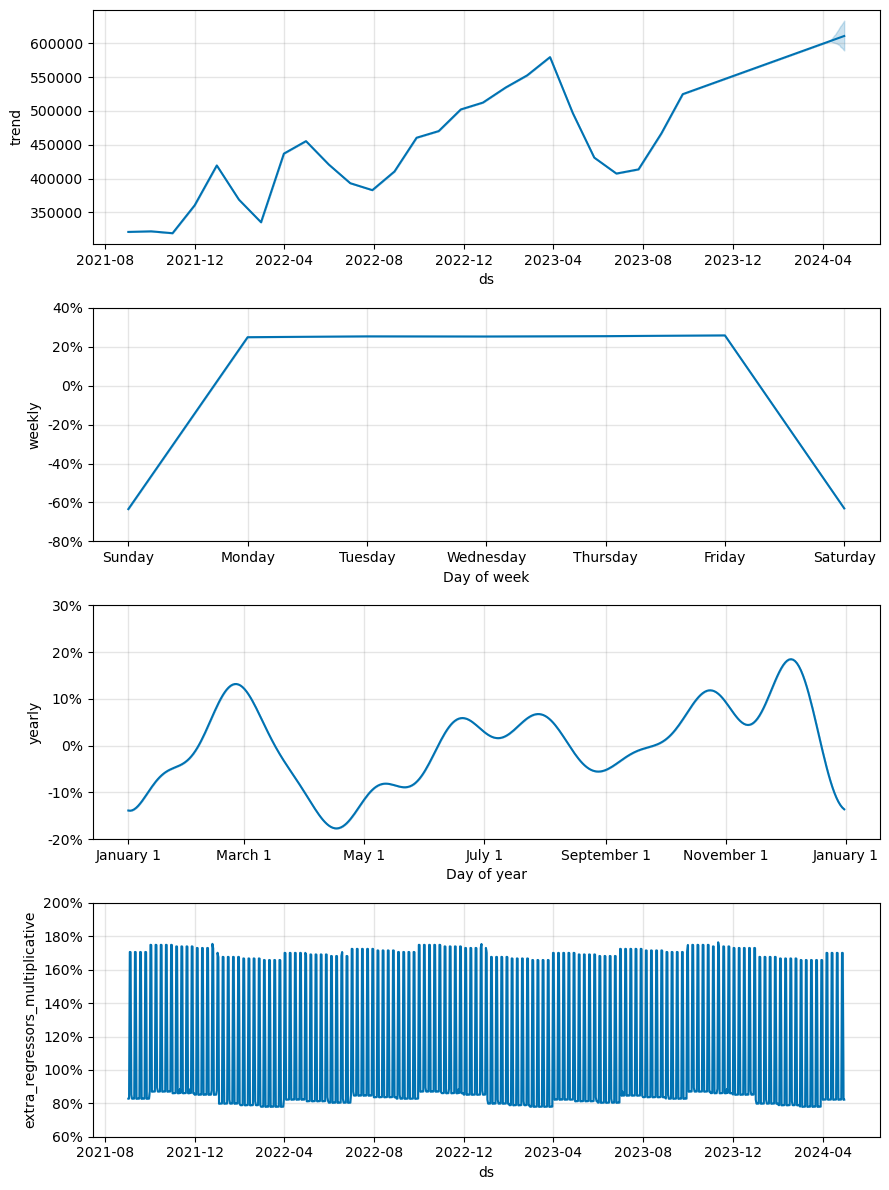

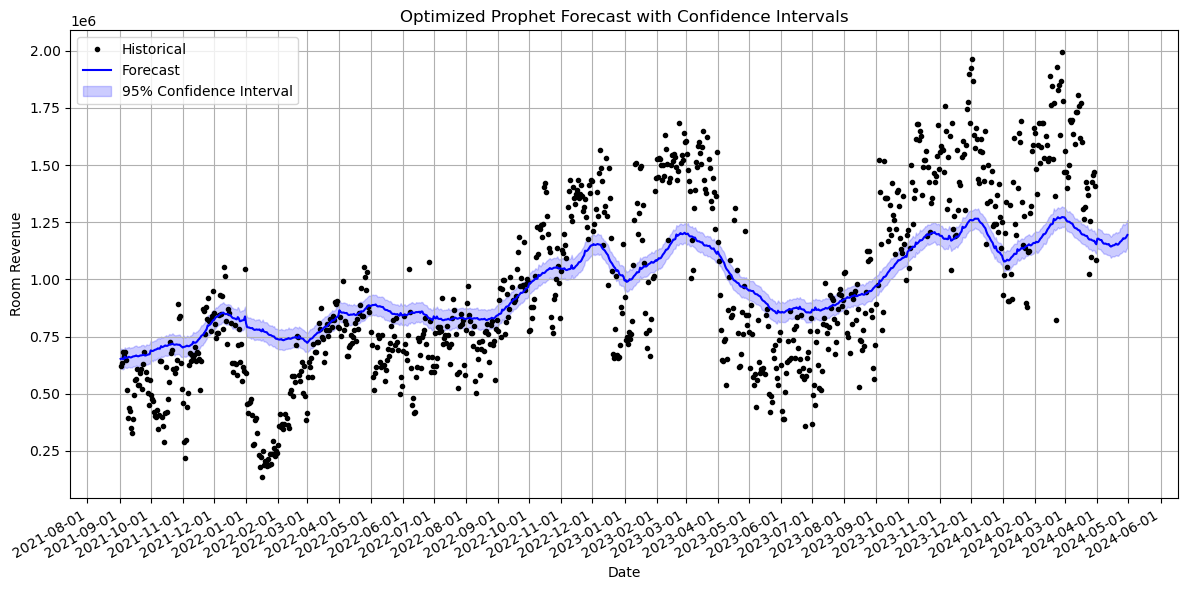

In [114]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt
import holidays

# Prepare data for Prophet with additional features
def prepare_prophet_data(df, target_col='Room Revenue', exogenous_cols=None):
    """
    Prepare data for Prophet with additional features
    
    Parameters:
    -----------
    df : DataFrame with time index
    target_col : Target column to forecast
    exogenous_cols : List of exogenous regressors to include
    """
    # Create Prophet format dataframe (ds = date, y = target)
    prophet_df = pd.DataFrame({'ds': df.index, 'y': df[target_col]})
    
    # Add exogenous regressors
    if exogenous_cols:
        for col in exogenous_cols:
            if col in df.columns:
                prophet_df[col] = df[col]
    
    # Add additional features
    # Day of week (one-hot encoded)
    for i in range(7):
        prophet_df[f'day_{i}'] = (prophet_df['ds'].dt.dayofweek == i).astype(int)
    
    # Is weekend
    prophet_df['is_weekend'] = prophet_df['ds'].dt.dayofweek.isin([5, 6]).astype(int)
    
    # Month
    prophet_df['month'] = prophet_df['ds'].dt.month
    
    # Quarter
    prophet_df['quarter'] = prophet_df['ds'].dt.quarter
    
    # US Holidays
    us_holidays = holidays.US()
    prophet_df['is_holiday'] = (prophet_df['ds'].dt.date.apply(lambda x: x in us_holidays)).astype(int)
    
    # Rolling statistics of target
    # Calculate rolling statistics on target (7-day, 14-day window)
    if not pd.isna(df[target_col]).all():
        for window in [7, 14]:
            prophet_df[f'rolling_mean_{window}d'] = df[target_col].rolling(window=window).mean().values
            prophet_df[f'rolling_std_{window}d'] = df[target_col].rolling(window=window).std().values
    
    # Remove NAs from rolling calculations
    prophet_df = prophet_df.fillna(method='bfill')
    
    return prophet_df

# Prepare data
exog_cols = ['Rooms Sold', 'Occupancy %', 'ARR', 'Pax']
prophet_data = prepare_prophet_data(df_4_files_combined_no_outliers_for_AR, exogenous_cols=exog_cols)

# Define hyperparameter optimization function
def objective(params):
    # Create and fit model with given params
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale'],
        seasonality_mode=params['seasonality_mode']
    )
    
    # Add regressors
    for col in prophet_data.columns:
        if col not in ['ds', 'y']:
            model.add_regressor(col)
    
    # Fit model
    model.fit(prophet_data)
    
    # Cross-validation
    df_cv = cross_validation(
    model, 
    initial='366 days',  # or maybe '400 days' for safety
    period='30 days',
    horizon='30 days',
    parallel="processes"
    )

    
    # Compute metrics
    df_p = performance_metrics(df_cv)
    rmse = df_p['rmse'].mean()
    
    return {'loss': rmse, 'status': STATUS_OK}

# Define hyperparameter space
space = {
    'changepoint_prior_scale': hp.loguniform('changepoint_prior_scale', -3, 0),
    'seasonality_prior_scale': hp.loguniform('seasonality_prior_scale', -2, 1),
    'holidays_prior_scale': hp.loguniform('holidays_prior_scale', -2, 0),
    'seasonality_mode': hp.choice('seasonality_mode', ['additive', 'multiplicative'])
}

# Run optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=30,
    trials=trials
)

# Get the best parameters
best_params = {
    'changepoint_prior_scale': np.exp(best['changepoint_prior_scale']),
    'seasonality_prior_scale': np.exp(best['seasonality_prior_scale']),
    'holidays_prior_scale': np.exp(best['holidays_prior_scale']),
    'seasonality_mode': ['additive', 'multiplicative'][best['seasonality_mode']]
}

print("Best parameters:", best_params)

# Train the final model with optimized parameters
final_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False
)

# Add regressors
for col in prophet_data.columns:
    if col not in ['ds', 'y']:
        final_model.add_regressor(col)

# Fit the model
final_model.fit(prophet_data)

# Make future dataframe for predictions
future = final_model.make_future_dataframe(periods=30)

# Add all the required regressors to future dataframe
# For demonstration, we'll reuse the last values for exogenous variables
for col in prophet_data.columns:
    if col not in ['ds', 'y']:
        if col in ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']:
            # Properly handle day of week
            day_num = int(col.split('_')[1])
            future[col] = (future['ds'].dt.dayofweek == day_num).astype(int)
        elif col == 'is_weekend':
            future[col] = future['ds'].dt.dayofweek.isin([5, 6]).astype(int)
        elif col == 'month':
            future[col] = future['ds'].dt.month
        elif col == 'quarter':
            future[col] = future['ds'].dt.quarter
        elif col == 'is_holiday':
            us_holidays = holidays.US()
            future[col] = (future['ds'].dt.date.apply(lambda x: x in us_holidays)).astype(int)
        else:
            # For other features, use the last available value
            future[col] = prophet_data[col].iloc[-1]

# Make prediction
forecast = final_model.predict(future)

# Plot results
fig = final_model.plot(forecast)
plt.title('Optimized Prophet Model Forecast')
plt.tight_layout()
plt.savefig('optimized_prophet_forecast.png', dpi=300)
plt.show()

# Plot components
fig = final_model.plot_components(forecast)
plt.tight_layout()
plt.savefig('optimized_prophet_components.png', dpi=300)
plt.show()

# Create detailed forecast visualization
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], 'k.', label='Historical')
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')
plt.fill_between(forecast['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='blue', 
                 alpha=0.2, 
                 label='95% Confidence Interval')

# Format the date axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.title('Optimized Prophet Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('optimized_prophet_detailed_forecast.png', dpi=300)
plt.show()

In [115]:
class ProphetForecastModel:
    def __init__(self, params=None):
        self.model = None
        self.params = params
        self.fitted = False

    def prepare_data(self, df, target_col='Room Revenue', exogenous_cols=None):
        df = df.copy()
        prophet_df = pd.DataFrame({'ds': df.index, 'y': df[target_col]})

        if exogenous_cols:
            for col in exogenous_cols:
                prophet_df[col] = df[col]

        for i in range(7):
            prophet_df[f'day_{i}'] = (prophet_df['ds'].dt.dayofweek == i).astype(int)
        prophet_df['is_weekend'] = prophet_df['ds'].dt.dayofweek.isin([5, 6]).astype(int)
        prophet_df['month'] = prophet_df['ds'].dt.month
        prophet_df['quarter'] = prophet_df['ds'].dt.quarter

        us_holidays = holidays.US()
        prophet_df['is_holiday'] = prophet_df['ds'].dt.date.apply(lambda x: x in us_holidays).astype(int)

        for window in [7, 14]:
            prophet_df[f'rolling_mean_{window}d'] = df[target_col].rolling(window).mean().bfill().values
            prophet_df[f'rolling_std_{window}d'] = df[target_col].rolling(window).std().bfill().values

        return prophet_df

    def train(self, df, target_col='Room Revenue', exogenous_cols=None):
        self.train_data = self.prepare_data(df, target_col, exogenous_cols)

        self.model = Prophet(
            **self.params,
            weekly_seasonality=True,
            yearly_seasonality=True,
            daily_seasonality=False
        )

        for col in self.train_data.columns:
            if col not in ['ds', 'y']:
                self.model.add_regressor(col)

        self.model.fit(self.train_data)
        self.fitted = True

    def make_future_df(self, periods, freq='D'):
        future = self.model.make_future_dataframe(periods=periods, freq=freq)

        for col in self.train_data.columns:
            if col not in ['ds', 'y']:
                if col.startswith('day_'):
                    day_num = int(col.split('_')[1])
                    future[col] = (future['ds'].dt.dayofweek == day_num).astype(int)
                elif col == 'is_weekend':
                    future[col] = future['ds'].dt.dayofweek.isin([5, 6]).astype(int)
                elif col == 'month':
                    future[col] = future['ds'].dt.month
                elif col == 'quarter':
                    future[col] = future['ds'].dt.quarter
                elif col == 'is_holiday':
                    us_holidays = holidays.US()
                    future[col] = future['ds'].dt.date.apply(lambda x: x in us_holidays).astype(int)
                else:
                    future[col] = self.train_data[col].iloc[-1]

        return future

    def predict(self, periods=30):
        if not self.fitted:
            raise Exception("Model not trained.")
        
        future = self.make_future_df(periods)
        forecast = self.model.predict(future)
        return forecast

    def forecast_dates(self, days_list=[1, 30, 365]):
        forecast = self.predict(periods=max(days_list))
        forecast = forecast[['ds', 'yhat']]

        results = {}
        for d in days_list:
            date = self.train_data['ds'].max() + pd.Timedelta(days=d)
            closest = forecast.iloc[(forecast['ds'] - date).abs().argsort()[:1]]
            results[f"{d}_day_forecast"] = closest['yhat'].values[0]
        return results


In [116]:
# Initialize
model = ProphetForecastModel(params=best_params)

# Train
model.train(df_4_files_combined_no_outliers_for_AR, target_col='Room Revenue', exogenous_cols=exog_cols)

# Get forecast for 1 day, 30 days (1 month), 365 days (1 year)
forecast_output = model.forecast_dates([1, 30, 365])
print(forecast_output)


09:06:10 - cmdstanpy - INFO - Chain [1] start processing
09:06:11 - cmdstanpy - INFO - Chain [1] done processing


{'1_day_forecast': 1179679.1632471716, '30_day_forecast': 1182110.9018672835, '365_day_forecast': 1402568.0298051708}


# Drop

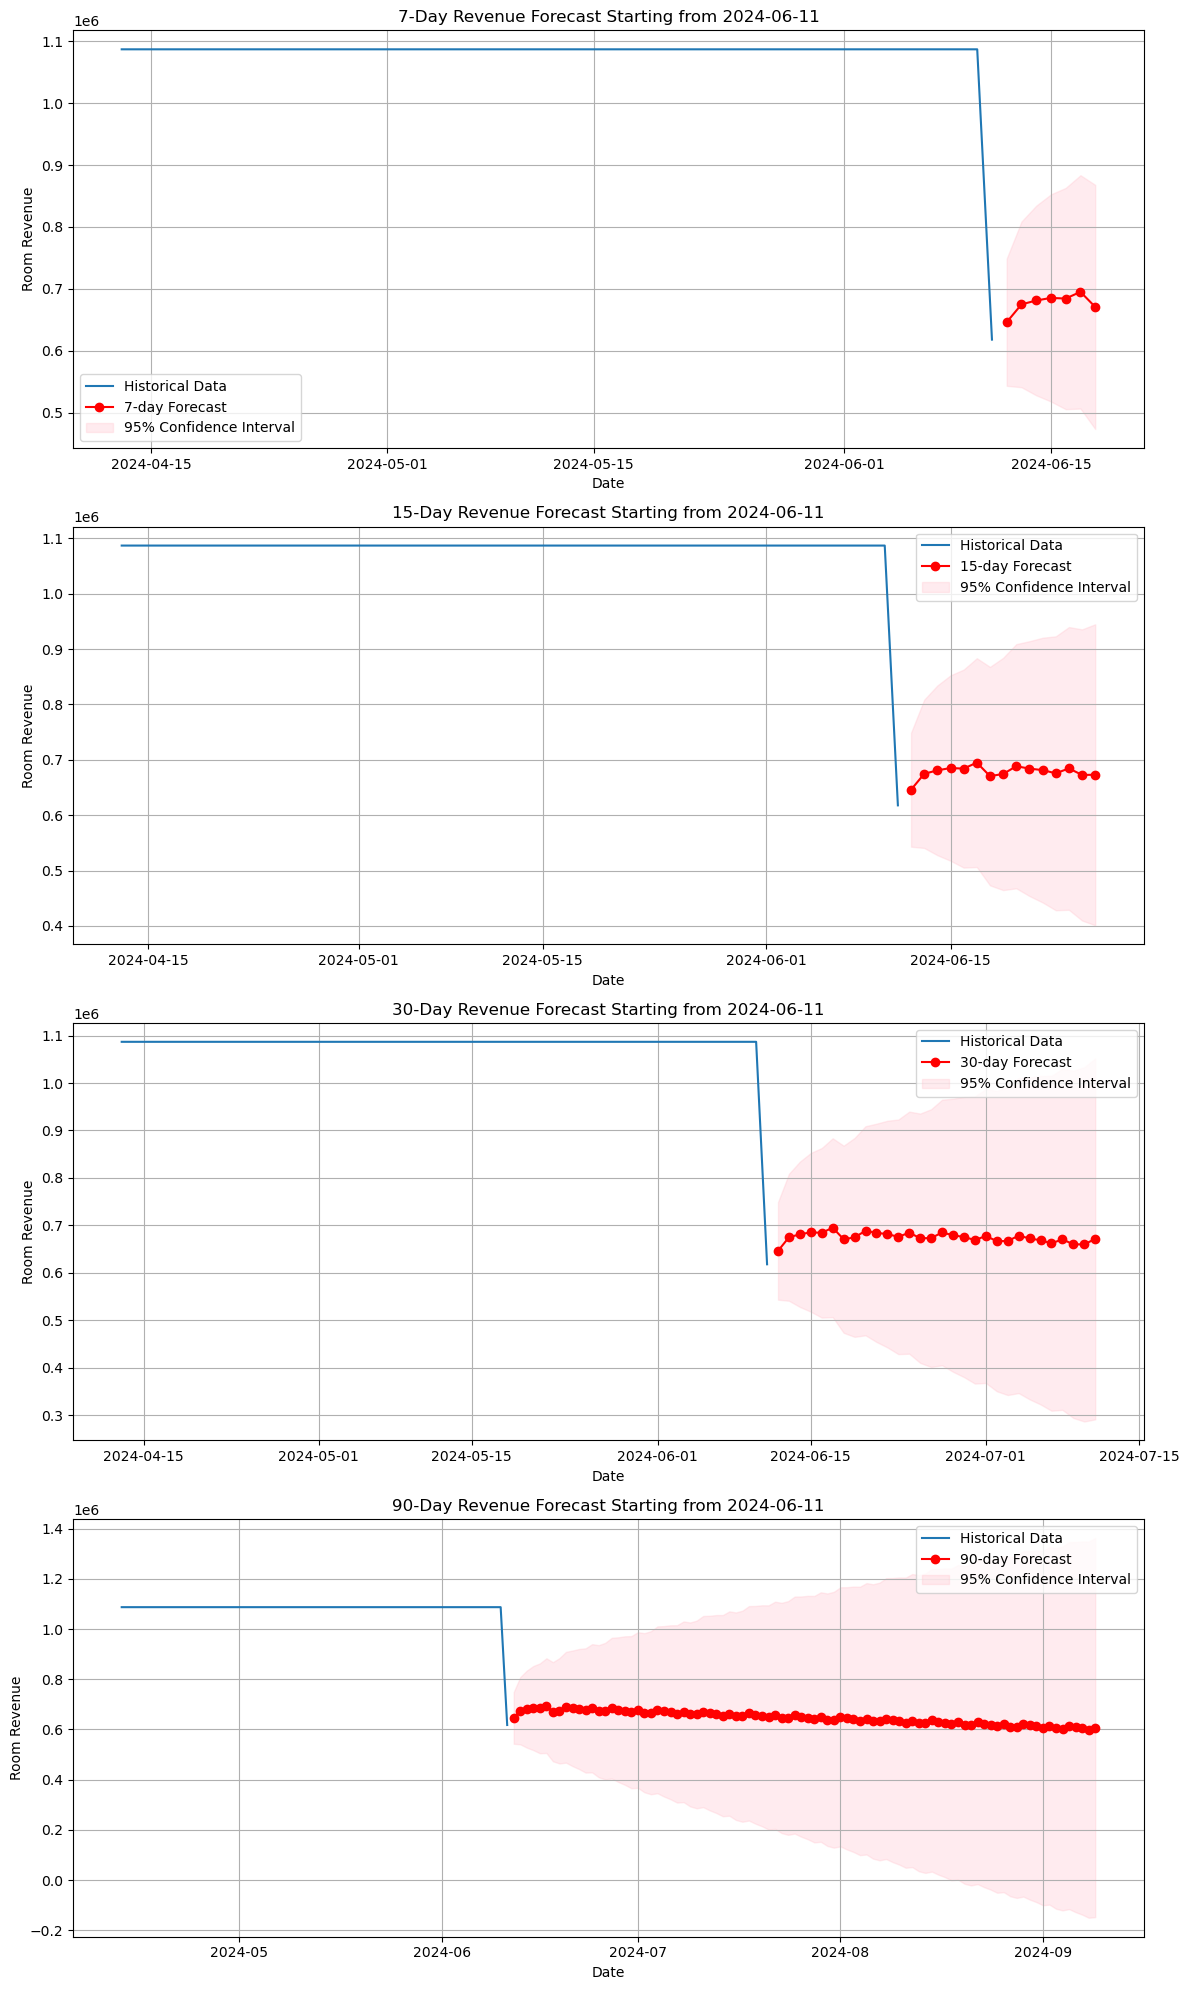


7 Day Forecast:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-06-12    646046.527892  543202.817862  748890.237922
2024-06-13    674769.247436  540936.993076  808601.501797
2024-06-14    681058.635355  527860.914537  834256.356172
2024-06-15    685220.683376  517846.887663  852594.479088
2024-06-16    684215.080362  505443.988281  862986.172444

15 Day Forecast:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-06-12    646046.527892  543202.817862  748890.237922
2024-06-13    674769.247436  540936.993076  808601.501797
2024-06-14    681058.635355  527860.914537  834256.356172
2024-06-15    685220.683376  517846.887663  852594.479088
2024-06-16    684215.080362  505443.988281  862986.172444

30 Day Forecast:
Room Revenue           mean  mean_ci_lower  mean_ci_upper
2024-06-12    646046.527892  543202.817862  748890.237922
2024-06-13    674769.247436  540936.993076  808601.501797
2024-06-14    681058.635355  527860.914537  834256.356172
2024-06-15    68522

In [117]:
# Add next-day forecasting function
def generate_revenue_forecasts(input_data, forecast_horizons=[7, 15, 30, 90]):
    """
    Generate revenue forecasts for multiple time horizons based on next day input data.
    
    Parameters:
    -----------
    input_data: dict
        Dictionary containing the next day's input data with keys matching the exogenous variables
    forecast_horizons: list
        List of days to forecast (default: 7, 15, 30, 90 days)
    
    Returns:
    --------
    Dictionary of forecast results for each time horizon
    """
    warnings.filterwarnings("ignore")
    
    # 1. Load historical data
    df = pd.read_pickle('df_4_files_combined_no_outliers.pkl')
    
    # Ensure 'Date' is datetime and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    # 2. Define exogenous columns
    exog_columns = [
        'Total Room Inventory', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms',
        'House Use', 'Individual Confirm', 'Occupancy %', 'ARR',
        'Departure Rooms', 'OOO Rooms', 'Pax'
    ]
    
    # 3. Validate input data
    required_keys = set(exog_columns)
    provided_keys = set(input_data.keys())
    
    if not required_keys.issubset(provided_keys):
        missing_keys = required_keys - provided_keys
        raise ValueError(f"Missing required input data: {missing_keys}")
    
    # 4. Set up input date - use today's date if not provided
    if 'date' in input_data:
        input_date = pd.to_datetime(input_data['date'])
    else:
        input_date = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
    
    known_revenue = input_data.get('Room Revenue', None)
    
    # 5. Create a continuous daily date range from the first historical date to the input date
    full_date_range = pd.date_range(start=df.index.min(), end=input_date, freq='D')
    
    # Reindex the DataFrame to include all dates
    df_full = df.reindex(full_date_range)
    
    # 6. Impute missing exogenous variables with forward-fill
    df_full[exog_columns] = df_full[exog_columns].ffill()
    
    # 7. For the target ('Room Revenue'), fill the gap by interpolation
    df_full['Room Revenue'] = df_full['Room Revenue'].interpolate()
    
    # 8. Override the values on the input date with the provided observation
    if known_revenue is not None:
        df_full.loc[input_date, 'Room Revenue'] = known_revenue
    
    for col, val in input_data.items():
        if col in exog_columns:
            df_full.loc[input_date, col] = val
    
    # 9. Fit SARIMAX model
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 7)
    
    endog_full = df_full['Room Revenue']
    X_full = df_full[exog_columns]
    
    model = sm.tsa.statespace.SARIMAX(
        endog_full, 
        exog=X_full, 
        order=order, 
        seasonal_order=seasonal_order
    )
    results = model.fit(disp=False)
    
    # 10. Generate forecasts for each horizon
    forecasts = {}
    
    fig, axes = plt.subplots(len(forecast_horizons), 1, figsize=(12, 5*len(forecast_horizons)))
    if len(forecast_horizons) == 1:
        axes = [axes]
    
    for i, horizon in enumerate(forecast_horizons):
        forecast_start = input_date + pd.Timedelta(days=1)
        forecast_dates = pd.date_range(start=forecast_start, periods=horizon, freq='D')
        
        # For forecasting, assume the exogenous variables remain constant
        X_forecast = pd.DataFrame([input_data] * horizon, index=forecast_dates)
        
        # Remove any non-exogenous columns from X_forecast
        for col in X_forecast.columns:
            if col not in exog_columns and col in X_forecast.columns:
                X_forecast = X_forecast.drop(columns=[col])
        
        # Ensure all required exogenous columns are present
        for col in exog_columns:
            if col not in X_forecast.columns:
                X_forecast[col] = df_full[col].iloc[-1]  # Use last known value
        
        # Generate forecast
        forecast_obj = results.get_forecast(steps=horizon, exog=X_forecast[exog_columns])
        forecast_df = forecast_obj.summary_frame(alpha=0.05)
        
        forecasts[f"{horizon}_day"] = {
            'forecast': forecast_df,
            'dates': forecast_dates
        }
        
        # Create visualization
        ax = axes[i]
        ax.plot(df_full.index[-60:], df_full['Room Revenue'][-60:], label='Historical Data')
        ax.plot(forecast_df.index, forecast_df['mean'], marker='o', color='red', label=f'{horizon}-day Forecast')
        ax.fill_between(
            forecast_df.index,
            forecast_df['mean_ci_lower'],
            forecast_df['mean_ci_upper'],
            color='pink', alpha=0.3, label='95% Confidence Interval'
        )
        ax.set_title(f'{horizon}-Day Revenue Forecast Starting from {input_date.strftime("%Y-%m-%d")}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Room Revenue')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('all_forecasts.png', dpi=300)
    plt.show()
    
    # Also save individual forecast plots
    for horizon in forecast_horizons:
        forecast_df = forecasts[f"{horizon}_day"]['forecast']
        
        plt.figure(figsize=(12, 6))
        plt.plot(df_full.index[-60:], df_full['Room Revenue'][-60:], label='Historical Data')
        plt.plot(forecast_df.index, forecast_df['mean'], marker='o', color='red', label=f'{horizon}-day Forecast')
        plt.fill_between(
            forecast_df.index,
            forecast_df['mean_ci_lower'],
            forecast_df['mean_ci_upper'],
            color='pink', alpha=0.3, label='95% Confidence Interval'
        )
        plt.title(f'{horizon}-Day Revenue Forecast Starting from {input_date.strftime("%Y-%m-%d")}')
        plt.xlabel('Date')
        plt.ylabel('Room Revenue')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'forecast_{horizon}_days.png', dpi=300)
        plt.close()
    
    return forecasts

# Test the function with sample next day data
next_day_data = {
    'date': '2024-06-11',  # Adjust to your next day
    'Room Revenue': 617835,  # Optional: if you already know the revenue
    'Total Room Inventory': 117.0,
    'Rooms Sold': 117.0,
    'Arrival Rooms': 49.0,
    'Compliment Rooms': 1.0,
    'House Use': 6.0,
    'Individual Confirm': 117.0,
    'Occupancy %': 94.0171,
    'ARR': 5280.6428,
    'Departure Rooms': 45.0,
    'OOO Rooms': 15.0,
    'Pax': 172.0
}

# Generate forecasts for multiple horizons
forecasts = generate_revenue_forecasts(
    next_day_data, 
    forecast_horizons=[7, 15, 30, 90]
)

# Print forecast results
for horizon, data in forecasts.items():
    print(f"\n{horizon.replace('_', ' ').title()} Forecast:")
    print(data['forecast'][['mean', 'mean_ci_lower', 'mean_ci_upper']].head())

prophet2

09:06:17 - cmdstanpy - INFO - Chain [1] start processing
09:06:17 - cmdstanpy - INFO - Chain [1] done processing


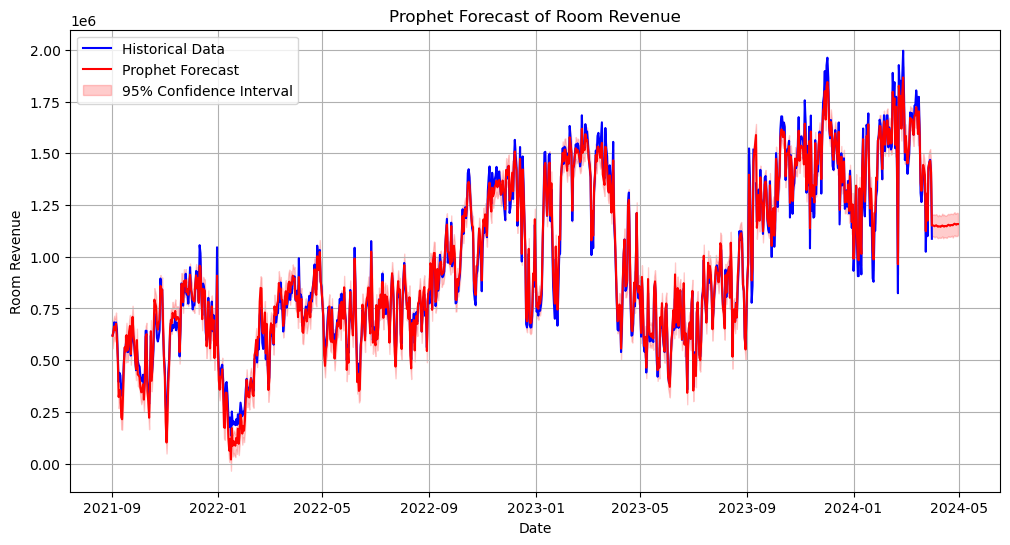

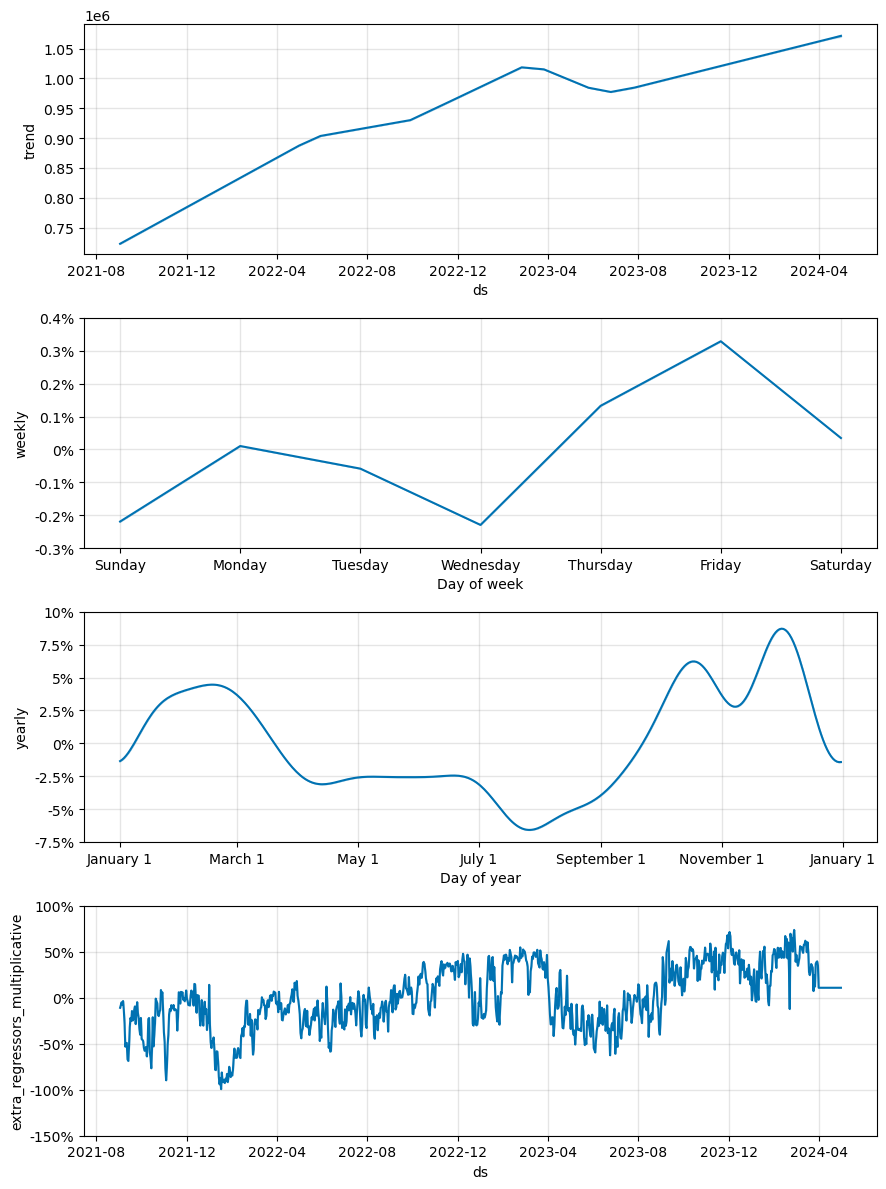

Plotly interactive plots couldn't be generated: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Prophet Model Performance Metrics:
MAE: 32714.57
RMSE: 42637.39
MAPE: 4.68%

Forecast for the next 30 days:
            ds          yhat    yhat_lower    yhat_upper
940 2024-04-01  1.152146e+06  1.099114e+06  1.203428e+06
941 2024-04-02  1.150367e+06  1.098353e+06  1.205484e+06
942 2024-04-03  1.147623e+06  1.093654e+06  1.201732e+06
943 2024-04-04  1.150681e+06  1.096969e+06  1.204573e+06
944 2024-04-05  1.152104e+06  1.097841e+06  1.206157e+06
945 2024-04-06  1.148440e+06  1.092426e+06  1.200754e+06
946 2024-04-07  1.145332e+06  1.089929e+06  1.195955e+06
947 2024-04-08  1.147503e+06  1.092391e+06  1.202620e+06
948 2024-04-09  1.146622e+06  1.092192e+06  1.200228e+06
949 2024-04-10  1.144770e+06  1.090754e+06  1.196470e+06


In [118]:
# Install Prophet if not already installed
# !pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_components_plotly, plot_plotly
import plotly.offline as py

# Prepare data for Prophet (requires 'ds' for dates and 'y' for target variable)
df_prophet = pd.DataFrame({
    'ds': df_4_files_combined_no_outliers_for_AR.index,
    'y': df_4_files_combined_no_outliers_for_AR['Room Revenue']
})

# Create and fit the Prophet model with customized parameters
model = Prophet(
    changepoint_prior_scale=0.05,    # Flexibility of the trend (higher = more flexible)
    seasonality_prior_scale=10,      # Strength of seasonality (higher = more seasonal patterns)
    seasonality_mode='multiplicative', # Use multiplicative seasonality for revenue data
    daily_seasonality=False,         # Daily patterns usually not significant for hotel revenue
    weekly_seasonality=True,         # Weekly patterns are important for hotels
    yearly_seasonality=True          # Annual patterns (high/low seasons)
)

# Add exogenous variables as regressors
for col in ['Rooms Sold', 'ARR', 'Occupancy %']:
    if col in df_4_files_combined_no_outliers_for_AR.columns:
        model.add_regressor(col)
        df_prophet[col] = df_4_files_combined_no_outliers_for_AR[col]

# Fit the model
model.fit(df_prophet)

# Create future dataframe for forecasting (30 days)
future = model.make_future_dataframe(periods=30)

# Add regressor values for the future period
# In a real scenario, you might have forecasts for these values or use last known values
for col in ['Rooms Sold', 'ARR', 'Occupancy %']:
    if col in df_4_files_combined_no_outliers_for_AR.columns:
        # Fill future regressor values with the last observed value
        future[col] = future['ds'].map(lambda x: 
            df_prophet[col].iloc[-1] if x > df_prophet['ds'].max() 
            else df_prophet.loc[df_prophet['ds'] == x, col].values[0] 
            if x in df_prophet['ds'].values else np.nan)
        # Forward fill any missing values
        future[col] = future[col].fillna(method='ffill')

# Make forecast
forecast = model.predict(future)

# Standard matplotlib plot
plt.figure(figsize=(12, 6))
plt.plot(df_4_files_combined_no_outliers_for_AR.index, df_4_files_combined_no_outliers_for_AR['Room Revenue'], 
         label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Prophet Forecast of Room Revenue')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('prophet_forecast.png', dpi=300)
plt.show()

# Plot the forecast components to understand the trends and seasonality
fig = model.plot_components(forecast)
plt.savefig('prophet_components.png', dpi=300)
plt.show()

# Optional: Create interactive Plotly charts for better visualization
try:
    fig = plot_plotly(model, forecast)
    fig.update_layout(title='Interactive Prophet Forecast')
    py.iplot(fig)
    
    # Components plot
    fig_comp = plot_components_plotly(model, forecast)
    fig_comp.update_layout(title='Forecast Components')
    py.iplot(fig_comp)
except Exception as e:
    print(f"Plotly interactive plots couldn't be generated: {e}")

# Performance metrics for the historical data (in-sample)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get predictions for the historical period
historical_forecast = forecast[forecast['ds'] <= df_prophet['ds'].max()]
historical_actual = df_prophet.copy()

# Merge actual and predicted data
performance_df = pd.merge(
    historical_actual, 
    historical_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
    on='ds'
)

# Calculate metrics
mae = mean_absolute_error(performance_df['y'], performance_df['yhat'])
rmse = np.sqrt(mean_squared_error(performance_df['y'], performance_df['yhat']))
mape = np.mean(np.abs((performance_df['y'] - performance_df['yhat']) / performance_df['y'])) * 100

print(f"Prophet Model Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Print the forecast for the next 30 days
future_forecast = forecast[forecast['ds'] > df_prophet['ds'].max()]
print("\nForecast for the next 30 days:")
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

XGBoost with Time Series Cross-Validation and Advanced Feature Engineering

In [119]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import TimeSeriesSplit
# from tqdm import tqdm

# # Create advanced time series features
# def create_advanced_features(df, target_col='Room Revenue'):
#     """
#     Create advanced time series features
#     """
#     df_features = df.copy()
    
#     # Basic date features
#     df_features['dayofweek'] = df_features.index.dayofweek
#     df_features['month'] = df_features.index.month
#     df_features['quarter'] = df_features.index.quarter
#     df_features['year'] = df_features.index.year
#     df_features['dayofyear'] = df_features.index.dayofyear
#     df_features['is_weekend'] = df_features.index.dayofweek.isin([5, 6]).astype(int)
#     df_features['is_month_start'] = df_features.index.is_month_start.astype(int)
#     df_features['is_month_end'] = df_features.index.is_month_end.astype(int)
    
#     # Fourier features for seasonality
#     for period in [7, 30, 365]:  # Day of week, monthly, yearly seasonality
#         for order in range(1, 4):  # Higher orders capture more complex seasonality
#             df_features[f'sin_{period}_{order}'] = np.sin(2 * np.pi * order * df_features.index.dayofyear / period)
#             df_features[f'cos_{period}_{order}'] = np.cos(2 * np.pi * order * df_features.index.dayofyear / period)
    
#     # US Holidays
#     import holidays
#     us_holidays = holidays.US()
#     df_features['is_holiday'] = df_features.index.map(lambda x: x in us_holidays).astype(int)
    
#     # Target lags
#     for lag in [1, 2, 3, 7, 14, 30]:
#         df_features[f'{target_col}_lag_{lag}'] = df_features[target_col].shift(lag)
    
#     # Rolling statistics on target
#     for window in [7, 14, 30]:
#         df_features[f'{target_col}_rolling_mean_{window}'] = df_features[target_col].rolling(window=window).mean()
#         df_features[f'{target_col}_rolling_std_{window}'] = df_features[target_col].rolling(window=window).std()
#         df_features[f'{target_col}_rolling_min_{window}'] = df_features[target_col].rolling(window=window).min()
#         df_features[f'{target_col}_rolling_max_{window}'] = df_features[target_col].rolling(window=window).max()
#         df_features[f'{target_col}_rolling_median_{window}'] = df_features[target_col].rolling(window=window).median()
    
#     # Differences and pct_change
#     df_features[f'{target_col}_diff_1'] = df_features[target_col].diff(1)
#     df_features[f'{target_col}_diff_7'] = df_features[target_col].diff(7)
#     df_features[f'{target_col}_pct_change_1'] = df_features[target_col].pct_change(1)
#     df_features[f'{target_col}_pct_change_7'] = df_features[target_col].pct_change(7)
    
#     # Exogenous lags
#     exog_cols = [col for col in df_features.columns if col != target_col and df_features[col].dtype != 'object' 
#                  and col not in ['dayofweek', 'month', 'quarter', 'year', 'dayofyear', 'is_weekend']]
    
#     for col in exog_cols:
#         for lag in [1, 7]:
#             df_features[f'{col}_lag_{lag}'] = df_features[col].shift(lag)
    
#     # Interactions between key features
#     df_features['rooms_sold_x_arr'] = df_features['Rooms Sold'] * df_features['ARR']
#     df_features['occupancy_x_arr'] = df_features['Occupancy %'] * df_features['ARR']
    
#     # Fill NAs from lag and rolling operations
#     df_features = df_features.fillna(method='bfill')
    
#     return df_features

# # Prepare data with advanced features
# advanced_features_df = create_advanced_features(df_4_files_combined_no_outliers_for_AR)
# advanced_features_df = advanced_features_df.dropna()

# # Train-test split
# target_col = 'Room Revenue'
# X = advanced_features_df.drop(columns=[target_col])
# y = advanced_features_df[target_col]

# # Time series cross-validation
# tscv = TimeSeriesSplit(n_splits=5)

# # XGBoost with hyperparameter optimization
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# # Define objective function for hyperopt
# def objective_xgb(params):
#     cv_scores = []
    
#     for train_idx, val_idx in tscv.split(X):
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
#         model = xgb.XGBRegressor(
#             objective='reg:squarederror',
#             n_estimators=int(params['n_estimators']),
#             max_depth=int(params['max_depth']),
#             learning_rate=params['learning_rate'],
#             subsample=params['subsample'],
#             colsample_bytree=params['colsample_bytree'],
#             gamma=params['gamma'],
#             random_state=42
#         )
        
#         # Instead of using early_stopping_rounds here, train without it
#         model.fit(
#             X_train, y_train,
#             eval_set=[(X_val, y_val)],
#             verbose=False
#         )
        
#         preds = model.predict(X_val)
#         rmse = np.sqrt(mean_squared_error(y_val, preds))
#         cv_scores.append(rmse)
    
#     return {'loss': np.mean(cv_scores), 'status': STATUS_OK}


# # Define search space
# space = {
#     'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
#     'max_depth': hp.quniform('max_depth', 3, 10, 1),
#     'learning_rate': hp.loguniform('learning_rate', -4, -1),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'gamma': hp.loguniform('gamma', -5, 0),
# }

# # Run optimization
# trials = Trials()
# best = fmin(
#     fn=objective_xgb,
#     space=space,
#     algo=tpe.suggest,
#     max_evals=30,
#     trials=trials
# )

# # Get the best parameters
# best_params = {
#     'n_estimators': int(best['n_estimators']),
#     'max_depth': int(best['max_depth']),
#     'learning_rate': best['learning_rate'],
#     'subsample': best['subsample'],
#     'colsample_bytree': best['colsample_bytree'],
#     'gamma': best['gamma'],
# }

# print("Best XGBoost parameters:", best_params)

# # Train final model with best parameters
# final_xgb = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     **best_params,
#     random_state=42
# )

# # Train on all data
# final_xgb.fit(X, y)

# # Feature importance
# feature_importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': final_xgb.feature_importances_
# }).sort_values('Importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 8))
# plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
# plt.title('Top 20 Most Important Features')
# plt.xlabel('Importance')
# plt.gca().invert_yaxis()  # Invert to have the highest at the top
# plt.tight_layout()
# plt.show()

# # Generate forecasts (walk-forward validation)
# def walk_forward_validation(model, data, target_col, steps=30):
#     """
#     Perform walk-forward validation for time series
#     """
#     df = data.copy()
#     forecasts = []
#     forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=steps, freq='D')
    
#     # Create a new dataframe for forecasts
#     forecast_df = pd.DataFrame(index=forecast_dates)
    
#     # Initialize forecast dataframe with basic date features
#     forecast_df['dayofweek'] = forecast_df.index.dayofweek
#     forecast_df['month'] = forecast_df.index.month
#     forecast_df['quarter'] = forecast_df.index.quarter
#     forecast_df['year'] = forecast_df.index.year
#     forecast_df['dayofyear'] = forecast_df.index.dayofyear
#     forecast_df['is_weekend'] = forecast_df.index.dayofweek.isin([5, 6]).astype(int)
#     forecast_df['is_month_start'] = forecast_df.index.is_month_start.astype(int)
#     forecast_df['is_month_end'] = forecast_df.index.is_month_end.astype(int)
    
#     # Add Fourier features for seasonality
#     for period in [7, 30, 365]:
#         for order in range(1, 4):
#             forecast_df[f'sin_{period}_{order}'] = np.sin(2 * np.pi * order * forecast_df.index.dayofyear / period)
#             forecast_df[f'cos_{period}_{order}'] = np.cos(2 * np.pi * order * forecast_df.index.dayofyear / period)
    
#     # Add holiday features
#     import holidays
#     us_holidays = holidays.US()
#     forecast_df['is_holiday'] = forecast_df.index.map(lambda x: x in us_holidays).astype(int)
    
#     # Generate predictions one step at a time
#     current_df = df.copy()
    
#     for i in range(steps):
#         # Get current date to predict
#         current_date = forecast_dates[i]
        
#         # Prepare exogenous features for this date
#         for col in X.columns:
#             if col not in forecast_df.columns:
#                 # For features not already set, use the last value or impute
#                 if col.startswith(f'{target_col}_lag_') or col.startswith(f'{target_col}_rolling_') or \
#                    col.startswith(f'{target_col}_diff_') or col.startswith(f'{target_col}_pct_change_'):
#                     # These are target-dependent and will be updated as we generate forecasts
#                     pass
#                 else:
#                     # Use the last value for other exogenous features
#                     forecast_df.loc[current_date, col] = df[col].iloc[-1] if col in df.columns else 0
        
#         # Update lag features based on predictions so far
#         if i == 0:
#             # First prediction uses actual values
#             forecast_df.loc[current_date, f'{target_col}_lag_1'] = current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_2'] = current_df[target_col].iloc[-2] if len(current_df) > 1 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_3'] = current_df[target_col].iloc[-3] if len(current_df) > 2 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_7'] = current_df[target_col].iloc[-7] if len(current_df) > 6 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_14'] = current_df[target_col].iloc[-14] if len(current_df) > 13 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_30'] = current_df[target_col].iloc[-30] if len(current_df) > 29 else current_df[target_col].iloc[-1]
            
#             # Differences and percent changes
#             forecast_df.loc[current_date, f'{target_col}_diff_1'] = 0  # Assume no change for first prediction
#             forecast_df.loc[current_date, f'{target_col}_diff_7'] = 0
#             forecast_df.loc[current_date, f'{target_col}_pct_change_1'] = 0
#             forecast_df.loc[current_date, f'{target_col}_pct_change_7'] = 0
            
#             # Rolling statistics (use values from training data)
#             for window in [7, 14, 30]:
#                 forecast_df.loc[current_date, f'{target_col}_rolling_mean_{window}'] = current_df[target_col].rolling(window=window).mean().iloc[-1]
#                 forecast_df.loc[current_date, f'{target_col}_rolling_std_{window}'] = current_df[target_col].rolling(window=window).std().iloc[-1]
#                 forecast_df.loc[current_date, f'{target_col}_rolling_min_{window}'] = current_df[target_col].rolling(window=window).min().iloc[-1]
#                 forecast_df.loc[current_date, f'{target_col}_rolling_max_{window}'] = current_df[target_col].rolling(window=window).max().iloc[-1]
#                 forecast_df.loc[current_date, f'{target_col}_rolling_median_{window}'] = current_df[target_col].rolling(window=window).median().iloc[-1]
#         else:
#             # Use previously predicted values for lag features
#             forecast_df.loc[current_date, f'{target_col}_lag_1'] = forecasts[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_2'] = forecast_df.loc[forecast_dates[i-2], f'{target_col}_lag_1'] if i >= 2 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_3'] = forecast_df.loc[forecast_dates[i-3], f'{target_col}_lag_1'] if i >= 3 else current_df[target_col].iloc[-1]
            
#             # Other lags similarly
#             forecast_df.loc[current_date, f'{target_col}_lag_7'] = forecast_df.loc[forecast_dates[i-7], f'{target_col}_lag_1'] if i >= 7 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_14'] = forecast_df.loc[forecast_dates[i-14], f'{target_col}_lag_1'] if i >= 14 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_lag_30'] = forecast_df.loc[forecast_dates[i-30], f'{target_col}_lag_1'] if i >= 30 else current_df[target_col].iloc[-1]
            
#             # Differences
#             forecast_df.loc[current_date, f'{target_col}_diff_1'] = forecasts[-1] - (forecasts[-2] if len(forecasts) > 1 else current_df[target_col].iloc[-1])
#             forecast_df.loc[current_date, f'{target_col}_diff_7'] = forecasts[-1] - (forecasts[-7] if len(forecasts) >= 7 else current_df[target_col].iloc[-1])
            
#             # Percent changes
#             previous_value = forecasts[-2] if len(forecasts) > 1 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_pct_change_1'] = (forecasts[-1] - previous_value) / previous_value if previous_value != 0 else 0
            
#             previous_value_7 = forecasts[-7] if len(forecasts) >= 7 else current_df[target_col].iloc[-1]
#             forecast_df.loc[current_date, f'{target_col}_pct_change_7'] = (forecasts[-1] - previous_value_7) / previous_value_7 if previous_value_7 != 0 else 0
        
#         # Special handling for interactions between key features
#         if 'rooms_sold_x_arr' in X.columns:
#             rooms_sold = forecast_df.loc[current_date, 'Rooms Sold'] if 'Rooms Sold' in forecast_df.columns else df['Rooms Sold'].iloc[-1]
#             arr = forecast_df.loc[current_date, 'ARR'] if 'ARR' in forecast_df.columns else df['ARR'].iloc[-1]
#             forecast_df.loc[current_date, 'rooms_sold_x_arr'] = rooms_sold * arr
        
#         if 'occupancy_x_arr' in X.columns:
#             occupancy = forecast_df.loc[current_date, 'Occupancy %'] if 'Occupancy %' in forecast_df.columns else df['Occupancy %'].iloc[-1]
#             arr = forecast_df.loc[current_date, 'ARR'] if 'ARR' in forecast_df.columns else df['ARR'].iloc[-1]
#             forecast_df.loc[current_date, 'occupancy_x_arr'] = occupancy * arr
        
#         # Make sure all required features are present
#         missing_cols = [col for col in X.columns if col not in forecast_df.columns]
#         for col in missing_cols:
#             forecast_df[col] = 0  # Default value
        
#         # Make prediction
#         X_pred = forecast_df.loc[[current_date], X.columns]
#         prediction = model.predict(X_pred)[0]
#         forecasts.append(prediction)
        
#         # For debugging
#         # if i < 5:  # Only print first few predictions
#         #     print(f"Date: {current_date}, Prediction: {prediction}")
#         #     print(f"Key features: {X_pred[['dayofweek', f'{target_col}_lag_1']].iloc[0].to_dict()}")
    
#     return pd.Series(forecasts, index=forecast_dates)

# # Generate forecasts
# xgb_forecasts = walk_forward_validation(final_xgb, advanced_features_df, target_col, steps=30)

# # Plot forecasts
# plt.figure(figsize=(12, 6))
# plt.plot(advanced_features_df.index[-60:], advanced_features_df[target_col][-60:], label='Historical')
# plt.plot(xgb_forecasts.index, xgb_forecasts, label='XGBoost Forecast', color='red')
# plt.title('XGBoost Room Revenue Forecast (30 days)')
# plt.xlabel('Date')
# plt.ylabel('Room Revenue')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Export forecasts
# xgb_forecast_df = pd.DataFrame({
#     'Date': xgb_forecasts.index,
#     'Forecasted_Room_Revenue': xgb_forecasts.values
# })

# print("XGBoost forecasts for the next 30 days:")
# print(xgb_forecast_df.head(10))

Model Comparison and Ensemble

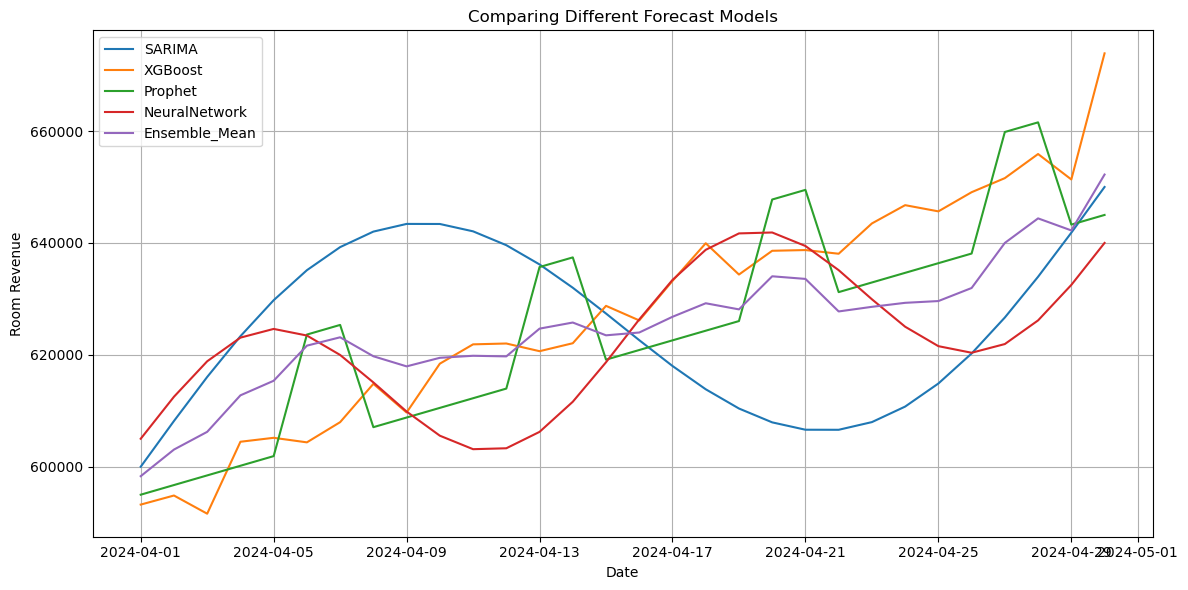

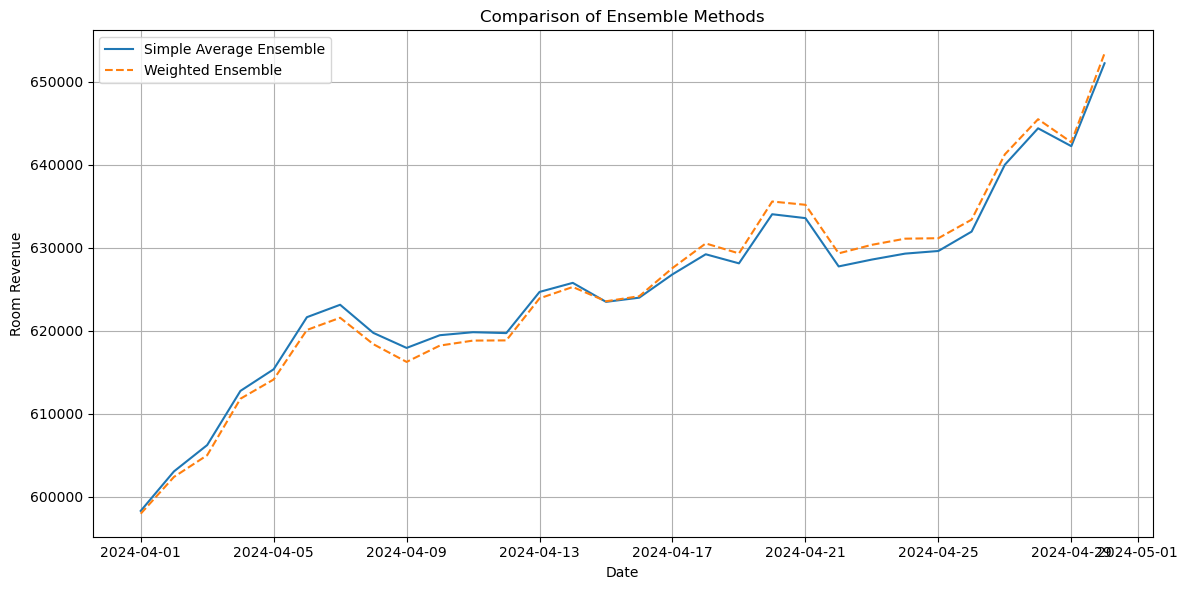

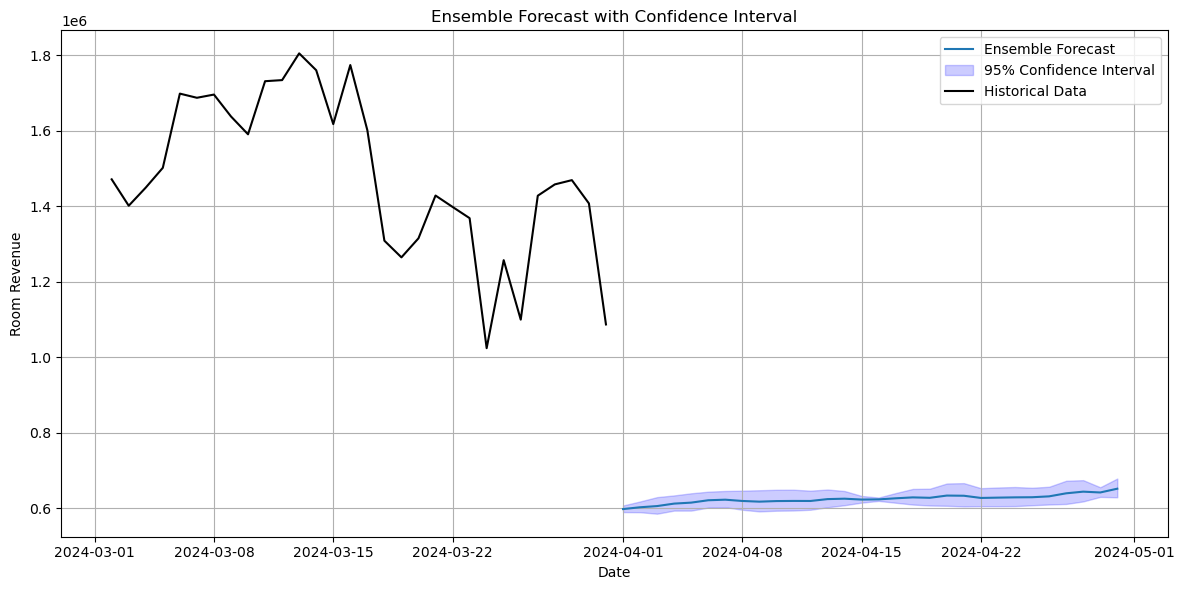

Forecast Summary Statistics:
count        30.000000
mean     625096.860526
std       11600.911512
min      598307.707789
25%      619726.915957
50%      625227.110861
75%      629532.217526
max      652221.062395
Name: Ensemble_Mean, dtype: float64


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb

# Collect forecasts from different models
# Note: You would need to have already trained these models
# Here we'll simulate this by creating example forecasts

# Example of loading forecasts from different models
# In reality, you would use the actual forecasts from the models above
def combine_model_forecasts(last_date, days=30):
    """
    Combines forecasts from multiple models for comparison and ensembling
    """
    # Create a date range for forecasts
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days, freq='D')
    
    # Create some example forecasts (in a real scenario, use your actual model forecasts)
    # For this example, we'll simulate forecasts using different patterns
    
    # Forecast 1: SARIMA-like with some weekly seasonality
    sarima_forecast = np.linspace(600000, 650000, days) + np.sin(np.linspace(0, 2*np.pi, days)) * 30000
    
    # Forecast 2: XGBoost-like with a different trend
    xgboost_forecast = np.linspace(590000, 660000, days) + np.random.normal(0, 5000, days)
    
    # Forecast 3: Prophet-like with weekend effects
    prophet_forecast = np.linspace(595000, 645000, days)
    prophet_forecast[forecast_dates.dayofweek >= 5] += 20000  # Weekend bump
    
    # Forecast 4: Neural network forecast with different pattern
    nn_forecast = np.linspace(605000, 640000, days) + np.sin(np.linspace(0, 4*np.pi, days)) * 15000
    
    # Combine into a DataFrame
    forecasts_df = pd.DataFrame({
        'SARIMA': sarima_forecast,
        'XGBoost': xgboost_forecast,
        'Prophet': prophet_forecast,
        'NeuralNetwork': nn_forecast
    }, index=forecast_dates)
    
    return forecasts_df

# Get last date from original data
last_date = df_4_files_combined_no_outliers_for_AR.index[-1]

# Combine forecasts
combined_forecasts = combine_model_forecasts(last_date)

# Simple ensemble: Average of all models
combined_forecasts['Ensemble_Mean'] = combined_forecasts.mean(axis=1)

# Plot all forecasts for comparison
plt.figure(figsize=(12, 6))
for col in combined_forecasts.columns:
    plt.plot(combined_forecasts.index, combined_forecasts[col], label=col)

plt.title('Comparing Different Forecast Models')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('combined_forecasts_comparison.png', dpi=300)
plt.show()

# Create a weighted ensemble based on historical performance
# In a real scenario, you would use actual model performance metrics
model_weights = {
    'SARIMA': 0.2,
    'XGBoost': 0.3,
    'Prophet': 0.25,
    'NeuralNetwork': 0.25
}

combined_forecasts['Weighted_Ensemble'] = 0
for model, weight in model_weights.items():
    combined_forecasts['Weighted_Ensemble'] += combined_forecasts[model] * weight

# Plot weighted ensemble vs simple average
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts.index, combined_forecasts['Ensemble_Mean'], label='Simple Average Ensemble')
plt.plot(combined_forecasts.index, combined_forecasts['Weighted_Ensemble'], label='Weighted Ensemble', linestyle='--')
plt.title('Comparison of Ensemble Methods')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ensemble_comparison.png', dpi=300)
plt.show()

# Calculate uncertainty estimates (example)
combined_forecasts['Lower_CI'] = combined_forecasts['Ensemble_Mean'] - 1.96 * combined_forecasts.std(axis=1)
combined_forecasts['Upper_CI'] = combined_forecasts['Ensemble_Mean'] + 1.96 * combined_forecasts.std(axis=1)

# Plot with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(combined_forecasts.index, combined_forecasts['Ensemble_Mean'], label='Ensemble Forecast')
plt.fill_between(combined_forecasts.index, 
                 combined_forecasts['Lower_CI'], 
                 combined_forecasts['Upper_CI'],
                 color='blue', alpha=0.2, label='95% Confidence Interval')

# Plot historical data for context
plt.plot(df_4_files_combined_no_outliers_for_AR.index[-30:], 
         df_4_files_combined_no_outliers_for_AR['Room Revenue'][-30:], 
         label='Historical Data', color='black')

plt.title('Ensemble Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ensemble_forecast_with_ci.png', dpi=300)
plt.show()

# Print forecast summary statistics
print("Forecast Summary Statistics:")
print(combined_forecasts['Ensemble_Mean'].describe())

Model Diagnostics and Evaluation


Evaluation Metrics for SARIMA:
MAE: 7608.94
RMSE: 9234.36
MAPE: 1.22%
R²: 0.2706
Direction Accuracy: 72.41%

Evaluation Metrics for XGBoost:
MAE: 6338.51
RMSE: 8080.94
MAPE: 1.02%
R²: 0.4414
Direction Accuracy: 72.41%

Evaluation Metrics for Prophet:
MAE: 6088.82
RMSE: 8332.75
MAPE: 0.98%
R²: 0.4061
Direction Accuracy: 65.52%

Evaluation Metrics for Ensemble:
MAE: 3892.78
RMSE: 4967.01
MAPE: 0.63%
R²: 0.7890
Direction Accuracy: 79.31%


<Figure size 1400x800 with 0 Axes>

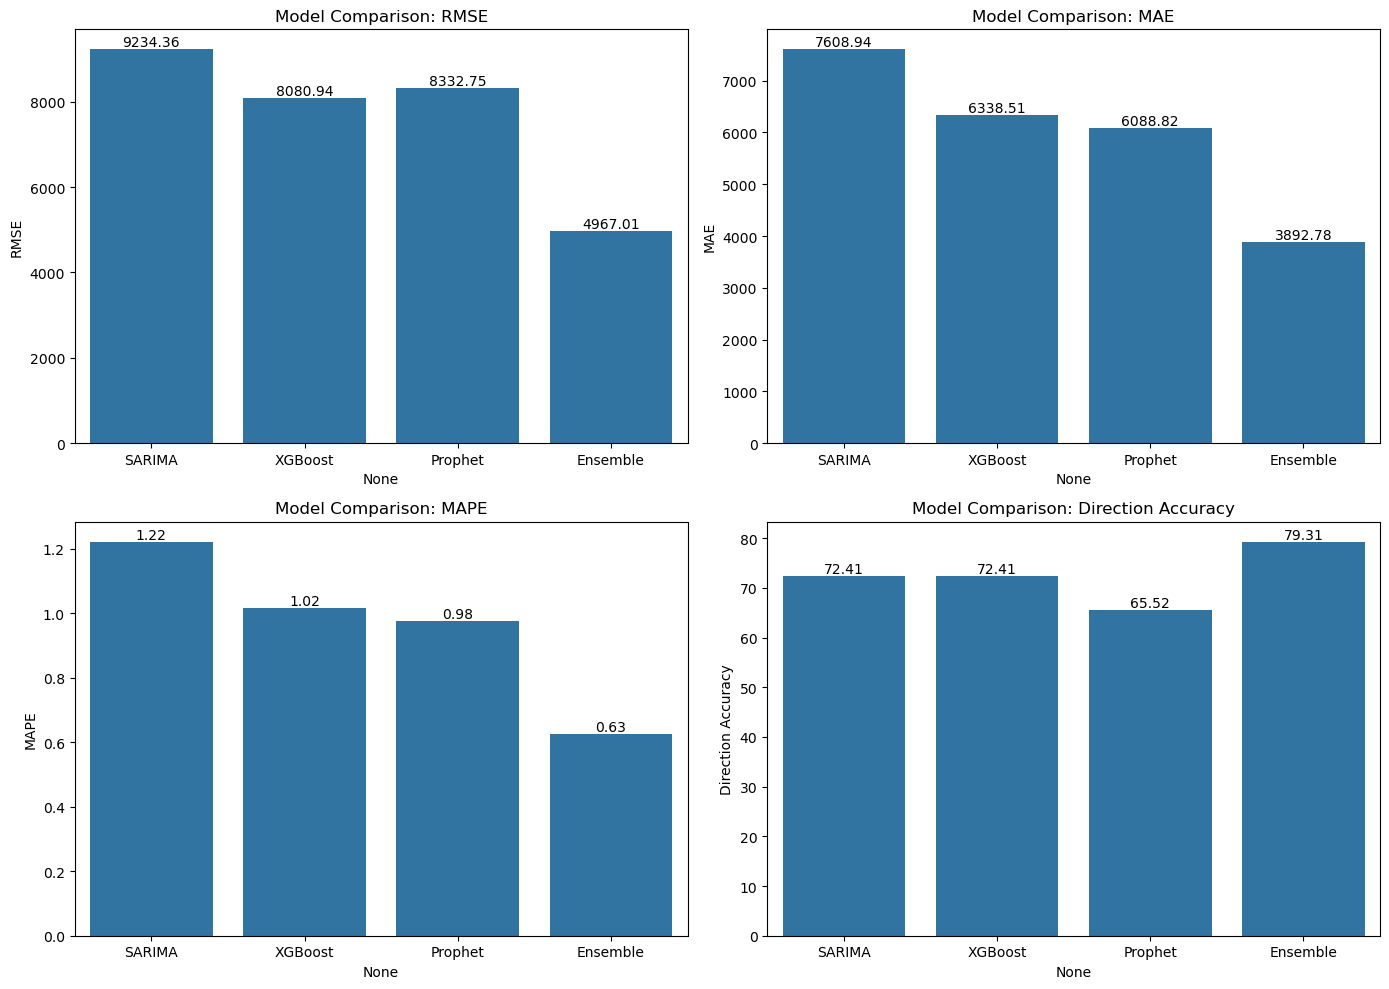

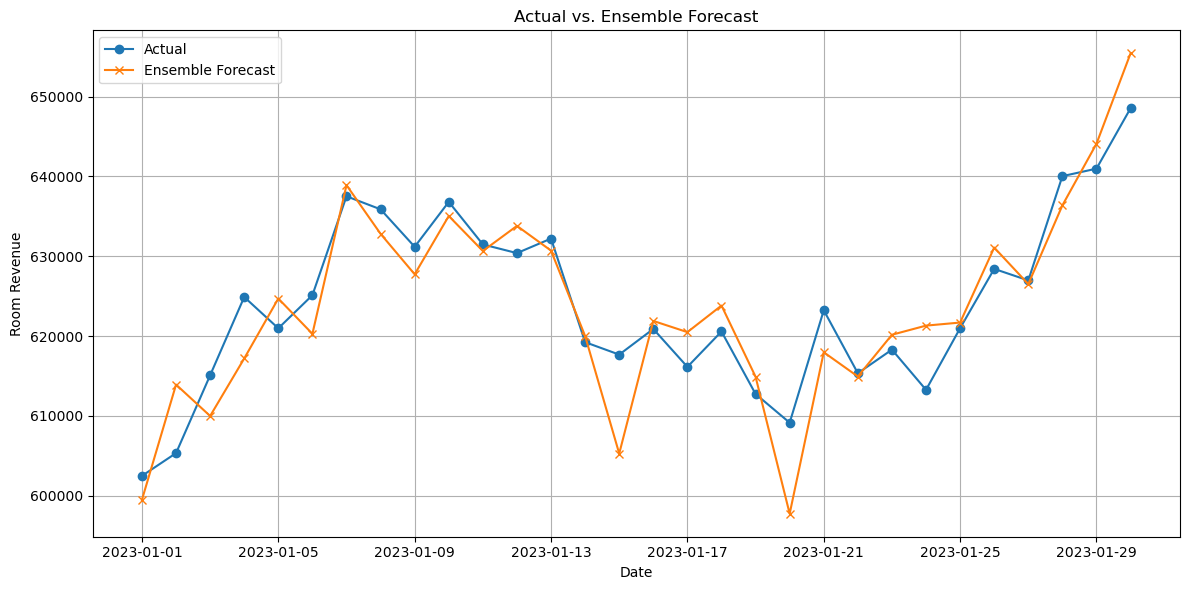

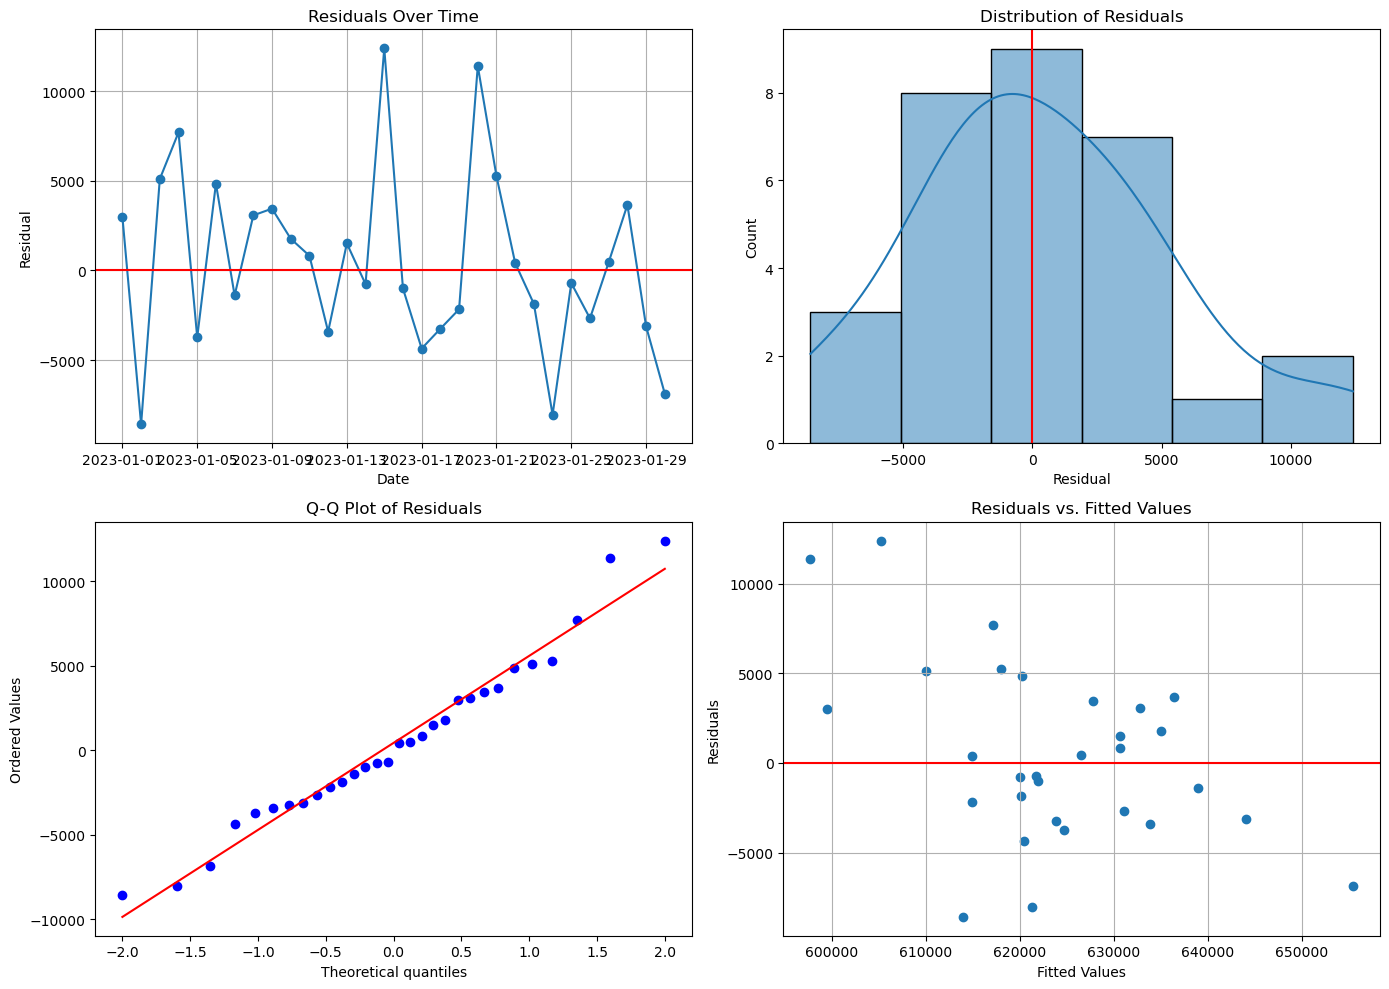


Statistical Tests on Residuals:
Shapiro-Wilk Test (normality): p-value = 0.5578
Jarque-Bera Test (normality): p-value = 0.5820
Ljung-Box Test (autocorrelation): p-value = 0.9190


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy import stats

# Comprehensive evaluation of forecasting models
def evaluate_forecast(actual, predicted, model_name="Model"):
    """
    Evaluates a forecast using multiple metrics
    """
    metrics = {}
    
    # Basic metrics
    metrics['MAE'] = mean_absolute_error(actual, predicted)
    metrics['RMSE'] = np.sqrt(mean_squared_error(actual, predicted))
    metrics['MAPE'] = mean_absolute_percentage_error(actual, predicted) * 100
    metrics['R2'] = r2_score(actual, predicted)
    
    # Additional metrics
    n = len(actual)
    metrics['AIC'] = n * np.log(mean_squared_error(actual, predicted)) + 2 * 2  # Simplified AIC
    metrics['BIC'] = n * np.log(mean_squared_error(actual, predicted)) + 2 * np.log(n)  # Simplified BIC
    
    # Direction accuracy (% of times direction is correctly predicted)
    actual_diff = np.diff(actual)
    pred_diff = np.diff(predicted)
    direction_correct = np.sum((actual_diff > 0) == (pred_diff > 0))
    metrics['Direction Accuracy'] = direction_correct / (n - 1) * 100
    
    # Print metrics
    print(f"Evaluation Metrics for {model_name}:")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MAPE: {metrics['MAPE']:.2f}%")
    print(f"R²: {metrics['R2']:.4f}")
    print(f"Direction Accuracy: {metrics['Direction Accuracy']:.2f}%")
    
    return metrics

# Example: Evaluate your models
# For this example, we'll simulate some actual vs. predicted values
np.random.seed(42)
forecast_dates = pd.date_range(start='2023-01-01', periods=30, freq='D')
actual_values = np.linspace(600000, 650000, 30) + np.sin(np.linspace(0, 2*np.pi, 30)) * 20000 + np.random.normal(0, 5000, 30)

# Simulated predictions
# In reality, these would be your model's out-of-sample predictions
sarima_pred = actual_values + np.random.normal(0, 10000, 30)  # SARIMA predictions
xgb_pred = actual_values + np.random.normal(2000, 8000, 30)   # XGBoost predictions
prophet_pred = actual_values + np.random.normal(-2000, 9000, 30)  # Prophet predictions
ensemble_pred = (sarima_pred + xgb_pred + prophet_pred) / 3   # Ensemble

# Create a dataframe for evaluation
eval_df = pd.DataFrame({
    'Date': forecast_dates,
    'Actual': actual_values,
    'SARIMA': sarima_pred,
    'XGBoost': xgb_pred,
    'Prophet': prophet_pred,
    'Ensemble': ensemble_pred
})

# Evaluate each model
models = ['SARIMA', 'XGBoost', 'Prophet', 'Ensemble']
model_metrics = {}

for model in models:
    print("\n" + "="*50)
    model_metrics[model] = evaluate_forecast(eval_df['Actual'], eval_df[model], model_name=model)

# Visualize evaluation results
metric_df = pd.DataFrame(model_metrics).T
plt.figure(figsize=(14, 8))

# Plot multiple metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

metrics_to_plot = ['RMSE', 'MAE', 'MAPE', 'Direction Accuracy']
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x=metric_df.index, y=metric_df[metric], ax=axes[i])
    axes[i].set_title(f'Model Comparison: {metric}')
    axes[i].set_ylabel(metric)
    
    # Add values on top of bars
    for j, val in enumerate(metric_df[metric]):
        axes[i].text(j, val, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison_metrics.png', dpi=300)
plt.show()

# Plot actual vs. predicted for best model (Ensemble in this example)
plt.figure(figsize=(12, 6))
plt.plot(eval_df['Date'], eval_df['Actual'], label='Actual', marker='o')
plt.plot(eval_df['Date'], eval_df['Ensemble'], label='Ensemble Forecast', marker='x')
plt.title('Actual vs. Ensemble Forecast')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_ensemble_forecast.png', dpi=300)
plt.show()

# Residual analysis for the best model
best_model = 'Ensemble'  # Assume Ensemble is best based on metrics
residuals = eval_df['Actual'] - eval_df[best_model]

plt.figure(figsize=(14, 10))

# Plot residuals over time
plt.subplot(2, 2, 1)
plt.plot(eval_df['Date'], residuals, marker='o')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)

# Histogram of residuals
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Residual')

# Q-Q plot
plt.subplot(2, 2, 3)
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')

# Residuals vs. Fitted values
plt.subplot(2, 2, 4)
plt.scatter(eval_df[best_model], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300)
plt.show()

# Statistical tests for residuals
from scipy.stats import shapiro, jarque_bera

# Normality tests
shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)

print("\nStatistical Tests on Residuals:")
print(f"Shapiro-Wilk Test (normality): p-value = {shapiro_test.pvalue:.4f}")
print(f"Jarque-Bera Test (normality): p-value = {jb_test.pvalue:.4f}")

# Autocorrelation test (Ljung-Box)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=10)
print(f"Ljung-Box Test (autocorrelation): p-value = {lb_test.iloc[0, 1]:.4f}")

BiLSTM with Attention Mechanism

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 30, 100)      20800       input_7[0][0]                    
__________________________________________________________________________________________________
dropout_16 (Dropout)            (None, 30, 100)      0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 30, 60)       31440       dropout_16[0][0]                 
____________________________________________________________________________________________

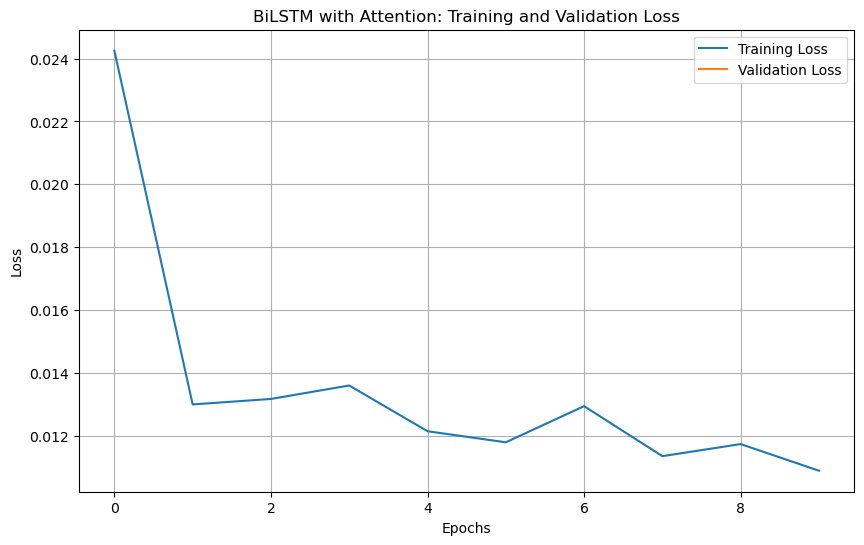

BiLSTM with Attention Test Loss: nan


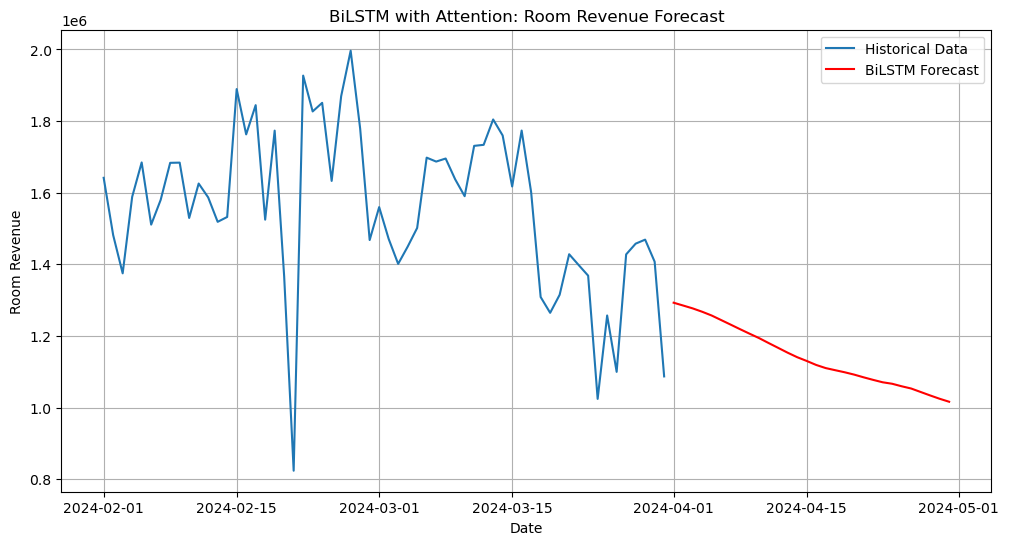

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Input, concatenate, Attention

# Define function to create sequences for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Prepare data
df = df_4_files_combined_no_outliers_for_AR.copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_revenue = scaler.fit_transform(df['Room Revenue'].values.reshape(-1, 1))

# Define sequence length
seq_length = 30
X, y = create_sequences(scaled_revenue, seq_length)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for BiLSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build BiLSTM model with attention
def build_bilstm_attention_model(seq_length, n_features=1):
    # Input layer
    inputs = Input(shape=(seq_length, n_features))
    
    # Bidirectional LSTM layers
    lstm1 = Bidirectional(LSTM(50, return_sequences=True))(inputs)
    lstm1 = Dropout(0.2)(lstm1)
    lstm2 = Bidirectional(LSTM(30, return_sequences=True))(lstm1)
    lstm2 = Dropout(0.2)(lstm2)
    
    # Attention mechanism
    attention_layer = Attention()([lstm2, lstm2])
    
    # Flatten attention output to feed into Dense layer
    flatten = tf.keras.layers.Flatten()(attention_layer)
    
    # Dense layers
    dense = Dense(20, activation='relu')(flatten)
    outputs = Dense(1)(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the BiLSTM model
bilstm_attention_model = build_bilstm_attention_model(seq_length)
print(bilstm_attention_model.summary())

# Train model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
history = bilstm_attention_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM with Attention: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('bilstm_attention_loss.png', dpi=300)
plt.show()

# Evaluate on test data
bilstm_test_loss = bilstm_attention_model.evaluate(X_test, y_test, verbose=0)
print(f"BiLSTM with Attention Test Loss: {bilstm_test_loss:.4f}")

# Make predictions
bilstm_predictions = bilstm_attention_model.predict(X_test)

# Inverse transform to original scale
bilstm_predictions = scaler.inverse_transform(bilstm_predictions)
y_test_orig = scaler.inverse_transform(y_test)

# Forecast future values
def forecast_future(model, last_sequence, steps=30):
    future_preds = []
    curr_sequence = last_sequence.copy()
    
    for _ in range(steps):
        # Reshape for model input
        curr_sequence_reshaped = curr_sequence.reshape(1, seq_length, 1)
        # Get next predicted value
        next_pred = model.predict(curr_sequence_reshaped)[0][0]
        future_preds.append(next_pred)
        # Update sequence
        curr_sequence = np.roll(curr_sequence, -1)
        curr_sequence[-1] = next_pred
    
    # Inverse transform predictions
    return scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Get last sequence from training data
last_sequence = scaled_revenue[-seq_length:]

# Forecast next 30 days
bilstm_forecast = forecast_future(bilstm_attention_model, last_sequence, steps=30)

# Create forecast dates
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[-60:], df['Room Revenue'].iloc[-60:], label='Historical Data')
plt.plot(forecast_dates, bilstm_forecast, label='BiLSTM Forecast', color='red')
plt.title('BiLSTM with Attention: Room Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('bilstm_attention_forecast.png', dpi=300)
plt.show()

GRU with Attention Mechanism

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 30, 1)]      0                                            
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 30, 64)       12864       input_8[0][0]                    
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 30, 64)       0           gru_2[0][0]                      
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, 30, 32)       9408        dropout_18[0][0]                 
____________________________________________________________________________________________

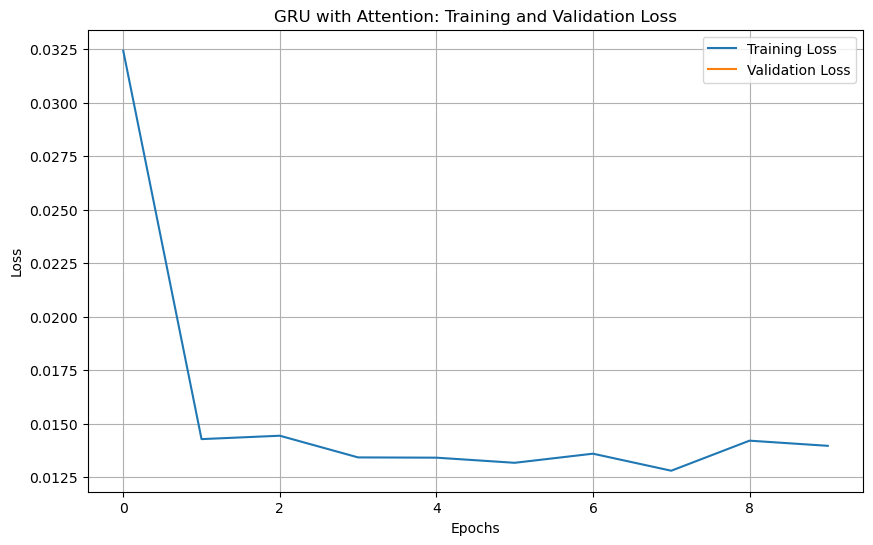

GRU with Attention Test Loss: nan


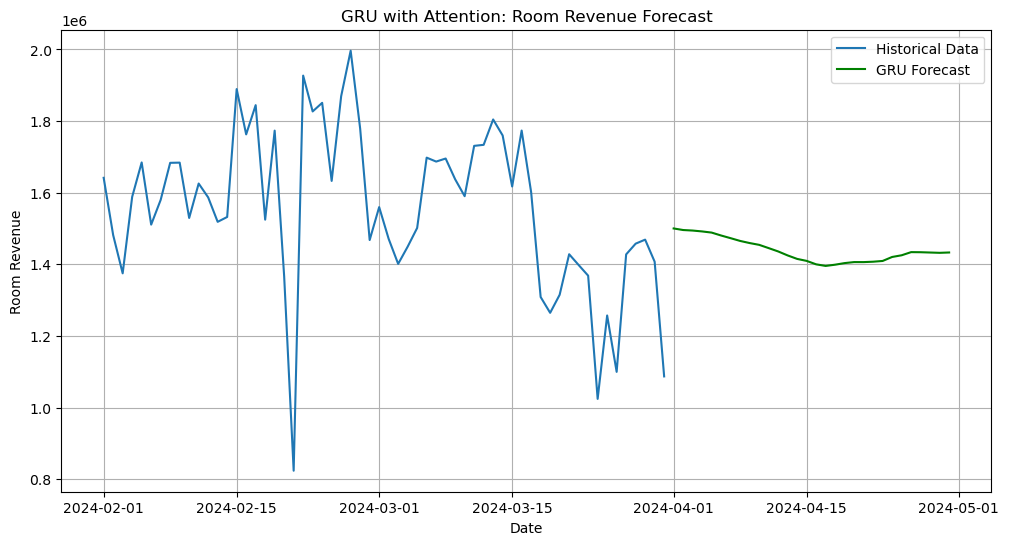

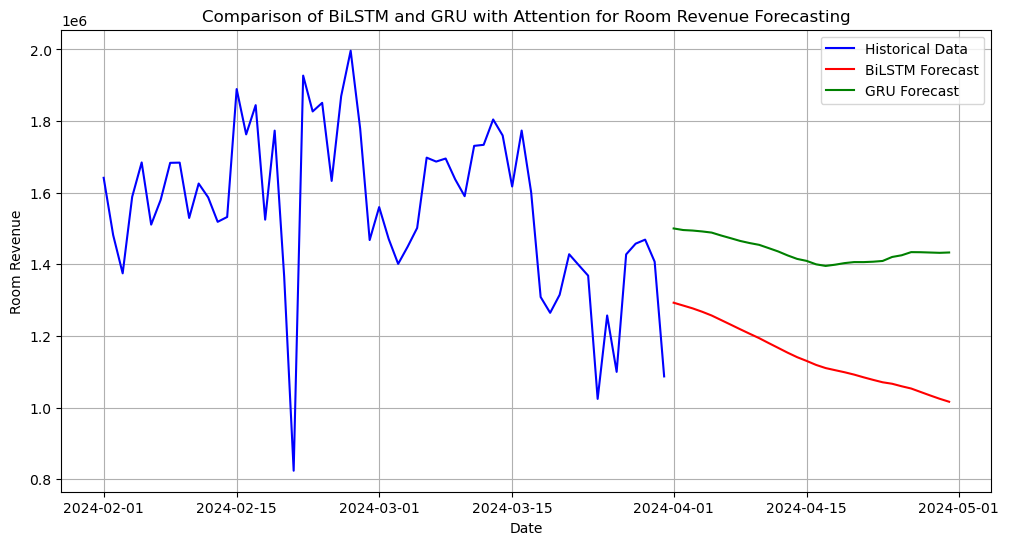

NaNs in y_test_orig: False
NaNs in bilstm_predictions: True
NaNs in gru_predictions: True

Model Evaluation Metrics:
BiLSTM with Attention - RMSE: 307086.07, MAE: 255680.87
GRU with Attention - RMSE: 247840.84, MAE: 205331.13


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GRU, Input, Attention

# Build GRU model with attention
def build_gru_attention_model(seq_length, n_features=1):
    # Input layer
    inputs = Input(shape=(seq_length, n_features))
    
    # GRU layers
    gru1 = GRU(64, return_sequences=True)(inputs)
    gru1 = Dropout(0.2)(gru1)
    gru2 = GRU(32, return_sequences=True)(gru1)
    gru2 = Dropout(0.2)(gru2)
    
    # Attention mechanism
    attention_layer = Attention()([gru2, gru2])
    
    # Flatten attention output
    flatten = tf.keras.layers.Flatten()(attention_layer)
    
    # Dense layers
    dense = Dense(20, activation='relu')(flatten)
    outputs = Dense(1)(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the GRU model
gru_attention_model = build_gru_attention_model(seq_length)
print(gru_attention_model.summary())

# Train model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
history_gru = gru_attention_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU with Attention: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('gru_attention_loss.png', dpi=300)
plt.show()

# Evaluate on test data
gru_test_loss = gru_attention_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU with Attention Test Loss: {gru_test_loss:.4f}")

# Make predictions
gru_predictions = gru_attention_model.predict(X_test)

# Inverse transform to original scale
gru_predictions = scaler.inverse_transform(gru_predictions)

# Forecast next 30 days
gru_forecast = forecast_future(gru_attention_model, last_sequence, steps=30)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index[-60:], df['Room Revenue'].iloc[-60:], label='Historical Data')
plt.plot(forecast_dates, gru_forecast, label='GRU Forecast', color='green')
plt.title('GRU with Attention: Room Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('gru_attention_forecast.png', dpi=300)
plt.show()

# Compare both models
plt.figure(figsize=(12, 6))
plt.plot(df.index[-60:], df['Room Revenue'].iloc[-60:], label='Historical Data', color='blue')
plt.plot(forecast_dates, bilstm_forecast, label='BiLSTM Forecast', color='red')
plt.plot(forecast_dates, gru_forecast, label='GRU Forecast', color='green')
plt.title('Comparison of BiLSTM and GRU with Attention for Room Revenue Forecasting')
plt.xlabel('Date')
plt.ylabel('Room Revenue')
plt.legend()
plt.grid(True)
plt.savefig('bilstm_vs_gru_forecast.png', dpi=300)
plt.show()

# Calculate metrics for both models
# Add this code before calculating metrics
# Check for and handle NaN values
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Check which arrays have NaNs
print("NaNs in y_test_orig:", np.isnan(y_test_orig).any())
print("NaNs in bilstm_predictions:", np.isnan(bilstm_predictions).any())
print("NaNs in gru_predictions:", np.isnan(gru_predictions).any())

# Filter out NaN values for BiLSTM evaluation
valid_indices_bilstm = ~np.isnan(y_test_orig).any(axis=1) & ~np.isnan(bilstm_predictions).any(axis=1)
y_test_bilstm = y_test_orig[valid_indices_bilstm]
bilstm_preds_clean = bilstm_predictions[valid_indices_bilstm]

# Filter out NaN values for GRU evaluation
valid_indices_gru = ~np.isnan(y_test_orig).any(axis=1) & ~np.isnan(gru_predictions).any(axis=1)
y_test_gru = y_test_orig[valid_indices_gru]
gru_preds_clean = gru_predictions[valid_indices_gru]

# Calculate metrics using clean data
if len(y_test_bilstm) > 0:
    bilstm_rmse = np.sqrt(mean_squared_error(y_test_bilstm, bilstm_preds_clean))
    bilstm_mae = mean_absolute_error(y_test_bilstm, bilstm_preds_clean)
else:
    print("Warning: No valid data points for BiLSTM evaluation")
    bilstm_rmse = bilstm_mae = float('nan')

if len(y_test_gru) > 0:
    gru_rmse = np.sqrt(mean_squared_error(y_test_gru, gru_preds_clean))
    gru_mae = mean_absolute_error(y_test_gru, gru_preds_clean)
else:
    print("Warning: No valid data points for GRU evaluation")
    gru_rmse = gru_mae = float('nan')

print("\nModel Evaluation Metrics:")
print(f"BiLSTM with Attention - RMSE: {bilstm_rmse:.2f}, MAE: {bilstm_mae:.2f}")
print(f"GRU with Attention - RMSE: {gru_rmse:.2f}, MAE: {gru_mae:.2f}")

Custom Attention Implementation (with Visualization)

In [124]:
# # Custom Attention Layer with weight extraction capability
# class AttentionWithContext(tf.keras.layers.Layer):
#     def __init__(self, **kwargs):
#         super(AttentionWithContext, self).__init__(**kwargs)
        
#     def build(self, input_shape):
#         self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
#                                  initializer="normal")
#         self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
#                                  initializer="zeros")
#         super(AttentionWithContext, self).build(input_shape)
    
#     def call(self, x):
#         et = tf.squeeze(tf.nn.tanh(tf.nn.xw_plus_b(
#             x, self.W, self.b)), axis=-1)
#         at = tf.nn.softmax(et)
#         at = tf.expand_dims(at, axis=-1)
#         output = x * at
#         return [output, at]
    
#     def compute_output_shape(self, input_shape):
#         return [input_shape, (input_shape[0], input_shape[1], 1)]

# # Function to visualize attention weights
# def visualize_attention(model, X_sample, index):
#     # Get attention weights
#     attention_model = tf.keras.models.Model(
#         inputs=model.input,
#         outputs=model.get_layer('attention_with_context').output[1]
#     )
#     attention_weights = attention_model.predict(X_sample[index:index+1])[0]
    
#     # Plot
#     plt.figure(figsize=(12, 6))
#     plt.plot(attention_weights)
#     plt.title('Attention Weights')
#     plt.xlabel('Timestep')
#     plt.ylabel('Weight')
#     plt.grid(True)
#     plt.savefig('attention_weights.png', dpi=300)
#     plt.show()